# Disseration : study 
## Author : Helena Gibson
## Student Num : L00045194
## Date : Oct 2021



# Set up

## Loading libraries and files

In [ ]:
# install libraries

# !pip install googledrivedownloader
# from google_drive_downloader import GoogleDriveDownloader as gd

from google.colab import drive
from google.colab import files
# Import Pandas
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import numpy as np
import seaborn as sns
!pip install heatmapz
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
# Use Pearson from Scipy
from scipy.stats import pearsonr
# Convert categorical features to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Import train_test_split function
from sklearn.model_selection import train_test_split, cross_val_score
import math

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import csv
import pylab as pl

# pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
# Function to display the Confusion matrix for a ML model
def showCofusionMatrix(theMatrix, model):
    # The confusion matrix results can also be shown on a colour bar
    pl.matshow(theMatrix)
    pl.title('Confusion matrix using '+model+'')
    pl.colorbar()
    pl.show()

Load Clinicopathological data

In [ ]:
drive.mount('/content/gdrive')

# Load the brca csv
uploaded = files.upload()
filename2 = 'brca_metabric_clinical_data.csv'
# filename2 = 'brca_metabric_clinical_data.tsv'

cpData = pd.read_csv(filename2, header=0)
cpData.head(2)
cpData.tail(2)

Mounted at /content/gdrive


Saving brca_metabric_clinical_data.csv to brca_metabric_clinical_data.csv


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
2507,brca_metabric,MTS-T2431,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,1,Primary,Female,NaN,NaN,0.0,NaN
2508,brca_metabric,MTS-T2432,MTS-T2432,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,1,Primary,Female,NaN,NaN,0.0,NaN


In [ ]:
cpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

# Clinic Data Pre-processing
Check for null/NaN values

In [ ]:
cpData.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2509.0,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244291,108.842487,1.0,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111789,76.519494,0.0,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.870000,40.560000,1.0,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,1.0,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,1.0,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,1.0,182.000000,4.000000


In [ ]:
# print("sum of nulls :\n", cpData.isnull().sum() )
print(f"sum of nulls : \t\t{cpData.isnull().sum().sum() }")
cpData.columns

sum of nulls : 		10929


Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [ ]:
cpData.head(2)
# cpData.tail(2)

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,0:LIVING,Negative,YES,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,0:LIVING,Positive,YES,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,10.0,1.0,Living


In [ ]:
# 'Inferred Menopausal State'
# 'Cellularity'
# 'Chemotherapy'
# 'HER2 Status'
# 'ER Status'
# 'Integrative Cluster'
# 'Pam50 + Claudin-low subtype'
# '3-Gene classifier subtype'
# 'Radio Therapy'
# 'Oncotree Code'
# 'PR Status'
# # Convert columns from float to int AND rename columns
# 'Age at Diagnosis'
# 'Neoplasm Histologic Grade'
# 'Lymph nodes examined positive'
# 'Mutation Count'
# 'Tumor Size'
# 'Tumor Stage'
# # Rename the features being used in the analysis
# 'Nottingham prognostic index'
#### Preditcors
# 'Overall Survival (Months)'
# 'Overall Survival Status'
# 'Patient\'s Vital Status'
# 'Relapse Free Status'
# 'Relapse Free Status (Months)'
## Not used
# 'Primary Tumor Laterality'


In [ ]:
allUsedColsList = [ 'Patient ID', 'Inferred Menopausal State', 'Cellularity', 'Chemotherapy', 'HER2 Status', 'ER Status', 'Integrative Cluster', 
                   'Overall Survival (Months)', 'Overall Survival Status', 'Pam50 + Claudin-low subtype', '3-Gene classifier subtype', 
                   'Patient\'s Vital Status', 'Radio Therapy', 'Relapse Free Status', 'Relapse Free Status (Months)', 'Oncotree Code', 
                   'PR Status', 'Age at Diagnosis', 'Neoplasm Histologic Grade', 'Lymph nodes examined positive', 'Mutation Count', 
                   'Tumor Size', 'Tumor Stage', 'Nottingham prognostic index'  ]

Re-run from here.. if checking code


In [ ]:
# BAck up cpData
allUsedCols = cpData[allUsedColsList].copy()

allUsedCols.shape


(2509, 24)

In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

sum of nulls: allUsedCols
 3-Gene classifier subtype        745
Tumor Stage                      721
Cellularity                      592
Patient's Vital Status           529
Pam50 + Claudin-low subtype      529
Inferred Menopausal State        529
Chemotherapy                     529
HER2 Status                      529
PR Status                        529
Integrative Cluster              529
Radio Therapy                    529
Overall Survival (Months)        528
Overall Survival Status          528
Lymph nodes examined positive    266
Nottingham prognostic index      222
Mutation Count                   152
Tumor Size                       149
Relapse Free Status (Months)     121
Neoplasm Histologic Grade        121
ER Status                         40
Relapse Free Status               21
Age at Diagnosis                  11
Oncotree Code                      0
Patient ID                         0
dtype: int64


In [ ]:
# isna : Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values
dfSurvivalMissing = allUsedCols[allUsedCols['Overall Survival (Months)'].isna()]
print("Count of miss?ing values in all columns based on \nthe predictors values missing:\n", dfSurvivalMissing.count().sort_values(ascending=False) )
# print("\n\nsum of nulls\n", allUsedCols.isnull().sum().sort_values(ascending=False) )


Count of miss?ing values in all columns based on 
the predictors values missing:
 Patient ID                       528
Oncotree Code                    528
Age at Diagnosis                 517
Relapse Free Status              508
Mutation Count                   497
Neoplasm Histologic Grade        495
ER Status                        488
Relapse Free Status (Months)     407
Tumor Size                       405
Lymph nodes examined positive    338
Tumor Stage                      322
Nottingham prognostic index      307
Radio Therapy                      0
3-Gene classifier subtype          0
Pam50 + Claudin-low subtype        0
Overall Survival Status            0
Overall Survival (Months)          0
Integrative Cluster                0
PR Status                          0
HER2 Status                        0
Chemotherapy                       0
Cellularity                        0
Inferred Menopausal State          0
Patient's Vital Status             0
dtype: int64


In [ ]:
dfSurvivalMissing.head(2)

,Patient ID,Inferred Menopausal State,Cellularity,Chemotherapy,HER2 Status,ER Status,Integrative Cluster,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Radio Therapy,Relapse Free Status,Relapse Free Status (Months),Oncotree Code,PR Status,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Tumor Size,Tumor Stage,Nottingham prognostic index
9,MB-0025,NaN,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:Recurred,126.32,IDC,NaN,76.24,3.0,11.0,5.0,34.0,2.0,6.68
223,MB-0326,NaN,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:Not Recurred,191.25,BRCA,NaN,51.45,2.0,1.0,9.0,12.0,2.0,4.24


In [ ]:
# Get list of columns where count of missing values > 0
test = dfSurvivalMissing.count().sort_values(ascending=False)
itemsToDrop = []
columnsToAnalyse = []
for index, value in test.items():
    # print(f"Index : {index}, Value : {value}")
    if value  == 0:   itemsToDrop.append(index)
    else:             columnsToAnalyse.append(index) 
test = test.drop(itemsToDrop)
# print(test)
print(len(columnsToAnalyse), columnsToAnalyse)

12 ['Patient ID', 'Oncotree Code', 'Age at Diagnosis', 'Relapse Free Status', 'Mutation Count', 'Neoplasm Histologic Grade', 'ER Status', 'Relapse Free Status (Months)', 'Tumor Size', 'Lymph nodes examined positive', 'Tumor Stage', 'Nottingham prognostic index']


In [ ]:
# Making a copy of the data for analysis
# Analysis of the data from the deleted 528 patients with no predictive values 
columnsToAnalyseDF = dfSurvivalMissing[columnsToAnalyse].copy()
columnsToAnalyseDF.head(2)
for i in range(1, len(columnsToAnalyse)+1):
    print(f"\nwhere threshold is: {i}, - min: {columnsToAnalyseDF.dropna(thresh=i).count().min()}, max: {columnsToAnalyseDF.dropna(thresh=i).count().max()} \
      The number of empty columns per feature were :\n{columnsToAnalyseDF.dropna(thresh=i).count()}")

# Cannot get data distribution on columns that are not converted to numerical values yet
# print("columnsToAnalyseDF shape ", columnsToAnalyseDF.shape)
# columnsToAnalyseDF.describe()


where threshold is: 1, - min: 307, max: 528       The number of empty columns per feature were :
Patient ID                       528
Oncotree Code                    528
Age at Diagnosis                 517
Relapse Free Status              508
Mutation Count                   497
Neoplasm Histologic Grade        495
ER Status                        488
Relapse Free Status (Months)     407
Tumor Size                       405
Lymph nodes examined positive    338
Tumor Stage                      322
Nottingham prognostic index      307
dtype: int64

where threshold is: 2, - min: 307, max: 528       The number of empty columns per feature were :
Patient ID                       528
Oncotree Code                    528
Age at Diagnosis                 517
Relapse Free Status              508
Mutation Count                   497
Neoplasm Histologic Grade        495
ER Status                        488
Relapse Free Status (Months)     407
Tumor Size                       405
Lymph nodes ex

In [ ]:
print("number of patients with missing Overall Survival (Months)", len(dfSurvivalMissing))
# print(dfSurvivalMissing.info())
# Number of rows with 10 missibg values
print(dfSurvivalMissing.dropna(thresh=10).count())
print("\n", dfSurvivalMissing.dropna(thresh=1).count())


number of patients with missing Overall Survival (Months) 528
Patient ID                       398
Inferred Menopausal State          0
Cellularity                        0
Chemotherapy                       0
HER2 Status                        0
ER Status                        373
Integrative Cluster                0
Overall Survival (Months)          0
Overall Survival Status            0
Pam50 + Claudin-low subtype        0
3-Gene classifier subtype          0
Patient's Vital Status             0
Radio Therapy                      0
Relapse Free Status              390
Relapse Free Status (Months)     394
Oncotree Code                    398
PR Status                          0
Age at Diagnosis                 398
Neoplasm Histologic Grade        391
Lymph nodes examined positive    316
Mutation Count                   380
Tumor Size                       397
Tumor Stage                      307
Nottingham prognostic index      307
dtype: int64

 Patient ID                       52

In [ ]:
#  Dropping the rows in allUsedCols df with no vlaues in Overall Survival (Months)
print("shape", allUsedCols.shape)
print("sum of Overall Survival (Months)", allUsedCols['Overall Survival (Months)'].isna().sum() )
print("sum of Tumour Stage", allUsedCols['Tumor Stage'].isna().sum() )
print("sum of Patient's Vital Status", allUsedCols['Patient\'s Vital Status'].isna().sum() )
print("sum of Age at Diagnosis", allUsedCols['Age at Diagnosis'].isna().sum() )

shape (2509, 24)
sum of Overall Survival (Months) 528
sum of Tumour Stage 721
sum of Patient's Vital Status 529
sum of Age at Diagnosis 11


In [ ]:
# # using dropna() function to drop all rows with missing values in 'Overall Survival (Months)' feature
# cpData = cpData.dropna()
# allUsedCols.head(20)

Deleting rows with no predictive values

In [ ]:
# Delete the rows with no Predictive value of 'Overall Survival (Months)'
print(allUsedCols.shape)
allUsedCols.dropna(axis=0, subset=['Overall Survival (Months)'], inplace=True)
print("2. shape", allUsedCols.shape)

# allUsedCols.head(20)

(2509, 24)
2. shape (1981, 24)


In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

print("sum of Overall Survival (Months)", allUsedCols['Overall Survival (Months)'].isna().sum() )

sum of nulls: allUsedCols
 Tumor Stage                      515
3-Gene classifier subtype        217
Mutation Count                   121
Neoplasm Histologic Grade         88
Lymph nodes examined positive     76
Cellularity                       64
Tumor Size                        26
Nottingham prognostic index        1
Inferred Menopausal State          1
Chemotherapy                       1
HER2 Status                        1
Integrative Cluster                1
Pam50 + Claudin-low subtype        1
Patient's Vital Status             1
Radio Therapy                      1
Relapse Free Status                1
PR Status                          1
Overall Survival Status            0
Overall Survival (Months)          0
ER Status                          0
Relapse Free Status (Months)       0
Oncotree Code                      0
Age at Diagnosis                   0
Patient ID                         0
dtype: int64
sum of Overall Survival (Months) 0


Tumor Staging
**Solution 1**: for missing values is Arbitrary Value Imputation, by replacing the missing Tumour Stage values with a -1
The justification of this is the varying values counts of the other completed patient details and the correlation between Tumor Staging and NPI, Tumor Size.
Outcome of Solution: Arbitrary Value Imputation with the value -1 significantly changed the correlation coefficient <br>
**Solution 2**: INterpolate with pad(limit 2), backfill, then another pad, then interpolate..
Outcome of Solution 2: Not great, but better than first solution.


Use Stratified Imputation for Tumour Staging
If NPI and Tumour Size of another is the same as NPI and Tumour Size of a missing patient, then use that value.


Solution 1: Arbitrary Value Imputation
allUsedCols['Tumor Stage'].fillna( -1, inplace=True)

In [ ]:
# Do some check on the data with missing 'Tumour stage' data
dfTumourStageMissing = allUsedCols[allUsedCols['Tumor Stage'].isna()]
print(dfTumourStageMissing.shape)
# # Shows the other columns that are null for a patient when 'Tumor Stage' is null
# # print("sum of nulls : dfTumourStageMissing\n", dfTumourStageMissing.isna().sum().sort_values(ascending=False) )
# # Comparing that in the over all dataset of null values, not necessarily linked to 'Tumor Stage'
# # print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

(515, 24)


In [ ]:
# print("sum of Tumour Stage", dfTumourStageMissing['Tumor Stage'].isna().sum() )
# print("sum of Tumour Stage", allUsedCols['Tumor Stage'].isna().sum() )
# #dfTumourStageMissing.head(20)

# # What correlation does tumour stage have with other values i.e. 'tumor size'
# # Lets check the full df as 'Tumour Staging' missing in dfTumourStageMissing
# print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
# print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
# print(f"Tumor Stage-Tumor Size Corr: \t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
# print(f"Tumor Stage-Age at Diagnosis Corr: \t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
# print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
# print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

# # cannot calculate the p-value of correlation coefficient because it contains NaNs
# # pearsonr(allUsedCols['Tumor Size'], allUsedCols['Tumor Stage'])

In [ ]:
# allUsedCols['Tumor Stage'].fillna( -1, inplace=True)

In [ ]:
# print("sum of Tumour Stage", allUsedCols['Tumor Stage'].isna().sum() )

# print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
# print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
# print(f"Tumor Stage-Tumor Size Corr:\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
# print(f"Tumor Stage-Age at Diagnosis Corr: \t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
# print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
# print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

In [ ]:
# allUsedCols[allUsedCols['3-Gene classifier subtype'] == 'ER+/HER2- High Prolif'][['Tumor Stage', '3-Gene classifier subtype', 'Neoplasm Histologic Grade', 'Nottingham prognostic index']]

Solution 2: Interpolation
allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True) <br>
allUsedCols['Tumor Stage'].interpolate(method='backfill', limit=2, inplace=True) <br>
allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True) <br>
allUsedCols['Tumor Stage'].interpolate(inplace=True) <br>


In [ ]:
# print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
# print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
# print(f"Tumor Stage-Tumor Size Corr: \t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
# print(f"Tumor Stage-Age at Diagnosis Corr: \t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
# print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
# print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

In [ ]:
# # What values do the non-null 'Tumour Stage' column values have?
# print("Tumor Stage value counts:\n",allUsedCols['Tumor Stage'].value_counts().sort_index() )
# print("Value counts sum :", allUsedCols['Tumor Stage'].value_counts().sum() )
# print("Tumor Stage Unique values ", allUsedCols['Tumor Stage'].unique())
# print("sum of missing Tumour Stage", allUsedCols['Tumor Stage'].isna().sum() )

# # Apply Interpolation imputation method
# allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(method='backfill', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(inplace=True)


In [ ]:
# print("\nAFTER")
# print("sum of missing Tumour Stage", allUsedCols['Tumor Stage'].isna().sum() )
# print("Tumor Stage Unique values ", allUsedCols['Tumor Stage'].unique())
# # # What values do the non-null 'Tumour Stage' column values have now?
# # print("Tumor Stage value counts:\n",allUsedCols['Tumor Stage'].value_counts().sort_index() )
# # print("Value counts sum :", allUsedCols['Tumor Stage'].value_counts().sum() )



In [ ]:
# print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
# print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
# print(f"Tumor Stage-Tumor Size Corr: \t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
# print(f"Tumor Stage-Age at Diagnosis Corr: \t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
# print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
# print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

Solution 3: Customised Imputation with Interpolation     <br>


In [ ]:
print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
print(f"Tumor Stage-Tumor Size Corr: \t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
print(f"Tumor Stage-Age at Diagnosis Corr: \t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

Tumor Stage- Survival Corr:			-0.26656743103131436
Tumor Stage-NPI Corr:				 0.564357661216147
Tumor Stage-Tumor Size Corr: 			 0.48966316730296977
Tumor Stage-Age at Diagnosis Corr: 		 0.08176922229604514
Tumor Stage-Grade Corr:				 0.18052325063865182
Tumor Stage-Mutation Count Corr:		-0.024029805319656622


In [ ]:
print(dfTumourStageMissing.columns)

Index(['Patient ID', 'Inferred Menopausal State', 'Cellularity',
       'Chemotherapy', 'HER2 Status', 'ER Status', 'Integrative Cluster',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Pam50 + Claudin-low subtype', '3-Gene classifier subtype',
       'Patient's Vital Status', 'Radio Therapy', 'Relapse Free Status',
       'Relapse Free Status (Months)', 'Oncotree Code', 'PR Status',
       'Age at Diagnosis', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count', 'Tumor Size',
       'Tumor Stage', 'Nottingham prognostic index'],
      dtype='object')


In [ ]:
allUsedCols['Tumor Size'].unique()

array([ 22.  ,  10.  ,  15.  ,  25.  ,  40.  ,  31.  ,  65.  ,  29.  ,
        16.  ,  28.  ,  21.  ,  19.  ,  36.  ,  33.  ,  23.  ,  17.  ,
        18.  ,  12.  ,  50.  ,  24.  ,  13.  ,  14.  ,  55.  ,  30.  ,
        39.  ,  34.  ,  70.  ,  45.  ,  27.  , 150.  ,  60.  ,  26.  ,
        20.  ,   9.  ,  35.  ,  80.  ,  38.  ,   2.  ,  52.  ,  44.  ,
        48.  ,   3.  ,   5.  ,  46.  ,  11.  ,    nan,  53.  ,  47.  ,
        32.  ,  67.  ,  43.  ,  42.  , 180.  ,  57.  ,   4.  , 100.  ,
        37.  ,  90.  ,   8.  , 160.  ,  84.  , 130.  ,   5.5 ,  62.  ,
         1.  ,  49.  ,  99.  ,  68.  ,   7.  ,  41.  ,   6.  ,  75.  ,
        51.  , 120.  ,  61.  ,  79.  ,  71.  ,  22.5 ,  17.9 ,  14.5 ,
        12.8 ,  18.5 ,  15.5 ,  21.5 ,  16.9 ,  24.4 ,  12.5 ,  40.3 ,
        11.8 ,  32.6 ,  17.2 ,  13.8 ,  15.7 , 182.  ,  85.  ,  18.3 ,
        21.6 ,  28.5 ,  16.2 ,   2.3 ,  15.2 ,  31.1 ,  14.3 ,  12.6 ,
        25.1 ,  17.6 ,   2.12,  21.3 ,  22.32,  17.7 ,  15.47,  24.15,
      

In [ ]:
allUsedCols['Lymph nodes examined positive'].unique()

array([10.,  0.,  1.,  3.,  8., nan, 24.,  4., 16.,  5., 14.,  6.,  2.,
        9., 22.,  7., 21., 13., 12., 25., 41., 15., 11., 19., 17., 18.,
       23., 26., 20., 31., 33., 45.])

In [ ]:
# # Function with an arguement containing the row with missing values, returns the Median of similar Tumor Stage values
# Searches the dataset with similar TSize & Lymph values, then saves the TStage 
# Deletes any rows with empty TStage values, returns the median of TStage values
def getMedian(missingValueRow):
        similarRowValue = allUsedCols.loc[( np.isclose(allUsedCols['Tumor Size'], missingValueRow['Tumor Size'])) & (np.isclose(allUsedCols['Lymph nodes examined positive'], missingValueRow['Lymph nodes examined positive'])) ] [['Tumor Stage','Tumor Size', 'Lymph nodes examined positive']]
        # Some medians have nan values, so delete these before getting the median
        # print("similarRowValue.shape", similarRowValue.shape)
        similarRowValue.dropna(inplace=True)
        # print("After : similarRowValue.shape", similarRowValue.shape)
        # Get the mean of the TS col
        # print("similarRowValue", similarRowValue)
        theMedian = similarRowValue['Tumor Stage'].median()
        return theMedian


In [ ]:
print("1. Tumor Stage value counts:\n",allUsedCols['Tumor Stage'].value_counts().sort_index() )
print("sum of missing allUsedCols['Tumor Stage']", allUsedCols['Tumor Stage'].isna().sum() )

# Create an empty Dataframe with columns names
missingValueRow = pd.DataFrame(columns=['Tumor Stage', 'Tumor Size', 'Lymph nodes examined positive'])

for index, row in allUsedCols.iterrows():
    # print(pd.isna(row['Tumor Stage'] ) )
    if pd.isna(row['Tumor Stage']):
        missingValueRow = row[['Tumor Stage','Tumor Size', 'Lymph nodes examined positive']]
        # Check if the median is null and deal with it if it is.
        theMedian  = getMedian(missingValueRow)
        # Replace missing value with the median
        allUsedCols.loc[index, 'Tumor Stage'] = theMedian
        # print("After. allUsedCols.loc[index, 'Tumor Stage']", allUsedCols.loc[index, 'Tumor Stage'])
       
print("2. Tumor Stage value counts:\n",allUsedCols['Tumor Stage'].value_counts().sort_index() )
print("sum of missing allUsedCols['Tumor Stage']", allUsedCols['Tumor Stage'].isna().sum() )

# And if still some missing values(134) apply Interpolate
allUsedCols['Tumor Stage'].interpolate(inplace=True)

print("3. sum of missing allUsedCols['Tumor Stage']", allUsedCols['Tumor Stage'].isna().sum() )

1. Tumor Stage value counts:
 0.0     12
1.0    501
2.0    825
3.0    118
4.0     10
Name: Tumor Stage, dtype: int64
sum of missing allUsedCols['Tumor Stage'] 515
2. Tumor Stage value counts:
 0.0      12
1.0     590
1.5       2
2.0    1089
2.5       8
3.0     135
4.0      11
Name: Tumor Stage, dtype: int64
sum of missing allUsedCols['Tumor Stage'] 134
3. sum of missing allUsedCols['Tumor Stage'] 0


In [ ]:
print(f"Tumor Stage- Survival Corr:\t\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Overall Survival (Months)'])}")
print(f"Tumor Stage-NPI Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Nottingham prognostic index'])}")
print(f"Tumor Stage-Tumor Size Corr: \t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Tumor Size'])}")
print(f"Tumor Stage-Age at Diagnosis Corr: \t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Age at Diagnosis'])}")
print(f"Tumor Stage-Grade Corr:\t\t\t\t {allUsedCols['Tumor Stage'].corr(allUsedCols['Neoplasm Histologic Grade'])}")
print(f"Tumor Stage-Mutation Count Corr:\t\t{allUsedCols['Tumor Stage'].corr(allUsedCols['Mutation Count'])}")

Tumor Stage- Survival Corr:			-0.24337074176643064
Tumor Stage-NPI Corr:				 0.5081183522191035
Tumor Stage-Tumor Size Corr: 			 0.4519443035937458
Tumor Stage-Age at Diagnosis Corr: 		 0.06904400191318653
Tumor Stage-Grade Corr:				 0.1616264070488972
Tumor Stage-Mutation Count Corr:		-0.014216190254846448


3-Gene Classifier Subtype

In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

sum of nulls: allUsedCols
 3-Gene classifier subtype        217
Mutation Count                   121
Neoplasm Histologic Grade         88
Lymph nodes examined positive     76
Cellularity                       64
Tumor Size                        26
Nottingham prognostic index        1
Inferred Menopausal State          1
Chemotherapy                       1
HER2 Status                        1
Integrative Cluster                1
Pam50 + Claudin-low subtype        1
Patient's Vital Status             1
Radio Therapy                      1
Relapse Free Status                1
PR Status                          1
Tumor Stage                        0
Overall Survival Status            0
Overall Survival (Months)          0
ER Status                          0
Relapse Free Status (Months)       0
Oncotree Code                      0
Age at Diagnosis                   0
Patient ID                         0
dtype: int64


In [ ]:
# print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )
print(allUsedCols['3-Gene classifier subtype'].unique() )
print("3-Gene classifier value counts:\n",allUsedCols['3-Gene classifier subtype'].value_counts().sort_index() )
df3GeneMissing = allUsedCols[allUsedCols['3-Gene classifier subtype'].isna()]

['ER-/HER2-' 'ER+/HER2- High Prolif' nan 'ER+/HER2- Low Prolif' 'HER2+']
3-Gene classifier value counts:
 ER+/HER2- High Prolif    617
ER+/HER2- Low Prolif     640
ER-/HER2-                309
HER2+                    198
Name: 3-Gene classifier subtype, dtype: int64


In [ ]:
## finding the count of unique values in Gender
allUsedCols['3-Gene classifier subtype'].groupby(allUsedCols['3-Gene classifier subtype']).count()

3-Gene classifier subtype
ER+/HER2- High Prolif    617
ER+/HER2- Low Prolif     640
ER-/HER2-                309
HER2+                    198
Name: 3-Gene classifier subtype, dtype: int64

In [ ]:
# Replace '3-Gene classifier subtype feature with 'None'
# What values do the non-null '3-Gene classifier subtype' column values have?
print("3-Gene classifier subtype value counts:\n",allUsedCols['3-Gene classifier subtype'].value_counts().sort_index() )
print("Value counts sum :", allUsedCols['3-Gene classifier subtype'].value_counts().sum() )
print("3-Gene classifier subtype Unique values ", allUsedCols['3-Gene classifier subtype'].unique())
print("sum of nulls:", allUsedCols['3-Gene classifier subtype'].isna().sum() )

allUsedCols['3-Gene classifier subtype'].fillna( 'NoType', inplace=True)

print("\nAfter")
print("sum of nulls:", allUsedCols['3-Gene classifier subtype'].isna().sum() )
print("3-Gene classifier subtype value counts:\n",allUsedCols['3-Gene classifier subtype'].value_counts().sort_index() )
print("Value counts sum :", allUsedCols['3-Gene classifier subtype'].value_counts().sum() )
print("3-Gene classifier subtype Unique values ", allUsedCols['3-Gene classifier subtype'].unique())


3-Gene classifier subtype value counts:
 ER+/HER2- High Prolif    617
ER+/HER2- Low Prolif     640
ER-/HER2-                309
HER2+                    198
Name: 3-Gene classifier subtype, dtype: int64
Value counts sum : 1764
3-Gene classifier subtype Unique values  ['ER-/HER2-' 'ER+/HER2- High Prolif' nan 'ER+/HER2- Low Prolif' 'HER2+']
sum of nulls: 217

After
sum of nulls: 0
3-Gene classifier subtype value counts:
 ER+/HER2- High Prolif    617
ER+/HER2- Low Prolif     640
ER-/HER2-                309
HER2+                    198
NoType                   217
Name: 3-Gene classifier subtype, dtype: int64
Value counts sum : 1981
3-Gene classifier subtype Unique values  ['ER-/HER2-' 'ER+/HER2- High Prolif' 'NoType' 'ER+/HER2- Low Prolif'
 'HER2+']


Mutation Count



In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sum() )
# print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )
print(allUsedCols['Mutation Count'].unique() )
# print("Mutation Count value counts:\n",allUsedCols['Mutation Count'].value_counts().sort_values(ascending=False) )
# print("Mutation Count value counts:\n",allUsedCols['Mutation Count'].value_counts().sort_index() )

sum of nulls: allUsedCols
 385
[nan  2.  1.  4.  5.  3.  7.  8. 11. 14.  9.  6. 13. 21. 10. 22. 12. 28.
 16. 23. 18. 26. 20. 24. 17. 15. 40. 46. 30. 19. 80.]


In [ ]:
print(f"Mutation Count - Survival Corr:\t {allUsedCols['Mutation Count'].corr(allUsedCols['Overall Survival (Months)'])}")

Mutation Count - Survival Corr:	 0.04166531540344546


In [ ]:
# dfMutationMissing = allUsedCols[allUsedCols['Mutation Count'].isna()]
print(allUsedCols[allUsedCols['Mutation Count'].isna()].isna().sum().sort_values(ascending=False)   )
# print("sum of nulls: dfMutationMissing\n", dfMutationMissing.isna().sum().sort_values(ascending=False) )

# print("\n",allUsedCols[allUsedCols['Neoplasm Histologic Grade'].isna()].isna().sum().sort_values(ascending=False) )


Mutation Count                   121
Lymph nodes examined positive     76
Neoplasm Histologic Grade         16
Cellularity                       16
Tumor Size                         6
Nottingham prognostic index        0
Pam50 + Claudin-low subtype        0
Inferred Menopausal State          0
Chemotherapy                       0
HER2 Status                        0
ER Status                          0
Integrative Cluster                0
Overall Survival (Months)          0
Overall Survival Status            0
Patient's Vital Status             0
3-Gene classifier subtype          0
Tumor Stage                        0
Radio Therapy                      0
Relapse Free Status                0
Relapse Free Status (Months)       0
Oncotree Code                      0
PR Status                          0
Age at Diagnosis                   0
Patient ID                         0
dtype: int64


In [ ]:
print("Mutation Count Unique values ", allUsedCols['Mutation Count'].unique())
# allUsedCols['Mutation Count'] = allUsedCols['Mutation Count'].fillna(method='ffill', inplace=True)
allUsedCols['Mutation Count'].interpolate(inplace=True)
allUsedCols['Mutation Count'].interpolate(method='backfill', inplace=True)


Mutation Count Unique values  [nan  2.  1.  4.  5.  3.  7.  8. 11. 14.  9.  6. 13. 21. 10. 22. 12. 28.
 16. 23. 18. 26. 20. 24. 17. 15. 40. 46. 30. 19. 80.]


In [ ]:
print(allUsedCols['Mutation Count'].head(5))
print("Mutation Count Unique values ", allUsedCols['Mutation Count'].unique())
print("Mutation Count isna values ", allUsedCols['Mutation Count'].isna().sum().sum())

# print("Mutation Count value counts:\n",allUsedCols['Mutation Count'].value_counts().sort_values(ascending=False) )
# print("Mutation Count value counts:\n",allUsedCols['Mutation Count'].value_counts().sort_index() )


0    2.0
1    2.0
2    2.0
3    1.0
4    2.0
Name: Mutation Count, dtype: float64
Mutation Count Unique values  [ 2.          1.          4.          2.5         5.          3.
  2.25        2.75        4.5         1.5         7.          5.5
  8.          4.33333333  4.66666667 11.         14.          9.
  6.          3.33333333 13.          3.5        21.         11.5
 10.          9.5         6.5        22.          2.66666667  2.33333333
 12.          1.25        1.75       28.         16.         23.
 18.         26.         20.         24.         17.         15.
 40.         46.         30.         19.          6.33333333  5.66666667
 80.         14.5        10.5       ]
Mutation Count isna values  0


In [ ]:
print(f"Mutation Count - Survival Corr:\t {allUsedCols['Mutation Count'].corr(allUsedCols['Overall Survival (Months)'])}")


Mutation Count - Survival Corr:	 0.04885642595167171


Neoplasm Histological Grade

In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

sum of nulls: allUsedCols
 Neoplasm Histologic Grade        88
Lymph nodes examined positive    76
Cellularity                      64
Tumor Size                       26
Nottingham prognostic index       1
Radio Therapy                     1
Inferred Menopausal State         1
Chemotherapy                      1
HER2 Status                       1
Integrative Cluster               1
Pam50 + Claudin-low subtype       1
Patient's Vital Status            1
Relapse Free Status               1
PR Status                         1
Tumor Stage                       0
3-Gene classifier subtype         0
Overall Survival Status           0
Overall Survival (Months)         0
Relapse Free Status (Months)      0
ER Status                         0
Oncotree Code                     0
Age at Diagnosis                  0
Mutation Count                    0
Patient ID                        0
dtype: int64


In [ ]:
print("sum of nulls: allUsedCols ", allUsedCols.isna().sum().sum() )
print("sum of nulls: allUsedCols ", allUsedCols['Neoplasm Histologic Grade'].isna().sum() )
# print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )
print(allUsedCols['Neoplasm Histologic Grade'].unique() )

print("Neoplasm Histologic Grade value counts:\n",allUsedCols['Neoplasm Histologic Grade'].value_counts().sort_values(ascending=False) )
print(f"Neoplasm Histologic Grade - Survival Corr:\t {allUsedCols['Neoplasm Histologic Grade'].corr(allUsedCols['Overall Survival (Months)'])}")

print("\n",allUsedCols[allUsedCols['Neoplasm Histologic Grade'].isna()].isna().sum().sort_values(ascending=False) )


sum of nulls: allUsedCols  264
sum of nulls: allUsedCols  88
[ 3.  2.  1. nan]
Neoplasm Histologic Grade value counts:
 3.0    953
2.0    771
1.0    169
Name: Neoplasm Histologic Grade, dtype: int64
Neoplasm Histologic Grade - Survival Corr:	 -0.12646636840525793

 Neoplasm Histologic Grade        88
Lymph nodes examined positive    16
Tumor Size                        9
Cellularity                       5
Nottingham prognostic index       0
Pam50 + Claudin-low subtype       0
Inferred Menopausal State         0
Chemotherapy                      0
HER2 Status                       0
ER Status                         0
Integrative Cluster               0
Overall Survival (Months)         0
Overall Survival Status           0
Patient's Vital Status            0
3-Gene classifier subtype         0
Tumor Stage                       0
Radio Therapy                     0
Relapse Free Status               0
Relapse Free Status (Months)      0
Oncotree Code                     0
PR Status     

In [ ]:
# allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(method='backfill', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(method='pad', limit=2, inplace=True)
# allUsedCols['Tumor Stage'].interpolate(inplace=True)

In [ ]:
allUsedCols['Neoplasm Histologic Grade'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Neoplasm Histologic Grade'].interpolate(method='backfill', limit=2, inplace=True)

print("sum of nulls: Neoplasm Histologic Grade ", allUsedCols['Neoplasm Histologic Grade'].isna().sum() )
print("Neoplasm Histologic Grade value counts:\n",allUsedCols['Neoplasm Histologic Grade'].value_counts().sort_values(ascending=False) )
print(f"Neoplasm Histologic Grade - Survival Corr:\t {allUsedCols['Neoplasm Histologic Grade'].corr(allUsedCols['Overall Survival (Months)'])}")

sum of nulls: Neoplasm Histologic Grade  0
Neoplasm Histologic Grade value counts:
 3.0    1002
2.0     804
1.0     175
Name: Neoplasm Histologic Grade, dtype: int64
Neoplasm Histologic Grade - Survival Corr:	 -0.11639472579017551


Lymph nodes examined positive

In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols.isna().sum().sort_values(ascending=False) )

sum of nulls: allUsedCols
 Lymph nodes examined positive    76
Cellularity                      64
Tumor Size                       26
Nottingham prognostic index       1
Radio Therapy                     1
Inferred Menopausal State         1
Chemotherapy                      1
HER2 Status                       1
Integrative Cluster               1
Pam50 + Claudin-low subtype       1
Patient's Vital Status            1
Relapse Free Status               1
PR Status                         1
Tumor Stage                       0
3-Gene classifier subtype         0
Relapse Free Status (Months)      0
Overall Survival Status           0
Overall Survival (Months)         0
Oncotree Code                     0
ER Status                         0
Age at Diagnosis                  0
Neoplasm Histologic Grade         0
Mutation Count                    0
Patient ID                        0
dtype: int64


In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols['Lymph nodes examined positive'].isna().sum() )
print(allUsedCols['Lymph nodes examined positive'].unique() )
print(f"Lymph nodes examined positive - Survival Corr:\t {allUsedCols['Lymph nodes examined positive'].corr(allUsedCols['Overall Survival (Months)'])}")

sum of nulls: allUsedCols
 76
[10.  0.  1.  3.  8. nan 24.  4. 16.  5. 14.  6.  2.  9. 22.  7. 21. 13.
 12. 25. 41. 15. 11. 19. 17. 18. 23. 26. 20. 31. 33. 45.]
Lymph nodes examined positive - Survival Corr:	 -0.2404259818566061


In [ ]:
allUsedCols['Lymph nodes examined positive'].interpolate(inplace=True)

In [ ]:
print("sum of nulls: allUsedCols\n", allUsedCols['Lymph nodes examined positive'].isna().sum() )
print(allUsedCols['Lymph nodes examined positive'].unique() )
# print("Lymph nodes examined positivevalue counts:\n",allUsedCols['Lymph nodes examined positive'].value_counts().sort_values(ascending=False) )
print(f"Lymph nodes examined positive - Survival Corr:\t {allUsedCols['Lymph nodes examined positive'].corr(allUsedCols['Overall Survival (Months)'])}")


sum of nulls: allUsedCols
 0
[10.          0.          1.          3.          8.         24.
  2.5         4.          1.5        16.          5.         14.
  6.          2.          9.          0.25        0.5         0.75
 22.          7.         21.          6.5        13.         12.
 25.         41.         15.         11.         19.         17.
  8.5        14.5        18.         23.         26.          4.33333333
  2.66666667  4.5        20.          0.66666667  1.33333333  0.33333333
 31.         33.         45.        ]
Lymph nodes examined positive - Survival Corr:	 -0.2381628558108914


Cellularity

In [ ]:

print("sum of nulls: Pam50 + Claudin-low subtype:", allUsedCols['Pam50 + Claudin-low subtype'].isna().sum() )
print(allUsedCols['Pam50 + Claudin-low subtype'].unique() )
print("Pam50 + Claudin-low subtype value counts:\n",allUsedCols['Pam50 + Claudin-low subtype'].value_counts().sort_values(ascending=False) )

sum of nulls: Pam50 + Claudin-low subtype: 1
['claudin-low' 'LumA' 'LumB' 'Normal' 'Her2' 'Basal' 'NC' nan]
Pam50 + Claudin-low subtype value counts:
 LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: Pam50 + Claudin-low subtype, dtype: int64


In [ ]:
print("sum of nulls: allUsedCols:", allUsedCols.isna().sum().sort_values(ascending=False) )
print("sum of nulls: Cellularity\n", allUsedCols['Cellularity'].isna().sum() )
print(allUsedCols['Cellularity'].unique() )
print("Cellularity value counts:\n",allUsedCols['Cellularity'].value_counts().sort_values(ascending=False) )
# No corrleation as the feature data type is string

allUsedCols['Cellularity'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Cellularity'].interpolate(method='backfill', limit=2, inplace=True)
allUsedCols['Cellularity'].interpolate(method='pad', limit=2, inplace=True)

print("sum of nulls: Cellularity:", allUsedCols['Cellularity'].isna().sum() )
print(allUsedCols['Cellularity'].unique() )
print("Cellularity value counts:\n",allUsedCols['Cellularity'].value_counts().sort_values(ascending=False) )


sum of nulls: allUsedCols: Cellularity                      64
Tumor Size                       26
Nottingham prognostic index       1
Relapse Free Status               1
Inferred Menopausal State         1
Chemotherapy                      1
HER2 Status                       1
Integrative Cluster               1
Pam50 + Claudin-low subtype       1
Radio Therapy                     1
Patient's Vital Status            1
PR Status                         1
Relapse Free Status (Months)      0
Tumor Stage                       0
3-Gene classifier subtype         0
Oncotree Code                     0
Overall Survival Status           0
Overall Survival (Months)         0
ER Status                         0
Age at Diagnosis                  0
Neoplasm Histologic Grade         0
Lymph nodes examined positive     0
Mutation Count                    0
Patient ID                        0
dtype: int64
sum of nulls: Cellularity
 64
[nan 'High' 'Moderate' 'Low']
Cellularity value counts:
 High     

Tumor Size

In [ ]:
print("sum of nulls: Tumor Size:", allUsedCols['Tumor Size'].isna().sum() )
print(allUsedCols['Tumor Size'].unique() )
# print("Tumor Size value counts:\n",allUsedCols['Tumor Size'].value_counts().sort_values(ascending=False) )
# corrleation 
print(f"Tumor Size - Survival Corr:\t {allUsedCols['Tumor Size'].corr(allUsedCols['Overall Survival (Months)'])}")

allUsedCols['Tumor Size'].interpolate(inplace=True)

print("sum of nulls: Tumor Size:", allUsedCols['Tumor Size'].isna().sum() )
print(allUsedCols['Tumor Size'].unique() )
# print("Tumor Size value counts:\n",allUsedCols['Tumor Size'].value_counts().sort_values(ascending=False) )
print(f"Tumor Size - Survival Corr:\t {allUsedCols['Tumor Size'].corr(allUsedCols['Overall Survival (Months)'])}")

sum of nulls: Tumor Size: 26
[ 22.    10.    15.    25.    40.    31.    65.    29.    16.    28.
  21.    19.    36.    33.    23.    17.    18.    12.    50.    24.
  13.    14.    55.    30.    39.    34.    70.    45.    27.   150.
  60.    26.    20.     9.    35.    80.    38.     2.    52.    44.
  48.     3.     5.    46.    11.      nan  53.    47.    32.    67.
  43.    42.   180.    57.     4.   100.    37.    90.     8.   160.
  84.   130.     5.5   62.     1.    49.    99.    68.     7.    41.
   6.    75.    51.   120.    61.    79.    71.    22.5   17.9   14.5
  12.8   18.5   15.5   21.5   16.9   24.4   12.5   40.3   11.8   32.6
  17.2   13.8   15.7  182.    85.    18.3   21.6   28.5   16.2    2.3
  15.2   31.1   14.3   12.6   25.1   17.6    2.12  21.3   22.32  17.7
  15.47  24.15  20.5 ]
Tumor Size - Survival Corr:	 -0.18935002721728394
sum of nulls: Tumor Size: 0
[ 22.    10.    15.    25.    40.    31.    65.    29.    16.    28.
  21.    19.    36.    33.    23.    1

Radio Therapy, Chemo, HER2Status, Integrative Cluster, Pam50, PR Status, Menopausal state, 

In [ ]:
# print("values: allUsedCols:", allUsedCols.isna().sum().sort_values(ascending=False) )

# corrleation 
print(f"Nottingham prognostic index - Survival Corr:\t {allUsedCols['Nottingham prognostic index'].corr(allUsedCols['Overall Survival (Months)'])}")

allUsedCols['Radio Therapy'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Chemotherapy'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['HER2 Status'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Integrative Cluster'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Pam50 + Claudin-low subtype'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Nottingham prognostic index'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['PR Status'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Inferred Menopausal State'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Relapse Free Status'].interpolate(method='pad', limit=2, inplace=True)
allUsedCols['Patient\'s Vital Status'].interpolate(method='pad', limit=2, inplace=True)

print(f"Nottingham prognostic index - Survival Corr:\t {allUsedCols['Nottingham prognostic index'].corr(allUsedCols['Overall Survival (Months)'])}")

# print("values: allUsedCols:", allUsedCols.isna().sum().sort_values(ascending=False) )

Nottingham prognostic index - Survival Corr:	 -0.24118904230030652
Nottingham prognostic index - Survival Corr:	 -0.24116257907558092


## Convert categorical features to numerical



In [ ]:
# Age at Diagnosis
# print("Tumor Size value counts:\n",allUsedCols['Tumor Size'].value_counts().sort_values(ascending=False) )


In [ ]:
allUsedCols.columns
allUsedCols.head(5)

,Patient ID,Inferred Menopausal State,Cellularity,Chemotherapy,HER2 Status,ER Status,Integrative Cluster,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Radio Therapy,Relapse Free Status,Relapse Free Status (Months),Oncotree Code,PR Status,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Tumor Size,Tumor Stage,Nottingham prognostic index
0,MB-0000,Post,High,NO,Negative,Positive,4ER+,140.500000,0:LIVING,claudin-low,ER-/HER2-,Living,YES,0:Not Recurred,138.65,IDC,Negative,75.65,3.0,10.0,2.0,22.0,2.0,6.044
1,MB-0002,Pre,High,NO,Negative,Positive,4ER+,84.633333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,YES,0:Not Recurred,83.52,IDC,Positive,43.19,3.0,0.0,2.0,10.0,1.0,4.020
2,MB-0005,Pre,High,YES,Negative,Positive,3,163.700000,1:DECEASED,LumB,NoType,Died of Disease,NO,1:Recurred,151.28,IDC,Positive,48.87,2.0,1.0,2.0,15.0,2.0,4.030
3,MB-0006,Pre,Moderate,YES,Negative,Positive,9,164.933333,0:LIVING,LumB,NoType,Living,YES,0:Not Recurred,162.76,MDLC,Positive,47.68,2.0,3.0,1.0,25.0,2.0,4.050
4,MB-0008,Post,High,YES,Negative,Positive,9,41.370000,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,YES,1:Recurred,18.55,MDLC,Positive,76.97,3.0,8.0,2.0,40.0,2.0,6.080


In [ ]:
# Convert categorical features to numerical
le = LabelEncoder()
allUsedCols['N_MENOPAUSAL'] = le.fit_transform(allUsedCols['Inferred Menopausal State']) 
allUsedCols['N_CELLULARITY'] = le.fit_transform(allUsedCols.Cellularity)
allUsedCols['N_CHEMOTHERAPY'] = le.fit_transform(allUsedCols.Chemotherapy)
allUsedCols['N_HER2_STATUS'] = le.fit_transform(allUsedCols['HER2 Status'])
allUsedCols['N_ER_STATUS'] = le.fit_transform(allUsedCols['ER Status'])
allUsedCols['N_INTCLUST'] = le.fit_transform(allUsedCols['Integrative Cluster'])
allUsedCols['N_CLAUDIN_SUBTYPE'] = le.fit_transform(allUsedCols['Pam50 + Claudin-low subtype'])
allUsedCols['N_THREEGENE'] = le.fit_transform(allUsedCols['3-Gene classifier subtype'])
allUsedCols['N_RADIO_THERAPY'] = le.fit_transform(allUsedCols['Radio Therapy'])
allUsedCols['N_ONCOTREE_CODE'] = le.fit_transform(allUsedCols['Oncotree Code'])                     
allUsedCols['N_PR_STATUS'] = le.fit_transform(allUsedCols['PR Status'])                     
allUsedCols['N_VITAL_STATUS'] = le.fit_transform(allUsedCols['Patient\'s Vital Status'])
allUsedCols['N_OS_STATUS'] = le.fit_transform(allUsedCols['Overall Survival Status'])
allUsedCols['N_RELAPSE'] = le.fit_transform(allUsedCols['Relapse Free Status'])

# Convert columns from float to int AND rename columns
allUsedCols['N_AGE'] = allUsedCols['Age at Diagnosis'].round(0).astype('int') 
allUsedCols['N_HISTO_GRADE'] = allUsedCols['Neoplasm Histologic Grade'].round(0).astype('int')
allUsedCols['N_LYMPH_POSITIVE'] = allUsedCols['Lymph nodes examined positive'].round(0).astype('int')
allUsedCols['N_MUTATION_COUNT'] = allUsedCols['Mutation Count'].round(0).astype('int')
allUsedCols['N_TUMOUR_SIZE'] = allUsedCols['Tumor Size'].round(0).astype('int')
allUsedCols['N_TUMOUR_STAGE'] = allUsedCols['Tumor Stage'].round(0).astype('int')

allUsedCols['N_OS_STATUS_MTHS'] = allUsedCols['Overall Survival (Months)'].round(0).astype('int')
allUsedCols['N_RELAPSE_MTHS'] = allUsedCols['Relapse Free Status (Months)'].round(0).astype('int')
# allUsedCols['N_OS_STATUS_MTHS'] = le.fit_transform(allUsedCols['Overall Survival (Months)'])
# allUsedCols['N_RELAPSE_MTHS'] = le.fit_transform(allUsedCols['Relapse Free Status (Months)'])

# Rename the features being used in the analysis
# NPI value is important, so keep the decimal, JUST RENAME THE column
allUsedCols.rename(columns = {'Nottingham prognostic index':'N_NPI'}, inplace = True)

# If changiing this, be sure to change the Ensemble set up for x & Y 
allUsedCols_reduced = allUsedCols[['Patient ID', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 
                         'N_HISTO_GRADE', 'N_HER2_STATUS', 'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 
                         'N_NPI', 'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE', 
                         'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL',
                         'N_OS_STATUS_MTHS'
                         ]]

# Contains all the predictor values that could be used                         
allUsedColsRedPred = allUsedCols[['Patient ID', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 
                         'N_HISTO_GRADE', 'N_HER2_STATUS', 'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 
                         'N_NPI', 'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE', 
                         'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL',                  
                         'N_OS_STATUS_MTHS', 'N_OS_STATUS', 'N_VITAL_STATUS', 'N_RELAPSE', 'N_RELAPSE_MTHS'
                         ]]


In [ ]:
allUsedCols_reduced.shape

(1981, 20)

Initial Analysis
Looking at the initial data to look for any relationships already in the code.

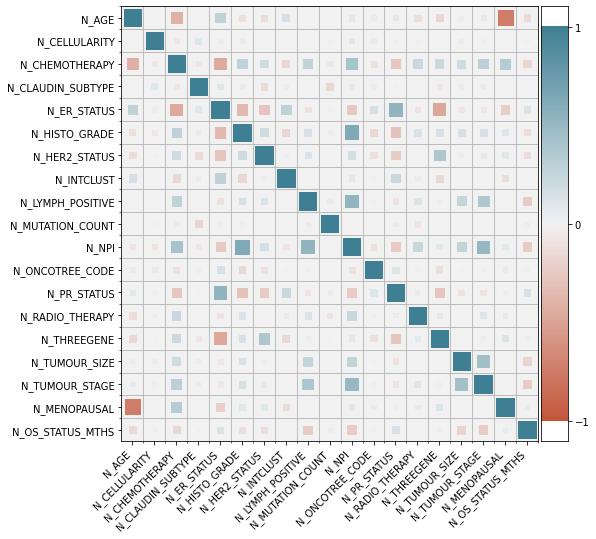

In [ ]:
# Create a basic correlation matrix/heatmap to view any initial relationships in the data
corr = allUsedCols_reduced.corr()
# corr = allUsedCols.corr()

plt.figure(figsize=(8, 8))
corrplot(corr, size_scale=300);

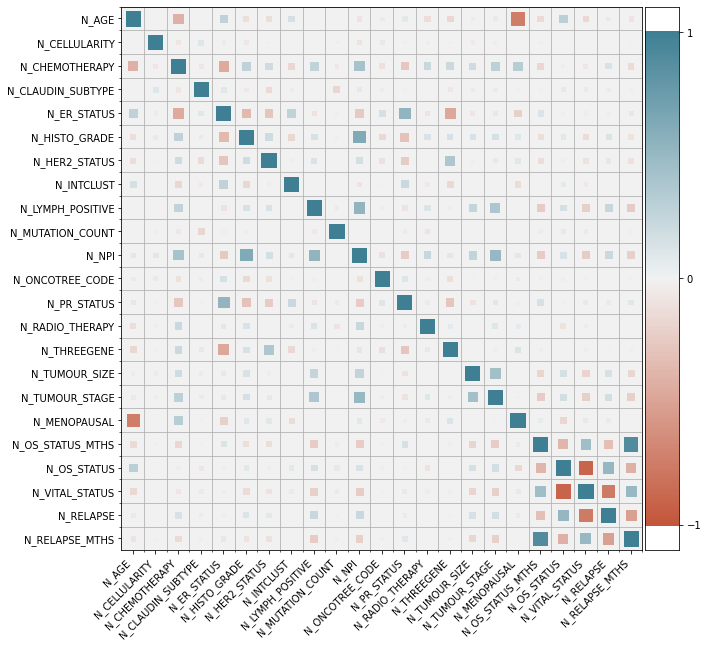

In [ ]:
# Create a basic correlation matrix/heatmap to view any initial relationships in the data
corr = allUsedColsRedPred.corr()
# corr = allUsedCols.corr()

plt.figure(figsize=(10, 10))
corrplot(corr, size_scale=200);

Calculating the values for the features with strong positive/negative correlation as shown in the heatmap
Positive <br>
•	NPI and Chemotherapy <br>
•	NPI and Histological Grade <br>
•	NPI and Lymph nodes examined positive <br>
•	PR Status and ER Status <br>
•	Three gene classifier and HER2 Status <br>
•	Tumour Stage and Tumour Size <br>
Negative <br>
•	Menopausal and Age at Diagnosis <br>
•	Three gene classifier and ER Status <br>




In [ ]:
print(f"Correlation Coefficient between different features  ")
print(f"Menopausal and Age at Diagnosis :\t{allUsedColsRedPred['N_MENOPAUSAL'].corr(allUsedColsRedPred['N_AGE'])}")
print(f"NPI and Histological Grade :\t\t {allUsedColsRedPred['N_NPI'].corr(allUsedColsRedPred['N_HISTO_GRADE'])}")
print(f"NPI and Lymph nodes examined positive :\t {allUsedColsRedPred['N_NPI'].corr(allUsedColsRedPred['N_LYMPH_POSITIVE'])}")
print(f"PR Status and ER Status :\t\t {allUsedColsRedPred['N_PR_STATUS'].corr(allUsedColsRedPred['N_ER_STATUS'])}")
print(f"NPI and Chemotherapy :\t\t\t {allUsedColsRedPred['N_NPI'].corr(allUsedColsRedPred['N_CHEMOTHERAPY'])}")
print(f"Three gene classifier and ER Status :\t{allUsedColsRedPred['N_THREEGENE'].corr(allUsedColsRedPred['N_ER_STATUS'])}" )
print(f"Age at Diagnosis and Chemotherapy :\t{allUsedColsRedPred['N_AGE'].corr(allUsedColsRedPred['N_CHEMOTHERAPY'])}" )
print(f"Tumour Stage and Tumour Size :\t\t {allUsedColsRedPred['N_TUMOUR_STAGE'].corr(allUsedColsRedPred['N_TUMOUR_SIZE'])}")
print(f"Three gene classifier and HER2 Status :\t {allUsedColsRedPred['N_THREEGENE'].corr(allUsedColsRedPred['N_HER2_STATUS'])}")
print(f"\nCorrelation Coefficient between features and predictor Overall Status (Months) ")
print(f"Overall Survival and NPI :\t\t{allUsedColsRedPred['N_OS_STATUS_MTHS'].corr(allUsedColsRedPred['N_NPI'])}" )
print(f"Overall Survival and Lymph Node :\t{allUsedColsRedPred['N_OS_STATUS_MTHS'].corr(allUsedColsRedPred['N_LYMPH_POSITIVE'])}" )
print(f"Overall Survival and Tumour Stage :\t{allUsedColsRedPred['N_OS_STATUS_MTHS'].corr(allUsedColsRedPred['N_TUMOUR_STAGE'])}" )
print(f"Overall Survival and Tumour Size :\t{allUsedColsRedPred['N_OS_STATUS_MTHS'].corr(allUsedColsRedPred['N_TUMOUR_SIZE'])}" )


Correlation Coefficient between different features  
Menopausal and Age at Diagnosis :	-0.7415291706217647
NPI and Histological Grade :		 0.6284097613724993
NPI and Lymph nodes examined positive :	 0.5393137725324199
PR Status and ER Status :		 0.5428037021084349
NPI and Chemotherapy :			 0.42678130774219963
Three gene classifier and ER Status :	-0.47102227359817495
Age at Diagnosis and Chemotherapy :	-0.4186634067475099
Tumour Stage and Tumour Size :		 0.44229910379096454
Three gene classifier and HER2 Status :	 0.37449144613683616

Correlation Coefficient between features and predictor Overall Status (Months) 
Overall Survival and NPI :		-0.24113793073247047
Overall Survival and Lymph Node :	-0.23840350659989515
Overall Survival and Tumour Stage :	-0.24378066249734628
Overall Survival and Tumour Size :	-0.18577082513771015


Data Distrubution

In [ ]:
allUsedCols_reducedList = allUsedCols_reduced.columns
print("allUsedCols_reducedList", allUsedCols_reducedList)

allUsedCols_reducedList Index(['Patient ID', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
       'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
       'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
       'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
       'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 'N_OS_STATUS_MTHS'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

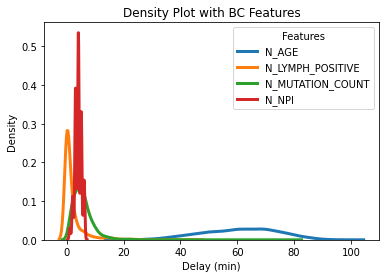

In [ ]:
# first 6 interested columns
# colsList = ['Age at Diagnosis', 'Lymph nodes examined positive', 'Mutation Count', 'N_NPI']
colsList = ['N_AGE', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI']
# allUsedCols_reduced
# Iterate through the five 
for col in colsList:
    # print("Value counts :", allUsedCols_reduced[col].value_counts() )
    # Draw the density plot
    sns.distplot(allUsedCols_reduced[col], hist = False, bins=100, kde = True, kde_kws = {'linewidth': 3}, label = col)
    # sns.displot(allUsedCols_reduced[col], hist = False, bins=100, kde = True, kde_kws = {'linewidth': 3}, label = col)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Features')
plt.title('Density Plot with BC Features')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

# /usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
# Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
#   warnings.warn(msg, FutureWarning)

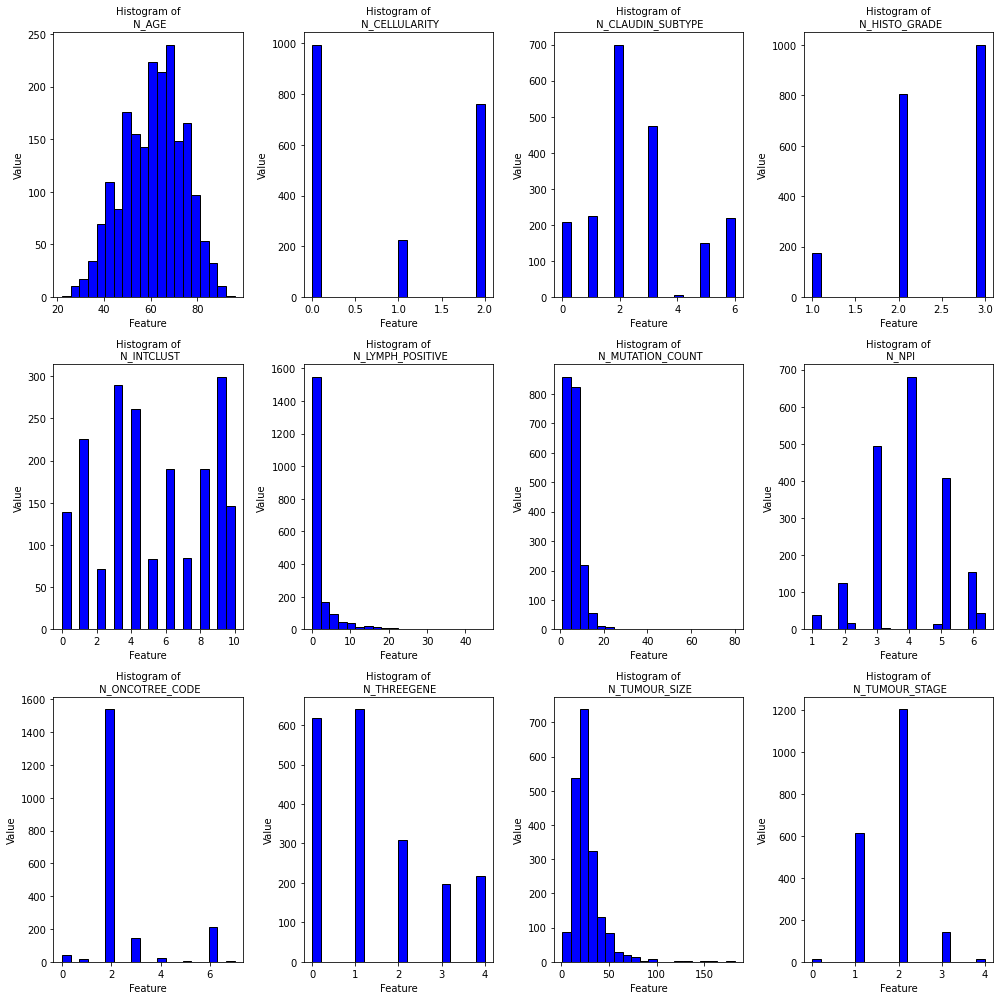

In [ ]:
# colsList = ['Age at Diagnosis', 'Lymph nodes examined positive', 'Mutation Count', 'N_NPI', 'Tumor Size', 'Tumor Stage']
# only display those features with more than 2 values
colsList = ['N_AGE', 'N_CELLULARITY', 'N_CLAUDIN_SUBTYPE', 'N_HISTO_GRADE', 'N_INTCLUST', 'N_LYMPH_POSITIVE', 
            'N_MUTATION_COUNT', 'N_NPI', 'N_ONCOTREE_CODE', 'N_THREEGENE', 'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE']

# Show 6 different binwidths
plt.figure(figsize=(14,14))

for i, col in enumerate(colsList):
# for i, col in enumerate(allUsedCols_reducedList ):
    # Set up the plot
    ax = plt.subplot(3, 4, i + 1)

    # Draw the plot
    ax.hist(allUsedCols_reduced[col], color = 'blue', edgecolor = 'black', bins=20 )
    # ax.hist(allUsedCols_reduced[col], color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram of\n %s' % col, size = 10)
    ax.set_xlabel('Feature', size = 10)
    ax.set_ylabel('Value', size= 10)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Num of BC patients at that age')

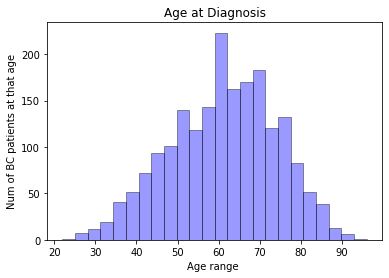

In [ ]:
# seaborn histogram for Age at Diagnosis
sns.distplot(allUsedCols_reduced['N_AGE'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Age at Diagnosis')
plt.xlabel('Age range ')
plt.ylabel('Num of BC patients at that age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Num of BC patients that survived')

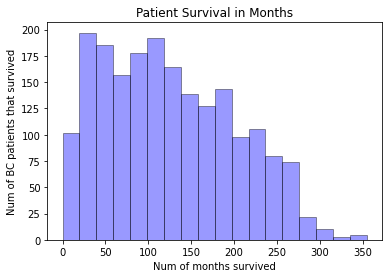

In [ ]:
# seaborn histogram
# sns.distplot(allUsedColsRedPred['N_OS_STATUS_MTHS'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
sns.distplot(allUsedCols_reduced['N_OS_STATUS_MTHS'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Patient Survival in Months')
plt.xlabel('Num of months survived')
plt.ylabel('Num of BC patients that survived')

In [ ]:
# stop

# Genomic Data

## CNA Data file

In [ ]:
# drive.mount('/content/gdrive')
# Load the brca csv
uploaded = files.upload()
# cna_file = 'data_CNA_sm.csv'
cna_file = 'data_CNA.csv'

Saving data_CNA.csv to data_CNA.csv


In [ ]:
cnaData = pd.read_csv(cna_file, header=0, index_col=['Hugo_Symbol'])
cnaData.head(3)

,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,MB-0064,MB-0066,MB-0068,MB-0079,MB-0081,MB-0083,MB-0093,MB-0095,MB-0097,MB-0100,MB-0108,MB-0113,MB-0120,MB-0124,MB-0134,MB-0138,MB-0139,MB-0148,MB-0149,MB-0157,MB-0171,MB-0174,MB-0197,MB-0198,MB-0221,MB-0222,MB-0223,MB-0224,MB-0229,MB-0233,MB-0235,...,MB-0667,MB-0876,MB-0885,MB-0907,MB-3547,MB-3823,MB-4298,MB-4823,MB-5022,MB-5076,MB-5104,MB-5106,MB-5109,MB-5131,MB-5136,MB-5137,MB-5140,MB-5158,MB-5219,MB-5255,MB-5289,MB-5301,MB-5302,MB-5325,MB-5349,MB-5385,MB-5387,MB-5394,MB-5413,MB-5460,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1BG,1.0,0,0,-1,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0,1,0,0,0,2,0,0,-1,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0,1,0,0,0,2,0,0,-1,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A1CF,29974.0,0,0,0,0,1,0,0,0,0,-1,0,2,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [ ]:
cnaData.shape

(22544, 2174)

In [ ]:
print("CNA data value counts:\n",cnaData['MB-0045'].value_counts().sort_values(ascending=False) )
print("CNA data value counts:\n",cnaData['MB-0079'].value_counts().sort_values(ascending=False) )
print("\nsum of all nulls:", cnaData.isna().sum().sum() )

CNA data value counts:
  0    13418
-1     6356
 1     1978
 2      478
-2      314
Name: MB-0045, dtype: int64
CNA data value counts:
  0    13445
-1     6197
 2     1488
 1     1408
-2        6
Name: MB-0079, dtype: int64

sum of all nulls: 5782


In [ ]:
# Convert categorical features to numerical
le = LabelEncoder()

# need to drop the Entrez_Gene_Id column as wont be using it 
cnaDataNew = cnaData.copy()
cnaDataNew.drop(columns=['Entrez_Gene_Id'], axis=1, inplace=True)

# check how many missing values in the rest of the data
print("1. sum of all nulls:", cnaDataNew.isna().sum().sum() )
# fill with a '0' value as it represents neutral
cnaDataNew.fillna( 0, inplace=True)
print("2. sum of all nulls:", cnaDataNew.isna().sum().sum() )

# Convert the Gene column from categorical to numerical.
cnaDataNew.index = le.fit_transform(cnaDataNew.index)

1. sum of all nulls: 2356
2. sum of all nulls: 0


In [ ]:
# import missingno as mno
# # Check any missing values after using fillna
# mno.matrix(cnaDataNew, figsize = (20, 6))

In [ ]:
cnaDataNew.describe()

,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,MB-0064,MB-0066,MB-0068,MB-0079,MB-0081,MB-0083,MB-0093,MB-0095,MB-0097,MB-0100,MB-0108,MB-0113,MB-0120,MB-0124,MB-0134,MB-0138,MB-0139,MB-0148,MB-0149,MB-0157,MB-0171,MB-0174,MB-0197,MB-0198,MB-0221,MB-0222,MB-0223,MB-0224,MB-0229,MB-0233,MB-0235,MB-0241,...,MB-0667,MB-0876,MB-0885,MB-0907,MB-3547,MB-3823,MB-4298,MB-4823,MB-5022,MB-5076,MB-5104,MB-5106,MB-5109,MB-5131,MB-5136,MB-5137,MB-5140,MB-5158,MB-5219,MB-5255,MB-5289,MB-5301,MB-5302,MB-5325,MB-5349,MB-5385,MB-5387,MB-5394,MB-5413,MB-5460,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
count,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.00000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.001686,-0.078203,-0.179649,-0.094482,0.095857,-0.107434,-0.023776,-0.085477,0.018009,-0.187899,-0.08978,-0.080953,0.029897,0.064097,-0.024973,0.152324,0.022578,0.112092,-0.197214,-0.037970,-0.227866,0.167317,-0.107035,-0.095724,0.026615,0.037837,0.134005,-0.308508,0.014194,0.198190,-0.064629,0.084413,-0.115729,-0.048306,0.033135,0.029897,-0.038458,-0.081529,0.258783,0.155385,...,0.050923,-0.000754,0.000355,0.011932,-0.041297,0.222410,-0.089780,0.042761,0.059262,0.133650,-0.006609,-0.113866,0.015570,0.010735,0.015170,0.061568,0.069021,0.047019,0.008073,0.023998,0.164656,0.117991,-0.026526,0.055713,-0.049281,0.029276,0.101845,0.013751,0.035442,0.021203,0.074344,0.029498,-0.013352,0.033845,0.038148,0.036329,0.006565,-0.032692,-0.017743,-0.012553
std,0.045141,0.312050,0.691339,0.656328,0.619439,0.696624,0.666871,0.889401,0.277239,0.488526,0.34661,0.771942,0.493485,0.539377,0.620265,0.528852,0.739309,0.374031,0.638667,0.403017,0.865031,0.682637,0.671824,0.439046,0.163691,0.248021,0.832996,0.775671,0.406740,0.687287,0.724010,0.441009,0.559428,0.486083,0.550443,0.381435,0.404454,0.847042,0.448089,0.729560,...,0.314768,0.044672,0.049840,0.154741,0.222553,0.434037,0.577732,0.239658,0.389547,0.352324,0.339481,0.469951,0.258256,0.401026,0.149644,0.256447,0.348035,0.224696,0.220750,0.194638,0.374212,0.364809,0.378299,0.249386,0.243830,0.303222,0.314107,0.169247,0.310593,0.216625,0.305606,0.272290,0.421918,0.506235,0.560226,0.584107,0.257869,0.391709,0.342012,0.405429
min,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.00000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,-2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000000

In [ ]:
cnaDataNew.head(5)

,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,MB-0064,MB-0066,MB-0068,MB-0079,MB-0081,MB-0083,MB-0093,MB-0095,MB-0097,MB-0100,MB-0108,MB-0113,MB-0120,MB-0124,MB-0134,MB-0138,MB-0139,MB-0148,MB-0149,MB-0157,MB-0171,MB-0174,MB-0197,MB-0198,MB-0221,MB-0222,MB-0223,MB-0224,MB-0229,MB-0233,MB-0235,MB-0241,...,MB-0667,MB-0876,MB-0885,MB-0907,MB-3547,MB-3823,MB-4298,MB-4823,MB-5022,MB-5076,MB-5104,MB-5106,MB-5109,MB-5131,MB-5136,MB-5137,MB-5140,MB-5158,MB-5219,MB-5255,MB-5289,MB-5301,MB-5302,MB-5325,MB-5349,MB-5385,MB-5387,MB-5394,MB-5413,MB-5460,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,0,0,-1,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0,1,0,0,0,2,0,0,-1,0,-1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,-1,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0,1,0,0,0,2,0,0,-1,0,-1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,0,1,0,0,0,0,-1,0,2,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,0,0,-1,-1,0,0,0,2,0,0,0,1,0,0,-1,0,1,0,-1,0,0,0,-1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,-1,1,0,...,0.0,0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,-1,-1,0,0,0,2,0,0,0,1,0,0,-1,0,1,0,-1,0,0,0,-1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,-1,1,0,...,0.0,0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
print(cnaDataNew.min().min() )
print(cnaDataNew.max().max() )
print(cnaDataNew.median().median() )
print(cnaDataNew.mean().mean() )

-2.0
2.0
0.0
-0.01680534248798972


In [ ]:
print(len(cnaDataNew.index))
print(cnaDataNew.index.nunique())
print(cnaDataNew.index.duplicated())
print(cnaDataNew.index.duplicated().any())
ids = cnaDataNew.index
cnaDataNew[ids.isin(ids[ids.duplicated()])].sort_index

22544
22543
[False False False ... False False False]
True


<bound method DataFrame.sort_index of        MB-0000  MB-0039  MB-0045  MB-0046  ...  MB-6213  MB-6230  MB-7148  MB-7188
14302        0        0       -1        0  ...      0.0      0.0      0.0      0.0
14302        0        0        0        0  ...      0.0      0.0      0.0      0.0

[2 rows x 2173 columns]>

## Data Expression Median 

In [ ]:
# drive.mount('/content/gdrive')
# Load the csv
uploaded = files.upload()
# expres_file = 'data_expression_median_sm.csv'
expres_file = 'data_expression_median.csv'

Saving data_expression_median.csv to data_expression_median.csv


In [ ]:
expressData = pd.read_csv(expres_file, header=0, index_col=['Hugo_Symbol'])
expressData.head(3)

,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,MB-0891,MB-0658,MB-0899,MB-0605,MB-0258,MB-0506,MB-0420,MB-0223,MB-0445,MB-0199,MB-0517,MB-0155,MB-0428,MB-0117,MB-0906,MB-0249,MB-0660,MB-0497,MB-0434,MB-0143,MB-0513,MB-0541,MB-0653,MB-0455,MB-0540,MB-0384,MB-0637,MB-0157,MB-0443,...,MB-0554,MB-0418,MB-0193,MB-0652,MB-0638,MB-0188,MB-0617,MB-7225,MB-7141,MB-7234,MB-7089,MB-7030,MB-7004,MB-7119,MB-7263,MB-7012,MB-0174,MB-7182,MB-7039,MB-3797,MB-7112,MB-0308,MB-7230,MB-5452,MB-6195,MB-6317,MB-5464,MB-5552,MB-5547,MB-6189,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RERE,473.0,8.676978,9.653589,9.033589,8.814855,9.274265,9.286585,8.437347,8.569973,8.892102,8.922748,9.053967,8.293003,8.643689,8.576128,9.145739,8.549045,8.464813,9.470544,8.931884,9.108254,9.293924,9.412060,7.928182,9.287009,9.464582,8.499836,9.014442,9.271371,7.963141,8.456240,9.147388,8.983929,8.515633,8.359195,9.515962,9.029006,8.117271,8.580599,8.909132,...,8.479151,8.397325,8.719216,8.392811,9.011042,9.403785,8.554209,9.269746,9.113783,9.563948,8.362293,8.788939,9.425152,8.881468,8.788134,8.187750,8.810624,8.616537,8.901800,9.266545,9.330020,9.802586,9.200226,9.511671,8.892469,8.678518,9.856422,9.072979,9.742585,9.522033,8.756024,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867
RNF165,494470.0,6.075331,6.687887,5.910885,5.628740,5.908698,6.206729,6.095592,6.383530,5.773691,6.461321,6.093467,6.725088,7.010217,6.058684,6.248063,5.517149,5.889024,6.203756,5.599323,6.573700,6.015345,6.189305,5.627189,7.219477,5.813297,6.625118,6.483809,5.862272,6.458807,6.382232,6.879329,5.597491,5.765491,6.252183,6.822961,5.552038,5.489726,5.879049,6.356010,...,6.087189,5.685471,5.571088,5.456827,7.298256,5.627323,5.398059,7.781377,5.841476,6.269474,6.518955,6.978793,5.926086,6.691978,6.770334,6.274364,7.783918,6.946620,6.224854,5.741536,7.087829,7.125938,6.320408,7.674681,6.346666,5.714495,6.369393,5.887199,6.543367,7.823506,7.101087,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722
CD049690,NaN,5.453928,5.454185,5.501577,5.471941,5.531743,5.372668,5.693519,5.401276,5.567946,5.410957,5.251529,5.397237,5.477248,5.245658,5.551140,5.600478,5.324317,5.487124,5.539970,5.399439,5.307517,5.435117,5.260821,5.342219,5.281483,5.326249,5.557980,5.528729,5.497224,5.223439,5.290582,5.358398,5.401544,5.483082,5.577538,5.361206,5.509140,5.535685,5.350565,...,5.512469,5.178378,5.359399,5.389955,5.726842,5.317667,5.392927,6.013559,5.436327,5.430632,5.698712,5.554994,5.419574,5.397236,5.177201,5.611088,5.453385,5.095888,5.421093,5.401043,5.325685,5.536461,5.565208,5.571498,5.415783,5.351437,5.397130,5.415733,5.326914,5.511611,5.344674,5.364348,5.504866,5.277314,5.439207,5.423027,5.534115,5.339346,5.566071,5.541395


In [ ]:
expressData.shape

(24368, 1905)

In [ ]:
# print("1. sum of nulls: \n", expressData.isna().sum().sort_values(ascending=False) )
print("\n1. sum of all nulls:", expressData.isna().sum().sum() )
# cnaData.fillna( 0, inplace=True)
# print("2. sum of nulls: \n", cnaData.isna().sum().sort_values(ascending=False) )
# print("\n2. sum of all nulls:", cnaData.isna().sum().sum() )


1. sum of all nulls: 5887


In [ ]:
# Convert categorical features to numerical
# le = LabelEncoder()

# need to drop the Entrez_Gene_Id column as wont be using it 
expressDataNew = expressData.copy()
expressDataNew.drop(columns=['Entrez_Gene_Id'], axis=1, inplace=True)

# check how many missing values in the rest of the data
print("\n1. sum of all nulls:", expressDataNew.isna().sum().sum() )
# fill with a '0' value as it represents neutral
# expressDataNew.fillna( 0, inplace=True)
# print("\n2. sum of all nulls:", expressDataNew.isna().sum().sum() )

# Convert the Gene column from categorical to numerical.
expressDataNew.index = le.fit_transform(expressDataNew.index)


1. sum of all nulls: 10


In [ ]:
# import missingno as mno

# mno.matrix(expressDataNew, figsize = (20, 6))

In [ ]:
expressData.describe()

,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,MB-0891,MB-0658,MB-0899,MB-0605,MB-0258,MB-0506,MB-0420,MB-0223,MB-0445,MB-0199,MB-0517,MB-0155,MB-0428,MB-0117,MB-0906,MB-0249,MB-0660,MB-0497,MB-0434,MB-0143,MB-0513,MB-0541,MB-0653,MB-0455,MB-0540,MB-0384,MB-0637,MB-0157,MB-0443,...,MB-0554,MB-0418,MB-0193,MB-0652,MB-0638,MB-0188,MB-0617,MB-7225,MB-7141,MB-7234,MB-7089,MB-7030,MB-7004,MB-7119,MB-7263,MB-7012,MB-0174,MB-7182,MB-7039,MB-3797,MB-7112,MB-0308,MB-7230,MB-5452,MB-6195,MB-6317,MB-5464,MB-5552,MB-5547,MB-6189,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
count,1.849100e+04,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,...,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24367.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000
mean,1.407503e+06,6.419405,6.426333,6.424082,6.423530,6.420989,6.420058,6.422109,6.430541,6.439284,6.427113,6.421370,6.442756,6.430932,6.424502,6.425369,6.418015,6.433975,6.419703,6.421175,6.425357,6.428423,6.417750,6.428673,6.428267,6.422413,6.425842,6.425941,6.421000,6.420093,6.426418,6.416534,6.428114,6.433655,6.434946,6.422262,6.430857,6.435108,6.427929,6.425611,...,6.426372,6.421482,6.414250,6.418338,6.420491,6.429160,6.422895,6.425610,6.415478,6.408467,6.430406,6.432542,6.413705,6.432348,6.417350,6.430651,6.428855,6.430449,6.423823,6.427138,6.428684,6.414107,6.435249,6.428477,6.424031,6.426804,6.421468,6.426839,6.434403,6.422514,6.435757,6.429500,6.419722,6.430647,6.421232,6.439359,6.435334,6.431376,6.418106,6.416224
std,1.139872e+07,1.504387,1.517367,1.504237,1.503597,1.502605,1.494591,1.505546,1.522607,1.515441,1.507437,1.505762,1.521541,1.504962,1.504533,1.507538,1.495831,1.513515,1.495263,1.502659,1.509779,1.521030,1.492102,1.504267,1.504221,1.495054,1.510509,1.499780,1.503050,1.504393,1.521223,1.502830,1.507568,1.520228,1.523716,1.513587,1.520620,1.519419,1.499931,1.510403,...,1.508116,1.495578,1.496776,1.498997,1.501189,1.516947,1.497986,1.499088,1.495538,1.488667,1.503548,1.514913,1.488365,1.508796,1.495328,1.516954,1.495169,1.510124,1.496403,1.514647,1.510495,1.486886,1.518570,1.510256,1.502607,1.508033,1.507699,1.501742,1.519895,1.505573,1.514333,1.518644,1.513775,1.518696,1.495481,1.526089,1.521033,1.515357,1.494263,1.474083
min,1.000000e+00,4.719331,4.712744,4.713820,4.716628,4.713404,4.741790,4.666984,4.724068,4.716283,4.710515,4.725024,4.723762,4.715282,4.748640,4.690744,4.708406,4.712733,4.714654,4.717962,4.712824,4.779589,4.710504,4.688208,4.699201,4.716733,4.740280,4.715005,4.712332,4.788528,4.707153,4.725099,4.780568,4.781325,4.717781,4.710648,4.730359,4.701086,4.711085,4.722473,...,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.808093,4.777749,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.712942,4.777749,4.712942,4.712942,4.712942,4.790083,4.777749,4.712942,4.712942,4.712942,4.712942,4.712942
25%,7.096500e+03,5.403837,5.405485,5.402336,5.406567,5.404909,5.405575,5.405069,5.402418,5.405946,5.3

In [ ]:
print(expressData.min().min() )
print(expressData.max().max() )
print(expressData.median().median() )
print(expressData.mean().mean() )
# print(expressData['MB-0189'].min() )
# print(expressData['MB-0189'].max() )

1.0
107075116.0
5.6700102480000005
745.2706457853477


In [ ]:
print("sum of nulls: \n", expressDataNew.isna().sum().sort_values(ascending=False) )
print("\nsum of all nulls:", expressDataNew.isna().sum().sum() )

sum of nulls: 
 MB-6329    1
MB-4705    1
MB-5452    1
MB-6018    1
MB-0241    1
          ..
MB-6248    0
MB-6330    0
MB-6184    0
MB-6283    0
MB-0362    0
Length: 1904, dtype: int64

sum of all nulls: 10


In [ ]:
# print("1. sum of nulls: \n", expressDataNew.isna().sum().sort_values(ascending=False) )
print("\n1. sum of all nulls:", expressDataNew.isna().sum().sum() )
expressDataNew.fillna( expressDataNew.median().median(), inplace=True)
# print("2. sum of nulls: \n", expressDataNew.isna().sum().sort_values(ascending=False) )
print("\n2. sum of all nulls:", expressDataNew.isna().sum().sum() )


1. sum of all nulls: 10

2. sum of all nulls: 0


In [ ]:
print(expressDataNew.min().min() )
print(expressDataNew.max().max() )
print(expressDataNew.median().median() )
print(expressDataNew.mean().mean() )

4.557910332
14.86252575
5.67000683675
6.427314318707454


# Ensemble model - Clinic data

## Classification of Overall Survival(Months) predictor

In [ ]:
allUsedCols_reduced_BACKUP = allUsedCols_reduced.copy()
# allUsedCols_reduced = allUsedCols_reduced_BACKUP.copy()

In [ ]:
allUsedCols_reduced.describe()

,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,61.081777,0.881373,0.207976,2.587582,0.760727,2.417466,0.124685,5.100959,2.010601,5.608783,4.010978,2.480061,0.525492,0.592125,1.373044,26.252903,1.760222,0.214538,125.246845,9.983342,1.976779
std,12.946174,0.933962,0.405962,1.697302,0.426747,0.648135,0.330444,3.163380,4.059705,3.992405,1.162204,1.312424,0.499476,0.491564,1.309507,15.313431,0.607655,0.410605,76.107209,6.343152,1.043724
min,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,3.000000,3.044000,2.000000,0.000000,0.000000,0.000000,17.000000,1.000000,0.000000,61.000000,5.000000,1.000000
50%,62.000000,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,5.000000,0.000000,5.000000,4.042000,2.000000,1.000000,1.000000,1.000000,23.000000,2.000000,0.000000,116.000000,9.000000,2.000000
75%,71.000000,2.000000,0.000000,3.000000,1.000000,3.000000,0.000000,8.000000,2.000000,7.000000,5.040000,2.000000,1.000000,1.000000,2.000000,30.000000,2.000000,0.000000,185.000000,15.000000,3.000000
max,96.000000,2.000000,1.000000,6.000000,1.000000,3.000000,1.000000,10.000000,45.000000,80.000000,6.360000,7.000000,1.000000,1.000000,4.000000,182.000000,4.000000,1.000000,355.000000,29.000000,3.000000


In [ ]:
allUsedCols_reduced.N_OS_STATUS_MTHS.head(15)
allUsedCols_reduced.N_OS_STATUS_MTHS.describe()
# allUsedCols_reduced.head(5)

count    1981.000000
mean      125.246845
std        76.107209
min         0.000000
25%        61.000000
50%       116.000000
75%       185.000000
max       355.000000
Name: N_OS_STATUS_MTHS, dtype: float64

In [ ]:
len(allUsedCols_reduced.columns)

20

In [ ]:
# # Create a new column that has the survival in Years and another column with Survival classification. 
#  < 60 months, < 2 years = 1
#  60 months / 5 years = 2
#  120 months / 10+ years = 3
# Add a predictor variable column to use Survival Years instead of Survival months. Get survival in years and round down
allUsedCols_reduced['N_SURVIVE_YEARS']=allUsedCols_reduced.apply(lambda x: math.floor(int(x['N_OS_STATUS_MTHS'])/12), axis=1)

# Create a column with the survival classified 
def survivalClass(data):
  survivalClassValue=0
  if(data < 5): survivalClassValue=1
  elif((data > 5) and (data < 10)): survivalClassValue=2
  elif(data > 10): survivalClassValue=3 
  return survivalClassValue

allUsedCols_reduced['N_SURVIVE_CLASS'] = allUsedCols_reduced['N_SURVIVE_YEARS'].apply(survivalClass)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
# allUsedCols_reduced.N_SURVIVE_YEARS.describe()
# allUsedCols_reduced.N_SURVIVE_YEARS.unique()

print("N_SURVIVE_CLASS:\n", allUsedCols_reduced.N_SURVIVE_CLASS.value_counts().sort_index() )


N_SURVIVE_CLASS:
 0    206
1    484
2    441
3    850
Name: N_SURVIVE_CLASS, dtype: int64


In [ ]:
allUsedCols_reduced.head(5)

,Patient ID,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS
0,MB-0000,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,140,11,3
1,MB-0002,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,85,7,2
2,MB-0005,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,164,13,3
3,MB-0006,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,165,13,3
4,MB-0008,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,41,3,1


In [ ]:
allUsedCols_reduced['N_SURVIVE_YEARS'].head(5)

0    11
1     7
2    13
3    13
4     3
Name: N_SURVIVE_YEARS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Num of BC patients that survived')

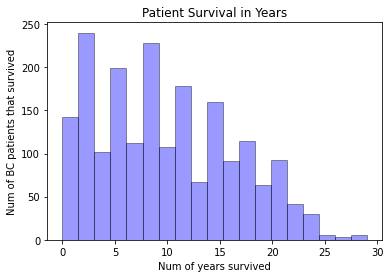

In [ ]:
# seaborn histogram
sns.distplot(allUsedCols_reduced['N_SURVIVE_YEARS'], hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Patient Survival in Years')
plt.xlabel('Num of years survived')
plt.ylabel('Num of BC patients that survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


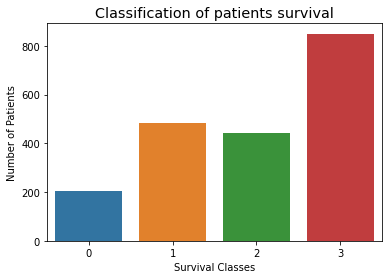

In [ ]:
sns.countplot(allUsedCols_reduced['N_SURVIVE_CLASS'],label="Number of Patients")
sns.set(color_codes=True, font_scale=1.2)
# setting x-label 
plt.xlabel("Survival Classes")
# setting y_label 
plt.ylabel("Number of Patients")  
plt.title("Classification of patients survival")
plt.show()

In [ ]:
# print(len(allUsedCols_reduced.columns))
# allUsedCols_reduced.head(5)

## Ensemble data set-up

In [ ]:
# Create a list to write Accuracy resuts to 
accuracyresults = []
accuracyresults.append(("**** ENSEMBLE ON CLINICOPATHOLOGICAL", "-", "-"))

In [ ]:
len(allUsedCols_reduced.columns)

22

In [ ]:
## set the X & y variables
X = allUsedCols_reduced.iloc[:, 1:19]  # dataframe of values
y = allUsedCols_reduced.iloc[:, 21]     # array of classified survival values

print ("X.shape = ", X.shape)
print ("Y.shape = ", y.shape)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

print ("X_train.shape = ", X_train.shape)
print ("y_train.shape = ", y_train.shape)
print ("X_test.shape  = ", X_test.shape)
print ("y_test.shape  = ", y_test.shape)

# StandardScaler performs the task of Standardization on the feature set of variables 
# they need to be standardised to have a common scale to build a ML model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X.shape =  (1981, 18)
Y.shape =  (1981,)
X_train.shape =  (1584, 18)
y_train.shape =  (1584,)
X_test.shape  =  (397, 18)
y_test.shape  =  (397,)


In [ ]:
# Append 
accuracyresults.append(("Accuracy Score", "Score X_train", "Score X_test" ))

SVM

In [ ]:
# implementing the SVC method for Support Vector Machine Algorithm

# I tested the kernels(linear, poly(deg=8), Gaussian(rbf), sigmoid)
# 70 / 30 split
# SVC(kernel='poly') -           training set: 0.61, test set: 0.45
# SVC(kernel='poly', degree=8) - training set: 0.67, test set: 0.42
# SVC(kernel='linear') -         training set: 0.50, test set: 0.48
# SVC(kernel='rbf') -            training set: 0.57, test set: 0.48
# 80 / 20 split
# SVC(kernel='poly') -           training set: 0.59, test set: 0.47
# SVC(kernel='poly', degree=8) - training set: 0.65, test set: 0.44
# SVC(kernel='poly', degree=4) - training set: 0.63, test set: 0.46
# SVC(kernel='linear') -         training set: 0.50, test set: 0.49
# SVC(kernel='rbf') -            training set: 0.56, test set: 0.49
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
# Make the predictions using the test data to predict test data results
Y_prediction = classifier.predict(X_test)
print("Support Vector Machines Test Accuracy:\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of SVM classifier on training set: \t {:.2f}'.format(classifier.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of SVM classifier on test set:\t\t {:.2f}'.format(classifier.score(X_test, y_test) *100)+"%" )

#Write out results to list
accuracyresults.append(("**SVM", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_test, y_test) * 100) ))+"%") ))


Support Vector Machines Test Accuracy:			 49.37%
Classifier Score of SVM classifier on training set: 	 55.56%
Classifier Score of SVM classifier on test set:		 49.37%


SVM Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   7   2  32]
 [  0  37   3  50]
 [  0  22   0  68]
 [  0  16   1 159]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.45      0.41      0.43        90
           2       0.00      0.00      0.00        90
           3       0.51      0.90      0.66       176

    accuracy                           0.49       397
   macro avg       0.24      0.33      0.27       397
weighted avg       0.33      0.49      0.39       397



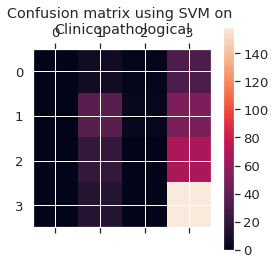

In [ ]:
# SVM Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "SVM on \nClinicopathological")

SVM K-fold cross validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(classifier, X, y, cv=5)
# scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

# [0.48110831 0.47979798 0.4469697  0.46212121 0.46717172]
# 0.4674337836806351

[0.48110831 0.47979798 0.4469697  0.46212121 0.46717172]
0.4674337836806351


In [ ]:
accuracyresults.append(("**SVM  K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**SVM  K-fold Mean Accuracy of all 5 folds", "-", "-", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**SVM Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

In [ ]:
accuracyresults

## SMOTE 

In [ ]:
print("Before smote y_train class 0: {}".format(sum(y_train == 0)) )
print("Before smote y_train class 1: {}".format(sum(y_train == 1)) )
print("Before smote y_train class 2: {}".format(sum(y_train == 2)) )
print("Before smote y_train class 3: {}".format(sum(y_train == 3)) )

mySmote = SMOTE(random_state = 2)
X_train_res, y_train_res = mySmote.fit_resample(X_train, y_train.ravel())

print("AFTER smote y_train class 0: {}".format(sum(y_train_res == 0)) )
print("AFTER smote y_train class 1: {}".format(sum(y_train_res == 1)) )
print("AFTER smote y_train class 2: {}".format(sum(y_train_res == 2)) )
print("AFTER smote y_train class 3: {}".format(sum(y_train_res == 3)) )


Before smote y_train class 0: 161
Before smote y_train class 1: 389
Before smote y_train class 2: 323
Before smote y_train class 3: 650
AFTER smote y_train class 0: 650
AFTER smote y_train class 1: 650
AFTER smote y_train class 2: 650
AFTER smote y_train class 3: 650


In [ ]:
# Apply SVM to the resampled data
classifier_res = SVC(kernel='rbf')
classifier_res.fit(X_train_res, y_train_res.ravel())
# Make the predictions using the test data to predict test data results
Y_prediction_res = classifier_res.predict(X_test)
print("SMOTE: Support Vector Machines Test Accuracy:\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction_res) * 100)+"%" )
print('SMOTE: Classifier Score of SVM classifier on training set: \t {:.2f}'.format(classifier_res.score(X_train_res, y_train_res.ravel()) * 100)+"%" )
print('SMOTE: Classifier Score of SVM classifier on test set:\t\t {:.2f}'.format(classifier_res.score(X_test, y_test) *100)+"%" )

# # SVM Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction_res))
classificationReport = classification_report(y_test, Y_prediction_res)
print(confusionMatrix)
print(classificationReport)
# showCofusionMatrix(confusionMatrix, "SMOTE : SVM on \nClinicopathological")

SMOTE: Support Vector Machines Test Accuracy:			 43.83%
SMOTE: Classifier Score of SVM classifier on training set: 	 98.19%
SMOTE: Classifier Score of SVM classifier on test set:		 43.83%
[[  2   6   2  29]
 [  2  28   7  39]
 [  5  17  14  70]
 [  4  18  15 123]]
              precision    recall  f1-score   support

           0       0.15      0.05      0.08        39
           1       0.41      0.37      0.39        76
           2       0.37      0.13      0.19       106
           3       0.47      0.77      0.58       160

    accuracy                           0.44       381
   macro avg       0.35      0.33      0.31       381
weighted avg       0.40      0.44      0.38       381



Naive Bayes

In [ ]:
gnb = GaussianNB()
#Train the model using the training
gnb.fit(X_train, y_train)
# prediction on test set
Y_prediction = gnb.predict(X_test)
print("Naive Bayes Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on training set: \t {:.2f}'.format(gnb.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on test set:\t\t {:.2f}'.format(gnb.score(X_test, y_test) *100)+"%" )

#Write out results to list
accuracyresults.append(("**Naive Bayes", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_test, y_test) * 100) ))+"%") ))

Naive Bayes Test Accuracy:					 48.61%
Classifier Score of Naive Bayes classifier on training set: 	 47.03%
Classifier Score of Naive Bayes classifier on test set:		 48.61%


Naive Bayes Confusion Matrix

[[  0  12   4  25]
 [  0  45   9  36]
 [  3  20   7  60]
 [  0  25  10 141]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.44      0.50      0.47        90
           2       0.23      0.08      0.12        90
           3       0.54      0.80      0.64       176

    accuracy                           0.49       397
   macro avg       0.30      0.34      0.31       397
weighted avg       0.39      0.49      0.42       397



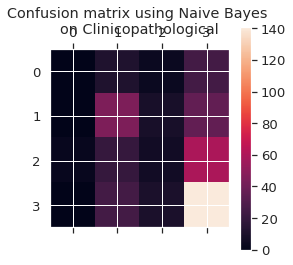

In [ ]:
# Naive Bayes Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Naive Bayes \non Clinicopathological")

Naive Bayes K-fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gnb, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Naive Bayes K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Naive Bayes K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Naive Bayes Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.44080605 0.48737374 0.44949495 0.44949495 0.48737374]
0.4629086838154848


Random Forest

In [ ]:
#Create a Random Forest Classifier
randomFor=RandomForestClassifier(n_estimators=10)
# Train/Fit the model  
randomFor.fit(X_train,y_train)
# prediction on test set
Y_prediction=randomFor.predict(X_test)
print("Random Forest Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Random Forest classifier on training set: \t {:.2f}'.format(randomFor.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Random Forest classifier on test set:\t {:.2f}'.format(randomFor.score(X_test, y_test) *100)+"%" )

#Write out results to list
accuracyresults.append(("**Random Forest", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_test, y_test) * 100) ))+"%") ))

Random Forest Test Accuracy:					 42.32%
Classifier Score of Random Forest classifier on training set: 	 97.85%
Classifier Score of Random Forest classifier on test set:	 42.32%


Random Forest Confusion Matrix

[[  2  11  11  17]
 [  4  37  19  30]
 [  8  20  23  39]
 [ 14  27  29 106]]
              precision    recall  f1-score   support

           0       0.07      0.05      0.06        41
           1       0.39      0.41      0.40        90
           2       0.28      0.26      0.27        90
           3       0.55      0.60      0.58       176

    accuracy                           0.42       397
   macro avg       0.32      0.33      0.33       397
weighted avg       0.40      0.42      0.41       397



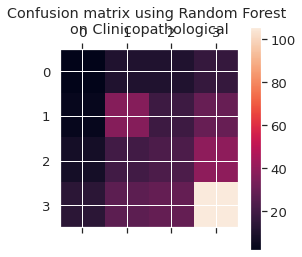

In [ ]:
# Random Forest Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Random Forest \non Clinicopathological")

Random Forest K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(randomFor, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Random Forest K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Random Forest K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Random Forest Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.41309824 0.48232323 0.40909091 0.40151515 0.38383838]
0.41797318270869904


In [ ]:
accuracyresults

[('**** ENSEMBLE ON CLINICOPATHOLOGICAL', '-', '-'),
 ('Accuracy Score', 'Score X_train', 'Score X_test'),
 ('**SVM', '-', '-'),
 ('49.370%', '55.556%', '49.370%'),
 ('**SVM  K-fold cross validation', '-', '-'),
 ('48.111%', '47.980%', '44.697%', '46.212%', '46.717%'),
 ('**SVM  K-fold Mean Accuracy of all 5 folds', '-', '-', '-', '-'),
 ('46.743%', '-', '-', '-', '-'),
 ('**SVM Confusion Matrix', '-', '-'),
 (array([[  0,   7,   2,  32],
         [  0,  37,   3,  50],
         [  0,  22,   0,  68],
         [  0,  16,   1, 159]]), '-', '-', '-', '-'),
 ('**Naive Bayes', '-', '-'),
 ('48.615%', '47.033%', '48.615%'),
 ('**Naive Bayes K-fold cross validation', '-', '-'),
 ('44.081%', '48.737%', '44.949%', '44.949%', '48.737%'),
 ('**Naive Bayes K-fold Mean Accuracy of all 5 folds', '-', '-'),
 ('46.291%', '-', '-', '-', '-'),
 ('**Naive Bayes Confusion Matrix', '-', '-'),
 (array([[  0,  12,   4,  25],
         [  0,  45,   9,  36],
         [  3,  20,   7,  60],
         [  0,  25,  10

Feature Importance

In [ ]:
# The impurity-based feature importances. The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction of the criterion 
# brought by that feature. It is also known as the Gini importance.
importantRandomForest = randomFor.feature_importances_
# column names
columns = allUsedCols_reduced.iloc[0:1, 0:18].columns
# Match the feature_importances_ with the columns to show which columns the 
randomForCoeff = pd.Series(importantRandomForest, columns)
randomForCoeff

Patient ID           0.144726
N_AGE                0.040055
N_CELLULARITY        0.018109
N_CHEMOTHERAPY       0.051556
N_CLAUDIN_SUBTYPE    0.013507
N_ER_STATUS          0.029489
N_HISTO_GRADE        0.015857
N_HER2_STATUS        0.082699
N_INTCLUST           0.060980
N_LYMPH_POSITIVE     0.103461
N_MUTATION_COUNT     0.141613
N_NPI                0.035664
N_ONCOTREE_CODE      0.023817
N_PR_STATUS          0.031736
N_RADIO_THERAPY      0.050048
N_THREEGENE          0.115736
N_TUMOUR_SIZE        0.024679
N_TUMOUR_STAGE       0.016269
dtype: float64

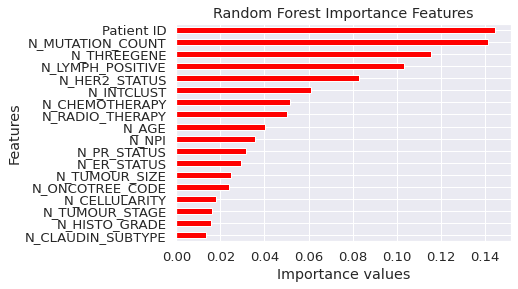

In [ ]:
randomForCoeff.sort_values().plot.barh(color='red');
# setting x-label 
plt.xlabel("Importance values")
# setting y_label 
plt.ylabel("Features")  
plt.title("Random Forest Importance Features")
plt.show()

Gradient Boosting

In [ ]:
#Create a Gradient Boosting Classifier
gradBoosting=GradientBoostingClassifier(random_state=20)
# Train/Fit the model 
gradBoosting.fit(X_train,y_train)
# prediction on test set
Y_prediction=gradBoosting.predict(X_test)

print("Gradient Boosting Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on training set: \t {:.2f}'.format(gradBoosting.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on test set:\t\t {:.2f}'.format(gradBoosting.score(X_test, y_test) *100)+"%" )

#Write out results to list
accuracyresults.append(("**Gradient Boosting", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_test, y_test) * 100) ))+"%") ))

Gradient Boosting Test Accuracy:					 49.37%
Classifier Score of Gradient Boosting classifier on training set: 	 67.23%
Classifier Score of Gradient Boosting classifier on test set:		 49.37%


Gradient Boosting Confusion Matrix

[[  1   8   9  23]
 [  1  40  12  37]
 [  3  19  16  52]
 [  3  22  12 139]]
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        41
           1       0.45      0.44      0.45        90
           2       0.33      0.18      0.23        90
           3       0.55      0.79      0.65       176

    accuracy                           0.49       397
   macro avg       0.36      0.36      0.34       397
weighted avg       0.43      0.49      0.45       397



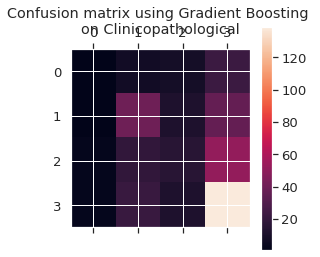

In [ ]:
# Gradient Boosting Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Gradient Boosting \non Clinicopathological")


Gradient Boosting K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gradBoosting, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Gradient Boosting K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Gradient Boosting K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Gradient Boosting Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.46599496 0.49494949 0.45454545 0.43181818 0.47727273]
0.4649161641604967


In [ ]:
accuracyresults

[('**** ENSEMBLE ON CLINICOPATHOLOGICAL', '-', '-'),
 ('Accuracy Score', 'Score X_train', 'Score X_test'),
 ('**SVM', '-', '-'),
 ('49.370%', '55.556%', '49.370%'),
 ('**SVM  K-fold cross validation', '-', '-'),
 ('48.111%', '47.980%', '44.697%', '46.212%', '46.717%'),
 ('**SVM  K-fold Mean Accuracy of all 5 folds', '-', '-', '-', '-'),
 ('46.743%', '-', '-', '-', '-'),
 ('**SVM Confusion Matrix', '-', '-'),
 (array([[  0,   7,   2,  32],
         [  0,  37,   3,  50],
         [  0,  22,   0,  68],
         [  0,  16,   1, 159]]), '-', '-', '-', '-'),
 ('**Naive Bayes', '-', '-'),
 ('48.615%', '47.033%', '48.615%'),
 ('**Naive Bayes K-fold cross validation', '-', '-'),
 ('44.081%', '48.737%', '44.949%', '44.949%', '48.737%'),
 ('**Naive Bayes K-fold Mean Accuracy of all 5 folds', '-', '-'),
 ('46.291%', '-', '-', '-', '-'),
 ('**Naive Bayes Confusion Matrix', '-', '-'),
 (array([[  0,  12,   4,  25],
         [  0,  45,   9,  36],
         [  3,  20,   7,  60],
         [  0,  25,  10

Feature Importance

In [ ]:
# The impurity-based feature importances. The higher, the more important the feature. 
importantGradBoosting = gradBoosting.feature_importances_
# Match the feature_importances_ with the columns to show which columns the 
gradBoostingCoeff = pd.Series(importantGradBoosting, columns)
gradBoostingCoeff

Patient ID           0.169265
N_AGE                0.009885
N_CELLULARITY        0.021273
N_CHEMOTHERAPY       0.032210
N_CLAUDIN_SUBTYPE    0.026848
N_ER_STATUS          0.012786
N_HISTO_GRADE        0.013890
N_HER2_STATUS        0.045088
N_INTCLUST           0.072967
N_LYMPH_POSITIVE     0.086767
N_MUTATION_COUNT     0.291656
N_NPI                0.018669
N_ONCOTREE_CODE      0.017711
N_PR_STATUS          0.009023
N_RADIO_THERAPY      0.034110
N_THREEGENE          0.103332
N_TUMOUR_SIZE        0.032133
N_TUMOUR_STAGE       0.002389
dtype: float64

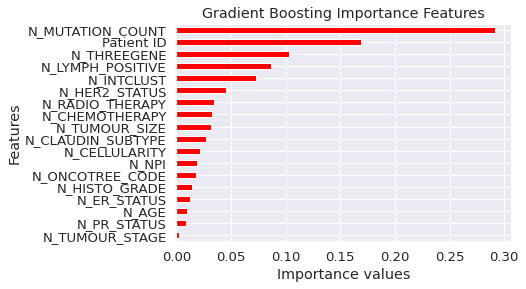

In [ ]:
gradBoostingCoeff.sort_values().plot.barh(color='red');
plt.xlabel("Importance values")
plt.ylabel("Features")  
plt.title("Gradient Boosting Importance Features")
plt.show()

Classification report

In [ ]:
# pred = knn.predict(X_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

In [ ]:
# Send all the accuracy results to a csv file
with open('/content/gdrive/My Drive/a_Dissertation/metabric/dissertation_accuracy_results_Large.csv', "w+") as csvFile:
  csvWriter = csv.writer(csvFile, delimiter=',')  
  csvWriter.writerows(accuracyresults)

In [ ]:
# stop

# Dimensionality Reduction

### Transpose CNA & Expression 

In [ ]:
print(cnaDataNew.head(3))
cnaDataNewTransposed = cnaDataNew.transpose()
cnaDataNewTransposed.head(3)

   MB-0000  MB-0039  MB-0045  MB-0046  ...  MB-6213  MB-6230  MB-7148  MB-7188
0        0        0       -1        0  ...      0.0      0.0      0.0      0.0
1        0        0       -1        0  ...      0.0      0.0      0.0      0.0
2        0        0        0        0  ...      0.0      0.0     -1.0      0.0

[3 rows x 2173 columns]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22503,22504,22505,22506,22507,22508,22509,22510,22511,22512,22513,22514,22515,22516,22517,22518,22519,22520,22521,22522,22523,22524,22525,22526,22527,22528,22529,22530,22531,22532,22533,22534,22535,22536,22537,22538,22539,22540,22541,22542
MB-0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
MB-0045,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.0,2.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-2.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,0.0


In [ ]:
print(expressDataNew.head(3))
expressDataTransposed = expressDataNew.transpose()
expressDataTransposed.head(3)

        MB-0362   MB-0346   MB-0386  ...   MB-5471   MB-5127   MB-4313
19197  8.676978  9.653589  9.033589  ...  9.049296  8.858622  8.415867
19415  6.075331  6.687887  5.910885  ...  6.850000  6.550450  6.831722
7713   5.453928  5.454185  5.501577  ...  5.339346  5.566071  5.541395

[3 rows x 1904 columns]


,19197,19415,7713,3704,17795,8285,17424,1006,20341,19948,2847,10893,11156,1767,5334,14397,17558,12388,11722,20615,18085,8876,7727,9678,15640,12687,16959,12116,21506,10872,8556,6479,11844,386,6679,9356,17338,7812,14911,2799,...,13363,8883,24023,15444,9548,22067,1166,10043,21302,7209,10592,20212,3870,5367,16227,22044,20648,18645,21727,14699,4692,12359,10517,21608,2284,841,1917,10672,19824,23190,6004,5826,22962,23225,8984,7488,7459,13223,9298,11155
MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,5.332863,5.275676,5.443896,5.391825,5.332039,6.654909,6.116269,5.502459,6.170848,10.014262,6.223714,5.282517,5.453830,5.393823,6.781114,7.504079,5.180251,8.852986,10.166590,6.338942,7.830940,7.759911,5.541563,5.334757,8.293493,5.190575,5.795106,5.557441,8.133722,6.463731,...,6.239050,5.443849,5.839094,8.052659,5.595163,6.644065,5.328186,5.438294,9.900976,5.102717,5.485229,9.554390,6.646690,5.250567,6.171017,5.345515,5.289049,6.642358,5.384824,5.624982,5.244877,8.245886,11.179554,6.108972,9.144958,5.172836,5.623032,5.548618,5.335488,5.309543,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,7.563477,5.376381,5.319857,5.493960,4.974668,6.546139,5.496121,5.396100,6.462099,9.348527,5.771658,5.312611,5.856599,5.038963,6.932299,5.470089,5.506765,8.578356,8.954535,6.614996,7.266968,8.737748,5.351617,5.221231,8.003608,5.204525,5.422077,5.604375,8.575275,6.328006,...,6.449489,5.488251,5.632262,8.620249,5.516554,6.439604,5.334651,5.223924,9.313453,5.198502,5.287171,8.356079,6.750425,5.619664,6.564583,5.469792,5.614731,6.305837,5.835178,5.372428,5.174309,7.636559,9.593976,6.708027,7.387434,5.468569,5.482444,5.451468,5.471839,5.579198,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,5.482155,5.463788,5.254294,5.405767,5.306545,6.290807,6.202997,5.166248,5.881027,8.811785,6.532682,5.436369,5.381199,5.451264,6.671176,5.487076,5.579007,8.381930,9.688830,7.174419,7.510642,7.538776,5.334597,5.320169,8.242360,5.397104,5.536268,5.429689,7.773822,6.301213,...,6.132212,5.462526,6.376585,7.680436,5.451802,7.268240,5.363809,5.360805,9.228034,5.125565,5.411039,7.151328,6.669571,5.215369,6.637601,5.314732,5.173775,5.937808,5.676467,5.541437,5.261631,8.105658,11.108679,6.977441,9.030003,5.235995,5.641355,5.762705,5.322604,5.484665,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617


In [ ]:
allUsedCols_reduced.head(5)

,Patient ID,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS
0,MB-0000,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,140,11,3
1,MB-0002,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,85,7,2
2,MB-0005,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,164,13,3
3,MB-0006,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,165,13,3
4,MB-0008,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,41,3,1


## PCA on CNA data 
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilised for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. It is a Unsupervised dimensionality reduction technique

In [ ]:
print(cnaDataNewTransposed.shape)
cnaDataNewTransposed.head(5)

(2173, 22544)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22503,22504,22505,22506,22507,22508,22509,22510,22511,22512,22513,22514,22515,22516,22517,22518,22519,22520,22521,22522,22523,22524,22525,22526,22527,22528,22529,22530,22531,22532,22533,22534,22535,22536,22537,22538,22539,22540,22541,22542
MB-0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
MB-0045,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.0,2.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-2.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,0.0
MB-0046,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0


In [ ]:
patientIDs = cnaDataNewTransposed.index
patientIDs

Index(['MB-0000', 'MB-0039', 'MB-0045', 'MB-0046', 'MB-0048', 'MB-0050',
       'MB-0053', 'MB-0062', 'MB-0064', 'MB-0066',
       ...
       'MB-5467', 'MB-5546', 'MB-5585', 'MB-5625', 'MB-5648', 'MB-6020',
       'MB-6213', 'MB-6230', 'MB-7148', 'MB-7188'],
      dtype='object', length=2173)

In [ ]:
## set the X variable 
X_CNA = cnaDataNewTransposed.iloc[:, :]  # array of values

In [ ]:
# The data will not need to be scaled as the min/max values are -2, -1, 0, 1, 2
# Applying PCA model
pca_cna = PCA(n_components=200)
# Fit the model with X and apply the dimensionality reduction on X_CNA
principalComponents_cna = pca_cna.fit_transform(X_CNA)

In [ ]:
columnsCNA10 = ['pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']

columnsCNA100 = ['pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100'
                ]

columnsCNA200 = ['pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100',
                'pc101','pc102', 'pc103', 'pc104', 'pc105', 'pc106', 'pc107', 'pc108', 'pc109', 'pc110',
                'pc111', 'pc112',  'pc113', 'pc114', 'pc115', 'pc116', 'pc117', 'pc18', 'pc19', 'pc20',
                'pc121', 'pc122',  'pc123', 'pc124', 'pc125', 'pc126', 'pc127', 'pc128', 'pc129', 'pc130',
                'pc131', 'pc132',  'pc133', 'pc134', 'pc135', 'pc136', 'pc137', 'pc138', 'pc139', 'pc140',
                'pc141', 'pc142',  'pc143', 'pc144', 'pc145', 'pc146', 'pc147', 'pc148', 'pc149', 'pc150',
                'pc151', 'pc152',  'pc153', 'pc154', 'pc155', 'pc156', 'pc157', 'pc158', 'pc159', 'pc160',
                'pc161', 'pc162',  'pc163', 'pc164', 'pc165', 'pc166', 'pc167', 'pc168', 'pc169', 'pc170',
                'pc171', 'pc172',  'pc173', 'pc174', 'pc175', 'pc176', 'pc177', 'pc178', 'pc179', 'pc180',
                'pc181', 'pc182',  'pc183', 'pc184', 'pc185', 'pc186', 'pc187', 'pc188', 'pc189', 'pc190',
                'pc191', 'pc192',  'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198', 'pc199', 'pc200'
                ]

In [ ]:
# Create a DF with the new array and column names
prinComp_cnaDF = pd.DataFrame(data = principalComponents_cna, columns = columnsCNA200)
# prinComp_cnaDF = pd.DataFrame(data = principalComponents_cna, columns = columnsCNA10)
# prinComp_cnaDF = pd.DataFrame(data = principalComponents_cna, columns = columnsCNA100)

In [ ]:
print(prinComp_cnaDF.shape)
prinComp_cnaDF.head(2)

(2173, 200)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,...,pc161,pc162,pc163,pc164,pc165,pc166,pc167,pc168,pc169,pc170,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180,pc181,pc182,pc183,pc184,pc185,pc186,pc187,pc188,pc189,pc190,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
0,-26.830591,-21.505156,-12.513010,1.698298,-4.495355,0.746588,-2.889412,-3.251023,1.641596,-0.326692,6.089865,-0.322984,-0.181734,-0.074357,1.118536,1.444361,-1.174695,1.464429,-1.713879,2.154267,0.028093,-0.976269,1.893738,-0.052988,0.571185,0.562827,0.56218,-1.368842,-0.757359,-0.054028,-1.058226,0.961946,-0.071759,-0.274982,-0.554954,-0.429057,0.072175,-0.644191,-0.249093,-1.346445,...,-0.266269,0.059807,0.536705,-0.050524,0.878269,0.038090,-0.121675,-0.228627,-0.220331,0.014561,-0.023215,-0.399773,0.022127,0.061103,-0.199577,0.124614,-0.514275,0.052644,0.334936,-0.076675,0.123417,0.036551,0.424059,-0.107193,-0.261543,0.232426,-0.057766,-0.178194,-0.134388,0.353842,0.012216,0.374896,-0.262904,-0.033231,-0.239939,-0.449877,0.091265,0.315156,0.223365,0.021774
1,-27.917229,-16.116137,-1.620363,-12.947952,-14.824419,2.364667,-10.320403,-2.613739,4.055150,3.934625,-2.459678,-7.738513,-8.541228,4.916999,1.571645,2.335487,-17.383891,-1.023763,-1.098331,-6.690225,0.411799,0.735404,1.577952,0.265744,8.546719,-1.701092,1.31977,1.477768,-2.287694,7.465253,-2.172763,-2.434391,-0.751602,4.428193,0.200391,-1.444798,1.014127,-3.878593,3.736680,0.612738,...,0.065580,0.102391,-1.203303,0.311229,-3.997614,-0.969179,-2.087902,1.597613,-2.265344,1.692868,-1.358033,1.814183,-0.974022,0.569533,-1.946063,-0.259820,-1.393370,-1.123025,1.223734,0.736537,2.706351,-0.391923,0.843381,-1.193535,0.935930,-0.334990,1.652619,0.966994,-0.495097,1.144640,-2.113378,-0.491767,-1.979805,-1.562753,-1.713817,1.021622,0.147108,-0.233523,-1.014468,0.446810


In [ ]:
prinComp_cnaDF.tail(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,...,pc161,pc162,pc163,pc164,pc165,pc166,pc167,pc168,pc169,pc170,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180,pc181,pc182,pc183,pc184,pc185,pc186,pc187,pc188,pc189,pc190,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
2171,5.663458,-10.534150,-14.604732,-5.351181,-8.638228,1.024998,-3.740291,0.423493,-0.684132,3.768478,4.056006,-1.265420,0.491641,2.468228,0.312449,0.634544,12.194294,1.951620,0.312097,2.455600,-4.616616,-2.465214,-8.539406,5.624031,-3.876787,-9.326215,2.281099,1.357759,-5.867067,1.591351,-0.092466,10.272466,0.906376,4.113249,0.795778,1.369482,-1.511313,-3.894844,-0.808390,-0.202176,...,0.319339,1.689239,0.001917,-1.566790,0.566783,0.760594,1.344171,0.069808,1.293350,2.342287,-0.220089,0.999431,-0.994119,1.839834,0.591358,1.240585,-1.403910,0.555497,-2.110003,-0.433862,-0.419390,-1.045003,-0.276859,0.150110,-0.033280,0.816989,1.464977,-0.812332,-2.419015,-0.204434,-0.382057,1.434370,0.247909,-1.900598,-0.127193,-0.629856,-1.023942,-1.701174,-0.965514,-0.666714
2172,-19.351850,-29.750818,3.502925,-14.014404,4.251882,19.462753,-26.259841,13.752188,19.380279,6.259286,-4.345731,-8.238264,-14.525360,0.677584,-1.443196,1.749764,-2.508345,-8.489143,-2.743070,-6.982312,-7.518988,-0.883365,-8.101023,-0.571891,-2.073400,2.000382,-2.674544,2.180159,5.493398,0.094411,7.132116,-2.185939,5.749250,0.452386,0.147479,6.367658,1.328318,1.547460,-2.748236,3.511259,...,1.483600,0.869793,0.674709,-1.640733,0.326536,-0.023056,-0.337251,-0.289562,0.340699,0.147926,-0.298263,0.144656,-0.015040,-0.219612,-1.067135,0.082685,0.671602,0.331890,-0.114607,0.313522,0.294507,0.720277,0.736433,0.129395,0.332577,-0.530255,-0.036710,0.234498,-0.270837,0.853649,-0.129478,0.368195,0.300343,-0.164617,0.319131,0.201282,0.184344,-0.435949,0.689769,-0.114256


In [ ]:
print('Explained variation per principal component: {}'.format(pca_cna.explained_variance_ratio_) )

Explained variation per principal component: [0.08265874 0.07688837 0.05116076 0.03429561 0.02610606 0.02468448
 0.02173268 0.02013757 0.01959053 0.0182007  0.01734953 0.01568598
 0.01462436 0.0142553  0.01378593 0.01335699 0.01289197 0.01222261
 0.01191639 0.01132775 0.01090188 0.01067844 0.01023244 0.00999103
 0.0094796  0.00931547 0.00912125 0.00856595 0.00807178 0.00765637
 0.00739491 0.0072437  0.00703477 0.0066639  0.00648124 0.00585519
 0.00566007 0.00545079 0.00532563 0.00513652 0.00476237 0.00469671
 0.00445033 0.00433615 0.00414381 0.00402708 0.00397115 0.00390046
 0.00381124 0.00365803 0.0036362  0.00353673 0.00341842 0.00326276
 0.00324582 0.00312778 0.00307069 0.00297381 0.00293333 0.0027841
 0.00277585 0.00267046 0.00263069 0.00258566 0.00248143 0.00241686
 0.00237456 0.00235861 0.00231802 0.00223029 0.00219752 0.00216477
 0.00210633 0.00207853 0.00206383 0.00201047 0.00198479 0.00191067
 0.00190495 0.00182583 0.00180399 0.00176625 0.00174666 0.00171946
 0.00167565 0.0016

In [ ]:
# Insert the Patient ID as index to the new df
prinComp_cnaDF.insert(loc=0, column='Patient ID', value=patientIDs)

In [ ]:
prinComp_cnaDF.head()

,Patient ID,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,...,pc161,pc162,pc163,pc164,pc165,pc166,pc167,pc168,pc169,pc170,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180,pc181,pc182,pc183,pc184,pc185,pc186,pc187,pc188,pc189,pc190,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
0,MB-0000,-26.830591,-21.505156,-12.513010,1.698298,-4.495355,0.746588,-2.889412,-3.251023,1.641596,-0.326692,6.089865,-0.322984,-0.181734,-0.074357,1.118536,1.444361,-1.174695,1.464429,-1.713879,2.154267,0.028093,-0.976269,1.893738,-0.052988,0.571185,0.562827,0.562180,-1.368842,-0.757359,-0.054028,-1.058226,0.961946,-0.071759,-0.274982,-0.554954,-0.429057,0.072175,-0.644191,-0.249093,...,-0.266269,0.059807,0.536705,-0.050524,0.878269,0.038090,-0.121675,-0.228627,-0.220331,0.014561,-0.023215,-0.399773,0.022127,0.061103,-0.199577,0.124614,-0.514275,0.052644,0.334936,-0.076675,0.123417,0.036551,0.424059,-0.107193,-0.261543,0.232426,-0.057766,-0.178194,-0.134388,0.353842,0.012216,0.374896,-0.262904,-0.033231,-0.239939,-0.449877,0.091265,0.315156,0.223365,0.021774
1,MB-0039,-27.917229,-16.116137,-1.620363,-12.947952,-14.824419,2.364667,-10.320403,-2.613739,4.055150,3.934625,-2.459678,-7.738513,-8.541228,4.916999,1.571645,2.335487,-17.383891,-1.023763,-1.098331,-6.690225,0.411799,0.735404,1.577952,0.265744,8.546719,-1.701092,1.319770,1.477768,-2.287694,7.465253,-2.172763,-2.434391,-0.751602,4.428193,0.200391,-1.444798,1.014127,-3.878593,3.736680,...,0.065580,0.102391,-1.203303,0.311229,-3.997614,-0.969179,-2.087902,1.597613,-2.265344,1.692868,-1.358033,1.814183,-0.974022,0.569533,-1.946063,-0.259820,-1.393370,-1.123025,1.223734,0.736537,2.706351,-0.391923,0.843381,-1.193535,0.935930,-0.334990,1.652619,0.966994,-0.495097,1.144640,-2.113378,-0.491767,-1.979805,-1.562753,-1.713817,1.021622,0.147108,-0.233523,-1.014468,0.446810
2,MB-0045,-5.080092,17.499846,-11.027810,-14.072397,-12.979232,28.922853,-10.281187,7.007178,8.200005,4.086598,3.613670,-0.758574,12.718266,-7.412579,7.510144,1.701014,-0.035407,4.290405,19.954676,-2.919755,5.579143,-1.691816,10.450115,19.318509,-2.319842,-4.100976,1.379521,1.466160,6.561880,4.540187,8.237656,-0.032409,5.089541,-4.760289,6.395016,-12.125741,-7.282076,2.309506,0.362654,...,-1.721051,-3.800056,0.792129,6.188681,1.700782,3.986063,2.695793,7.802467,-1.036770,-3.073898,-0.883289,2.571672,4.007802,0.749734,0.786095,0.250159,0.955450,3.061594,-1.283947,-1.493627,-3.362790,-0.172125,-1.232219,1.368822,4.278524,7.784945,2.885004,-6.339571,4.869329,-3.364368,-6.761843,5.210479,0.541458,2.222914,-2.050383,0.746197,3.101046,0.268772,2.729467,-5.054207
3,MB-0046,34.499267,11.298858,-6.425649,-22.179651,-16.128557,-20.665262,3.531504,5.820560,-17.167688,-16.396903,-5.815582,-1.874102,2.310855,-17.151351,9.777912,-5.375140,-4.736305,8.848166,-7.399397,8.421943,9.497421,-9.759991,-7.335587,-5.196886,-2.827290,11.007812,-4.124972,-3.004589,-2.789244,0.097043,1.221681,1.897022,4.243428,-5.774990,-2.044734,-2.811025,-7.102806,3.569575,-0.554588,...,-0.594324,0.526195,1.020526,0.026200,-0.214760,1.298279,-0.892654,0.648448,-0.625161,0.753256,-0.141357,-0.794949,0.233366,-2.588079,1.812117,-2.252595,-5.553133,0.496441,1.841470,-1.490685,-2.428735,-2.144370,0.210320,1.445853,-3.031470,0.500364,2.150032,1.540348,-0.145595,-1.696164,-0.815588,-0.814694,0.330250,-0.012406,0.334968,0.032923,2.320294,-0.426043,-0.512090,0.147578
4,MB-0048,-19.810821,-9.536410,2.484674,16.490883,15.008450,17.099385,11.855766,5.514909,-1.193060,13.599400,-22.274510,7.787129,-1.145582,-8.382100,1.589394,-17.309446,-0.813311,10.384097,-0.252941,-0.188329,10.397213,12.825415,-1.305547,-9.767992,-11.026639,13.394924,-7.194762,-13.554922,3.508147,-4.213792,2.598537,-11.295566,-9.308111,-5.996622,6.187752,11.209425,2.768125,-1.628693,14.486304,...,-4.552631,-0.860147,0.851357,-0.324450,-2.251608,0.221183,4.688496

In [ ]:
allUsedCols_reduced['Patient ID'].isin(prinComp_cnaDF['Patient ID']).value_counts()
# All 1981 values of Patient ID in the allUsedCols_reduced appear in prinComp_cnaDF
# True    1981

True    1981
Name: Patient ID, dtype: int64

In [ ]:
print(allUsedCols_reduced.shape)
print(prinComp_cnaDF.shape)

(1981, 22)
(2173, 201)


In [ ]:
# # MErge the Clinic data and the CNA data using inner merge on the Pateint ID
# # Inner Merge as we want only patients with both Clinic and CNA data
# clinicCNAMerge = pd.merge(allUsedCols_reduced, 
#                           prinComp_cnaDF[['Patient ID', 'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10' ]],
#                           on='Patient ID') 

# clinicCNAMerge = pd.merge(allUsedCols_reduced, 
#                           prinComp_cnaDF[['Patient ID', 
#                                           'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
#                 'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
#                 'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
#                 'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
#                 'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
#                 'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
#                 'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
#                 'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
#                 'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
#                 'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100'
#                                           ]],
#                           on='Patient ID') 

clinicCNAMerge = pd.merge(allUsedCols_reduced, 
                          prinComp_cnaDF[['Patient ID', 
                                          'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100',
                'pc101','pc102', 'pc103', 'pc104', 'pc105', 'pc106', 'pc107', 'pc108', 'pc109', 'pc110',
                'pc111', 'pc112',  'pc113', 'pc114', 'pc115', 'pc116', 'pc117', 'pc18', 'pc19', 'pc20',
                'pc121', 'pc122',  'pc123', 'pc124', 'pc125', 'pc126', 'pc127', 'pc128', 'pc129', 'pc130',
                'pc131', 'pc132',  'pc133', 'pc134', 'pc135', 'pc136', 'pc137', 'pc138', 'pc139', 'pc140',
                'pc141', 'pc142',  'pc143', 'pc144', 'pc145', 'pc146', 'pc147', 'pc148', 'pc149', 'pc150',
                'pc151', 'pc152',  'pc153', 'pc154', 'pc155', 'pc156', 'pc157', 'pc158', 'pc159', 'pc160',
                'pc161', 'pc162',  'pc163', 'pc164', 'pc165', 'pc166', 'pc167', 'pc168', 'pc169', 'pc170',
                'pc171', 'pc172',  'pc173', 'pc174', 'pc175', 'pc176', 'pc177', 'pc178', 'pc179', 'pc180',
                'pc181', 'pc182',  'pc183', 'pc184', 'pc185', 'pc186', 'pc187', 'pc188', 'pc189', 'pc190',
                'pc191', 'pc192',  'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198', 'pc199', 'pc200'
                                          ]],
                          on='Patient ID') 

In [ ]:
print(clinicCNAMerge.shape)
clinicCNAMerge.head(5)

(1981, 228)


,Patient ID,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,...,pc161,pc162,pc163,pc164,pc165,pc166,pc167,pc168,pc169,pc170,pc171,pc172,pc173,pc174,pc175,pc176,pc177,pc178,pc179,pc180,pc181,pc182,pc183,pc184,pc185,pc186,pc187,pc188,pc189,pc190,pc191,pc192,pc193,pc194,pc195,pc196,pc197,pc198,pc199,pc200
0,MB-0000,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,140,11,3,-26.830591,-21.505156,-12.513010,1.698298,-4.495355,0.746588,-2.889412,-3.251023,1.641596,-0.326692,6.089865,-0.322984,-0.181734,-0.074357,1.118536,1.444361,-1.174695,1.464429,...,-0.266269,0.059807,0.536705,-0.050524,0.878269,0.038090,-0.121675,-0.228627,-0.220331,0.014561,-0.023215,-0.399773,0.022127,0.061103,-0.199577,0.124614,-0.514275,0.052644,0.334936,-0.076675,0.123417,0.036551,0.424059,-0.107193,-0.261543,0.232426,-0.057766,-0.178194,-0.134388,0.353842,0.012216,0.374896,-0.262904,-0.033231,-0.239939,-0.449877,0.091265,0.315156,0.223365,0.021774
1,MB-0002,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,85,7,2,-30.352397,6.794136,-14.506457,-27.299829,16.756360,4.191472,18.066372,-7.493811,-12.155173,12.455845,-9.813414,-6.481048,-25.162996,16.724985,21.684427,-2.290257,-4.543134,-10.643445,...,-1.522500,1.228559,0.996371,0.710829,1.505333,-1.413367,-2.161957,-0.811325,1.425135,3.479358,0.827405,0.255303,-1.256712,1.712567,4.253167,0.751255,2.163551,0.380666,2.405499,0.975691,-0.552892,-2.630816,0.651263,-0.532754,-1.124696,1.072302,0.370039,0.734185,0.077275,3.027465,0.153615,-0.025302,-1.648337,1.096692,0.547594,-0.006557,-0.419870,-0.595149,-0.205389,0.403445
2,MB-0005,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,164,13,3,17.174939,-49.626291,-13.149614,26.994285,39.625375,21.604112,41.140923,-4.186586,-22.077379,-15.991127,11.375076,-5.271821,9.608050,14.479191,2.331838,-9.665383,12.787410,-2.864696,...,-0.087635,-0.355120,0.681061,1.105528,-0.114101,1.279342,-0.732940,-0.325403,0.108518,0.515716,-0.681348,0.563672,-0.485550,0.624252,0.004912,-0.313073,-0.542024,0.277723,0.412675,-0.246692,0.304196,-0.346806,-1.299834,0.167637,0.114352,0.438027,0.971500,0.253296,0.005014,-1.116806,0.522780,-1.043706,-1.273550,0.308062,0.059835,-1.339309,-0.736699,-0.351681,-0.179044,-0.634283
3,MB-0006,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,165,13,3,-21.773135,-21.805445,13.235692,19.245316,26.344628,26.807161,10.098423,-4.553756,-13.249129,0.681837,1.079644,8.564576,7.820378,-2.227413,-2.188063,-10.467504,-12.725559,4.485476,...,1.806616,2.850846,-1.239551,-0.876910,1.087494,3.198404,-1.091927,1.196136,-0.186578,1.496215,-1.921373,1.242033,2.445078,2.487929,0.695861,-0.650479,2.029811,-0.508871,-2.363992,1.972095,-0.499770,1.822481,1.072085,1.203019,1.284351,1.000911,0.086287,-1.538207,3.147433,1.939139,2.242380,-1.003429,-1.227030,1.040537,-1.147927,-3.034306,2.575231,-0.979643,1.814297,1.201593
4,MB-0008,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,41,3,1,-25.659158,8.964942,15.155108,10.591575,9.045731,-3.133767,-12.998209,-10.714946,-6.444630,3.138269,5.810978,4.322228,-2.263757,-1.007503,2.431918,-4.522930,-9.080146,-4.521807,...,2.073176,-0.633670,4.013124,0.554460,0.099266,-1.823001,2.010932,2.833125,0.286655,1.542678,-0.434470,-0.724291,-0.365771,2.439478,0.383333,4.963531,-3.575224,0.086673,0.689004,-0.882631,2.877155,-2.319183,-0.318483,-0.943318,1.692863,-1.446536,-1.359085,-0.540701,0.295786,-2.505886,0.297379,2.889833,0.172772,1.190344,1.077379,1.656898,0.847308,-0.780907,-0.732455,-0.105428


In [ ]:
print(clinicCNAMerge.columns)
# Move N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS to the start of the df
# then easier to do the choosing of features for train/test data split

# clinicCNAMerge = clinicCNAMerge[['Patient ID', 'N_OS_STATUS_MTHS',
#        'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
#        'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
#        'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
#        'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
#        'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5',
#        'pc6', 'pc7', 'pc8', 'pc9', 'pc10']]

# clinicCNAMerge = clinicCNAMerge[['Patient ID', 'N_OS_STATUS_MTHS',
#        'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
#        'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
#        'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
#        'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
#        'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 
#         'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
#                 'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
#                 'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
#                 'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
#                 'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
#                 'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
#                 'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
#                 'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
#                 'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
#                 'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100'     
#        ]]

clinicCNAMerge = clinicCNAMerge[['Patient ID', 'N_OS_STATUS_MTHS',
       'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
       'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
       'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
       'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
       'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 
        'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100',
                'pc101','pc102', 'pc103', 'pc104', 'pc105', 'pc106', 'pc107', 'pc108', 'pc109', 'pc110',
                'pc111', 'pc112',  'pc113', 'pc114', 'pc115', 'pc116', 'pc117', 'pc18', 'pc19', 'pc20',
                'pc121', 'pc122',  'pc123', 'pc124', 'pc125', 'pc126', 'pc127', 'pc128', 'pc129', 'pc130',
                'pc131', 'pc132',  'pc133', 'pc134', 'pc135', 'pc136', 'pc137', 'pc138', 'pc139', 'pc140',
                'pc141', 'pc142',  'pc143', 'pc144', 'pc145', 'pc146', 'pc147', 'pc148', 'pc149', 'pc150',
                'pc151', 'pc152',  'pc153', 'pc154', 'pc155', 'pc156', 'pc157', 'pc158', 'pc159', 'pc160',
                'pc161', 'pc162',  'pc163', 'pc164', 'pc165', 'pc166', 'pc167', 'pc168', 'pc169', 'pc170',
                'pc171', 'pc172',  'pc173', 'pc174', 'pc175', 'pc176', 'pc177', 'pc178', 'pc179', 'pc180',
                'pc181', 'pc182',  'pc183', 'pc184', 'pc185', 'pc186', 'pc187', 'pc188', 'pc189', 'pc190',
                'pc191', 'pc192',  'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198', 'pc199', 'pc200'       
       ]]

print(clinicCNAMerge.columns)

Index(['Patient ID', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
       'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
       'N_INTCLUST', 'N_LYMPH_POSITIVE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=228)
Index(['Patient ID', 'N_OS_STATUS_MTHS', 'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS',
       'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE',
       'N_ER_STATUS', 'N_HISTO_GRADE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=240)


In [ ]:
print(clinicCNAMerge.iloc[0:1, 1:4])

   N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS
0               140               11                3


## PCA on Expression Data

In [ ]:
expressDataTransposed.head(3)

,19197,19415,7713,3704,17795,8285,17424,1006,20341,19948,2847,10893,11156,1767,5334,14397,17558,12388,11722,20615,18085,8876,7727,9678,15640,12687,16959,12116,21506,10872,8556,6479,11844,386,6679,9356,17338,7812,14911,2799,...,13363,8883,24023,15444,9548,22067,1166,10043,21302,7209,10592,20212,3870,5367,16227,22044,20648,18645,21727,14699,4692,12359,10517,21608,2284,841,1917,10672,19824,23190,6004,5826,22962,23225,8984,7488,7459,13223,9298,11155
MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,5.332863,5.275676,5.443896,5.391825,5.332039,6.654909,6.116269,5.502459,6.170848,10.014262,6.223714,5.282517,5.453830,5.393823,6.781114,7.504079,5.180251,8.852986,10.166590,6.338942,7.830940,7.759911,5.541563,5.334757,8.293493,5.190575,5.795106,5.557441,8.133722,6.463731,...,6.239050,5.443849,5.839094,8.052659,5.595163,6.644065,5.328186,5.438294,9.900976,5.102717,5.485229,9.554390,6.646690,5.250567,6.171017,5.345515,5.289049,6.642358,5.384824,5.624982,5.244877,8.245886,11.179554,6.108972,9.144958,5.172836,5.623032,5.548618,5.335488,5.309543,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,7.563477,5.376381,5.319857,5.493960,4.974668,6.546139,5.496121,5.396100,6.462099,9.348527,5.771658,5.312611,5.856599,5.038963,6.932299,5.470089,5.506765,8.578356,8.954535,6.614996,7.266968,8.737748,5.351617,5.221231,8.003608,5.204525,5.422077,5.604375,8.575275,6.328006,...,6.449489,5.488251,5.632262,8.620249,5.516554,6.439604,5.334651,5.223924,9.313453,5.198502,5.287171,8.356079,6.750425,5.619664,6.564583,5.469792,5.614731,6.305837,5.835178,5.372428,5.174309,7.636559,9.593976,6.708027,7.387434,5.468569,5.482444,5.451468,5.471839,5.579198,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,5.482155,5.463788,5.254294,5.405767,5.306545,6.290807,6.202997,5.166248,5.881027,8.811785,6.532682,5.436369,5.381199,5.451264,6.671176,5.487076,5.579007,8.381930,9.688830,7.174419,7.510642,7.538776,5.334597,5.320169,8.242360,5.397104,5.536268,5.429689,7.773822,6.301213,...,6.132212,5.462526,6.376585,7.680436,5.451802,7.268240,5.363809,5.360805,9.228034,5.125565,5.411039,7.151328,6.669571,5.215369,6.637601,5.314732,5.173775,5.937808,5.676467,5.541437,5.261631,8.105658,11.108679,6.977441,9.030003,5.235995,5.641355,5.762705,5.322604,5.484665,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617


In [ ]:
expresPatientIDs = expressDataTransposed.index
expresPatientIDs

Index(['MB-0362', 'MB-0346', 'MB-0386', 'MB-0574', 'MB-0503', 'MB-0641',
       'MB-0201', 'MB-0218', 'MB-0316', 'MB-0189',
       ...
       'MB-6122', 'MB-6192', 'MB-4820', 'MB-5527', 'MB-5167', 'MB-5465',
       'MB-5453', 'MB-5471', 'MB-5127', 'MB-4313'],
      dtype='object', length=1904)

In [ ]:
## set the X variable for PCA
X_Express = expressDataTransposed.iloc[:, :]  # array of values
# Applying PCA model
pca_express = PCA(n_components=200) 
# Fit the model with X and apply the dimensionality reduction on X_Express
principalComponents_express = pca_express.fit_transform(X_Express)

In [ ]:
# Create column names
columnsExpress10 = ['pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10']

columnsExpress100 = ['pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10',
                    'pcExp11', 'pcExp12',  'pcExp13', 'pcExp14', 'pcExp15', 'pcExp16', 'pcExp17', 'pcExp18', 'pcExp19', 'pcExp20',
                    'pcExp21', 'pcExp22',  'pcExp23', 'pcExp24', 'pcExp25', 'pcExp26', 'pcExp27', 'pcExp28', 'pcExp29', 'pcExp30',
                    'pcExp31', 'pcExp32',  'pcExp33', 'pcExp34', 'pcExp35', 'pcExp36', 'pcExp37', 'pcExp38', 'pcExp39', 'pcExp40',
                    'pcExp41', 'pcExp42',  'pcExp43', 'pcExp44', 'pcExp45', 'pcExp46', 'pcExp47', 'pcExp48', 'pcExp49', 'pcExp50',
                    'pcExp51', 'pcExp52',  'pcExp53', 'pcExp54', 'pcExp55', 'pcExp56', 'pcExp57', 'pcExp58', 'pcExp59', 'pcExp60',
                    'pcExp61', 'pcExp62',  'pcExp63', 'pcExp64', 'pcExp65', 'pcExp66', 'pcExp67', 'pcExp68', 'pcExp69', 'pcExp70',
                    'pcExp71', 'pcExp72',  'pcExp73', 'pcExp74', 'pcExp75', 'pcExp76', 'pcExp77', 'pcExp78', 'pcExp79', 'pcExp80',
                    'pcExp81', 'pcExp82',  'pcExp83', 'pcExp84', 'pcExp85', 'pcExp86', 'pcExp87', 'pcExp88', 'pcExp89', 'pcExp90',
                    'pcExp91', 'pcExp92',  'pcExp93', 'pcExp94', 'pcExp95', 'pcExp96', 'pcExp97', 'pcExp98', 'pcExp99', 'pcExp100'
                    ]

columnsExpress200 = ['pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10',
                    'pcExp11', 'pcExp12',  'pcExp13', 'pcExp14', 'pcExp15', 'pcExp16', 'pcExp17', 'pcExp18', 'pcExp19', 'pcExp20',
                    'pcExp21', 'pcExp22',  'pcExp23', 'pcExp24', 'pcExp25', 'pcExp26', 'pcExp27', 'pcExp28', 'pcExp29', 'pcExp30',
                    'pcExp31', 'pcExp32',  'pcExp33', 'pcExp34', 'pcExp35', 'pcExp36', 'pcExp37', 'pcExp38', 'pcExp39', 'pcExp40',
                    'pcExp41', 'pcExp42',  'pcExp43', 'pcExp44', 'pcExp45', 'pcExp46', 'pcExp47', 'pcExp48', 'pcExp49', 'pcExp50',
                    'pcExp51', 'pcExp52',  'pcExp53', 'pcExp54', 'pcExp55', 'pcExp56', 'pcExp57', 'pcExp58', 'pcExp59', 'pcExp60',
                    'pcExp61', 'pcExp62',  'pcExp63', 'pcExp64', 'pcExp65', 'pcExp66', 'pcExp67', 'pcExp68', 'pcExp69', 'pcExp70',
                    'pcExp71', 'pcExp72',  'pcExp73', 'pcExp74', 'pcExp75', 'pcExp76', 'pcExp77', 'pcExp78', 'pcExp79', 'pcExp80',
                    'pcExp81', 'pcExp82',  'pcExp83', 'pcExp84', 'pcExp85', 'pcExp86', 'pcExp87', 'pcExp88', 'pcExp89', 'pcExp90',
                    'pcExp91', 'pcExp92',  'pcExp93', 'pcExp94', 'pcExp95', 'pcExp96', 'pcExp97', 'pcExp98', 'pcExp99', 'pcExp100',
                    'pcExp101', 'pcExp102', 'pcExp103', 'pcExp104', 'pcExp105', 'pcExp106', 'pcExp107', 'pcExp108', 'pcExp109', 'pcExp110',
                    'pcExp111', 'pcExp112',  'pcExp113', 'pcExp114', 'pcExp115', 'pcExp116', 'pcExp117', 'pcExp118', 'pcExp119', 'pcExp120',
                    'pcExp121', 'pcExp122',  'pcExp123', 'pcExp124', 'pcExp125', 'pcExp126', 'pcExp127', 'pcExp128', 'pcExp129', 'pcExp130',
                    'pcExp131', 'pcExp132',  'pcExp133', 'pcExp134', 'pcExp135', 'pcExp136', 'pcExp137', 'pcExp138', 'pcExp139', 'pcExp140',
                    'pcExp141', 'pcExp142',  'pcExp143', 'pcExp144', 'pcExp145', 'pcExp146', 'pcExp147', 'pcExp148', 'pcExp149', 'pcExp150',
                    'pcExp151', 'pcExp152',  'pcExp153', 'pcExp154', 'pcExp155', 'pcExp156', 'pcExp157', 'pcExp158', 'pcExp159', 'pcExp160',
                    'pcExp161', 'pcExp162',  'pcExp163', 'pcExp164', 'pcExp165', 'pcExp166', 'pcExp167', 'pcExp168', 'pcExp169', 'pcExp170',
                    'pcExp171', 'pcExp172',  'pcExp173', 'pcExp174', 'pcExp175', 'pcExp176', 'pcExp177', 'pcExp178', 'pcExp179', 'pcExp180',
                    'pcExp181', 'pcExp182',  'pcExp183', 'pcExp184', 'pcExp185', 'pcExp186', 'pcExp187', 'pcExp188', 'pcExp189', 'pcExp190',
                    'pcExp191', 'pcExp192',  'pcExp193', 'pcExp194', 'pcExp195', 'pcExp196', 'pcExp197', 'pcExp198', 'pcExp199', 'pcExp200'
                    ]

In [ ]:
# Create df from principal components and column names
prinComp_ExpressDF = pd.DataFrame(data = principalComponents_express, columns = columnsExpress200)
# prinComp_ExpressDF = pd.DataFrame(data = principalComponents_express, columns = columnsExpress10)
# prinComp_ExpressDF = pd.DataFrame(data = principalComponents_express, columns = columnsExpress100)

In [ ]:
print(prinComp_ExpressDF.shape)
prinComp_ExpressDF.head(2)

(1904, 200)


,pcExp1,pcExp2,pcExp3,pcExp4,pcExp5,pcExp6,pcExp7,pcExp8,pcExp9,pcExp10,pcExp11,pcExp12,pcExp13,pcExp14,pcExp15,pcExp16,pcExp17,pcExp18,pcExp19,pcExp20,pcExp21,pcExp22,pcExp23,pcExp24,pcExp25,pcExp26,pcExp27,pcExp28,pcExp29,pcExp30,pcExp31,pcExp32,pcExp33,pcExp34,pcExp35,pcExp36,pcExp37,pcExp38,pcExp39,pcExp40,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,15.348333,-11.949190,-5.141672,-8.225870,-25.739110,-13.115900,-2.143147,7.078749,-2.789727,12.824377,0.726917,-5.260128,1.888004,3.701595,-4.328154,-5.497907,1.633616,-1.305392,5.111590,-3.099994,3.020909,-2.880944,11.644409,-6.914826,3.525313,3.350060,-6.232508,-4.578020,3.582792,-0.704028,-1.298464,3.324033,-0.127304,3.858709,3.473857,0.630546,1.059413,-1.753829,2.936915,7.617548,...,-2.726088,-2.383051,-0.458386,-0.442087,-0.151969,-3.906829,0.746364,-1.221426,-0.176784,0.047941,1.602923,-1.034764,-0.747574,-0.254075,-1.231942,0.978481,1.509161,-2.366237,-1.858293,-0.283892,-0.343666,-1.497155,-0.564576,1.626303,0.035543,-1.255672,0.713799,-0.189109,0.037226,0.878990,-1.385697,0.502439,-2.092831,-1.393406,1.065099,-0.42198,3.129280,1.288604,-1.897719,-1.483876
1,-5.320065,18.736643,29.169290,-10.521935,-19.768535,-20.288011,15.914379,-4.843931,20.937246,-0.535210,11.225559,8.921149,12.035551,3.019223,3.773439,-6.982578,1.689677,-5.426704,3.953238,-4.547294,2.788685,-4.960165,7.073049,4.165618,2.801336,1.293717,-0.461314,6.925837,3.448205,0.743225,2.048247,-2.256038,1.030245,-0.132349,4.701338,1.942227,-1.246380,-5.209232,0.690354,-1.267861,...,0.293392,0.188750,-0.823281,2.608555,-0.740405,3.111625,-2.346469,0.239492,4.293978,-0.817761,-2.557608,-1.618161,-1.709346,4.763136,-5.294375,2.349435,2.644982,-0.272975,-3.325310,1.481800,-3.228960,-0.686531,-3.645747,-0.039646,-0.582534,0.877312,0.333169,-0.584426,-1.651298,7.053833,0.841256,-1.702754,1.659488,-2.043766,-0.027898,1.80901,-0.779137,-1.882756,-0.104209,-0.654517


In [ ]:
prinComp_ExpressDF.tail(2)

,pcExp1,pcExp2,pcExp3,pcExp4,pcExp5,pcExp6,pcExp7,pcExp8,pcExp9,pcExp10,pcExp11,pcExp12,pcExp13,pcExp14,pcExp15,pcExp16,pcExp17,pcExp18,pcExp19,pcExp20,pcExp21,pcExp22,pcExp23,pcExp24,pcExp25,pcExp26,pcExp27,pcExp28,pcExp29,pcExp30,pcExp31,pcExp32,pcExp33,pcExp34,pcExp35,pcExp36,pcExp37,pcExp38,pcExp39,pcExp40,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
1902,21.223487,-1.747329,16.142301,21.468054,-2.902621,6.138989,-2.861328,-2.992431,-9.681869,-1.531060,-4.348103,-11.328509,-5.451107,-0.586690,8.298130,18.747623,-3.159323,-1.640471,5.855735,3.823067,8.312052,-0.655289,7.405577,4.110097,1.896617,-4.850668,-7.084922,-0.667799,-4.450526,0.860330,-5.920467,1.915927,-3.636369,-3.085041,-0.234049,-0.344720,1.527076,-2.749261,14.718865,-13.239814,...,2.136284,2.434401,-0.704623,-0.111150,0.773134,0.944205,0.715990,-1.161735,0.135206,1.102239,0.628319,-3.843317,1.521798,-2.267112,2.001602,-3.579105,0.282950,0.673121,0.432221,-0.604086,-0.227598,-2.075189,0.727628,-3.427641,-2.239732,-0.834571,0.676906,0.879877,-1.099193,1.898446,-0.958748,-0.545255,-2.112646,-0.392763,0.024906,1.772617,-0.242752,-0.374445,-0.014866,2.529638
1903,45.607813,68.346072,-43.741876,8.726970,30.035289,-3.771412,-6.801419,9.903100,13.386740,28.679586,11.886282,-7.407299,11.522592,-8.255841,-4.397937,-7.024855,-0.830171,5.381490,-1.828266,-7.383190,-4.352830,5.912320,0.777546,3.720245,0.403862,-2.552953,-6.239496,9.403321,-1.098373,7.556119,5.092124,7.864960,8.011121,-5.008720,11.549331,-9.342117,1.953759,12.231021,6.078473,8.947262,...,3.309778,0.152830,2.907127,-2.812812,-1.531629,-1.542694,-0.462733,1.538995,-5.763830,0.431848,1.676225,-1.124561,1.762338,-1.845711,-1.395683,-3.271612,1.707603,-0.116612,4.876869,-3.158387,-1.573103,-3.919892,-4.603797,-2.796035,-0.341356,-0.569620,2.578667,0.690745,-1.536462,2.931148,1.235546,0.028988,1.969725,4.872204,-5.701318,0.942552,-0.999163,1.427090,1.670077,-2.292824


In [ ]:
print('Expression Data Explained variation per principal component: {}'.format(pca_express.explained_variance_ratio_) )
#Insert the patient names into the df with PCA applied
prinComp_ExpressDF.insert(loc=0, column='Patient ID', value=expresPatientIDs)
prinComp_ExpressDF.head(3)

Expression Data Explained variation per principal component: [0.11028615 0.0822503  0.05623348 0.03246238 0.02931475 0.02748062
 0.02114504 0.01679154 0.01580473 0.01173764 0.01081128 0.00907995
 0.00867026 0.00845909 0.0077433  0.00726481 0.0069191  0.00677233
 0.00602266 0.00569122 0.00543308 0.00516921 0.00497568 0.00481118
 0.0046107  0.00446515 0.00436481 0.00417595 0.00408971 0.00397007
 0.00394645 0.00378886 0.00378501 0.00364289 0.00349792 0.00340835
 0.00331262 0.00327646 0.00314476 0.00309899 0.0030022  0.00293942
 0.00288019 0.00282015 0.00274202 0.00267789 0.00264523 0.00255599
 0.0025124  0.00248777 0.00245258 0.00241248 0.00232887 0.00230189
 0.00228822 0.00223281 0.002207   0.00212441 0.0020605  0.00205169
 0.00196926 0.00192678 0.00190588 0.00189066 0.00187671 0.00181077
 0.00177904 0.00174634 0.00172756 0.00171213 0.00166931 0.00163861
 0.00162704 0.00161526 0.0016008  0.00155578 0.00154729 0.00152877
 0.00148374 0.00146945 0.00145903 0.00143757 0.00142771 0.00141262
 

,Patient ID,pcExp1,pcExp2,pcExp3,pcExp4,pcExp5,pcExp6,pcExp7,pcExp8,pcExp9,pcExp10,pcExp11,pcExp12,pcExp13,pcExp14,pcExp15,pcExp16,pcExp17,pcExp18,pcExp19,pcExp20,pcExp21,pcExp22,pcExp23,pcExp24,pcExp25,pcExp26,pcExp27,pcExp28,pcExp29,pcExp30,pcExp31,pcExp32,pcExp33,pcExp34,pcExp35,pcExp36,pcExp37,pcExp38,pcExp39,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,MB-0362,15.348333,-11.949190,-5.141672,-8.225870,-25.739110,-13.115900,-2.143147,7.078749,-2.789727,12.824377,0.726917,-5.260128,1.888004,3.701595,-4.328154,-5.497907,1.633616,-1.305392,5.111590,-3.099994,3.020909,-2.880944,11.644409,-6.914826,3.525313,3.350060,-6.232508,-4.578020,3.582792,-0.704028,-1.298464,3.324033,-0.127304,3.858709,3.473857,0.630546,1.059413,-1.753829,2.936915,...,-2.726088,-2.383051,-0.458386,-0.442087,-0.151969,-3.906829,0.746364,-1.221426,-0.176784,0.047941,1.602923,-1.034764,-0.747574,-0.254075,-1.231942,0.978481,1.509161,-2.366237,-1.858293,-0.283892,-0.343666,-1.497155,-0.564576,1.626303,0.035543,-1.255672,0.713799,-0.189109,0.037226,0.878990,-1.385697,0.502439,-2.092831,-1.393406,1.065099,-0.421980,3.129280,1.288604,-1.897719,-1.483876
1,MB-0346,-5.320065,18.736643,29.169290,-10.521935,-19.768535,-20.288011,15.914379,-4.843931,20.937246,-0.535210,11.225559,8.921149,12.035551,3.019223,3.773439,-6.982578,1.689677,-5.426704,3.953238,-4.547294,2.788685,-4.960165,7.073049,4.165618,2.801336,1.293717,-0.461314,6.925837,3.448205,0.743225,2.048247,-2.256038,1.030245,-0.132349,4.701338,1.942227,-1.246380,-5.209232,0.690354,...,0.293392,0.188750,-0.823281,2.608555,-0.740405,3.111625,-2.346469,0.239492,4.293978,-0.817761,-2.557608,-1.618161,-1.709346,4.763136,-5.294375,2.349435,2.644982,-0.272975,-3.325310,1.481800,-3.228960,-0.686531,-3.645747,-0.039646,-0.582534,0.877312,0.333169,-0.584426,-1.651298,7.053833,0.841256,-1.702754,1.659488,-2.043766,-0.027898,1.809010,-0.779137,-1.882756,-0.104209,-0.654517
2,MB-0386,-2.843220,-11.847531,-14.269272,-10.598865,-21.005235,-7.758158,-6.663047,-3.474658,1.986925,8.702444,1.117101,-2.600122,9.779798,8.859727,-11.122367,2.534842,1.304204,0.182882,-6.321511,0.656243,1.061535,6.439421,-8.660928,-4.395378,-6.747694,3.444830,-2.559911,2.250070,2.052242,1.864745,-2.508758,-1.742252,-1.325876,2.189485,2.189640,-7.709211,-3.263298,-0.489479,-3.682419,...,0.202117,-2.989560,-0.116568,0.395909,1.328178,1.667039,-0.845590,-0.038391,-0.196906,-0.842338,1.804398,0.543725,0.060393,-0.797711,-0.242567,-1.534113,-0.362653,-0.078810,-1.515927,1.153628,0.434793,-0.031887,1.178812,0.198820,0.852324,3.334610,-1.117073,-0.383499,-0.127584,1.525036,-1.563681,0.076638,1.936333,0.183912,-1.600642,-0.944579,0.028097,-0.281208,1.491589,-0.873691


In [ ]:
# Check how many matching patients
clinicCNAMerge['Patient ID'].isin(prinComp_ExpressDF['Patient ID']).value_counts()
# There are 1904 values of Patient ID in the clinicCNAMerge(1981) that appear in prinComp_ExpressDF(1904 rows)

True     1904
False      77
Name: Patient ID, dtype: int64

In [ ]:
print(clinicCNAMerge.columns)
print(len(clinicCNAMerge.columns))
print(clinicCNAMerge.shape)
print(prinComp_ExpressDF.shape)

Index(['Patient ID', 'N_OS_STATUS_MTHS', 'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS',
       'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE',
       'N_ER_STATUS', 'N_HISTO_GRADE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=240)
240
(1981, 240)
(1904, 201)


In [ ]:
# MErge the Clinic/CNA data and the gene Expression data using inner merge on the Patient ID
# Inner Merge as we want only patients present in both dfs

# clinicCNAExpressMerge = pd.merge(clinicCNAMerge, 
#                           prinComp_ExpressDF[['Patient ID', 'pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10' ]],
#                           on='Patient ID') 

# clinicCNAExpressMerge = pd.merge(clinicCNAMerge, 
#                           prinComp_ExpressDF[['Patient ID', 
#                                           'pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10',
#                     'pcExp11', 'pcExp12',  'pcExp13', 'pcExp14', 'pcExp15', 'pcExp16', 'pcExp17', 'pcExp18', 'pcExp19', 'pcExp20',
#                     'pcExp21', 'pcExp22',  'pcExp23', 'pcExp24', 'pcExp25', 'pcExp26', 'pcExp27', 'pcExp28', 'pcExp29', 'pcExp30',
#                     'pcExp31', 'pcExp32',  'pcExp33', 'pcExp34', 'pcExp35', 'pcExp36', 'pcExp37', 'pcExp38', 'pcExp39', 'pcExp40',
#                     'pcExp41', 'pcExp42',  'pcExp43', 'pcExp44', 'pcExp45', 'pcExp46', 'pcExp47', 'pcExp48', 'pcExp49', 'pcExp50',
#                     'pcExp51', 'pcExp52',  'pcExp53', 'pcExp54', 'pcExp55', 'pcExp56', 'pcExp57', 'pcExp58', 'pcExp59', 'pcExp60',
#                     'pcExp61', 'pcExp62',  'pcExp63', 'pcExp64', 'pcExp65', 'pcExp66', 'pcExp67', 'pcExp68', 'pcExp69', 'pcExp70',
#                     'pcExp71', 'pcExp72',  'pcExp73', 'pcExp74', 'pcExp75', 'pcExp76', 'pcExp77', 'pcExp78', 'pcExp79', 'pcExp80',
#                     'pcExp81', 'pcExp82',  'pcExp83', 'pcExp84', 'pcExp85', 'pcExp86', 'pcExp87', 'pcExp88', 'pcExp89', 'pcExp90',
#                     'pcExp91', 'pcExp92',  'pcExp93', 'pcExp94', 'pcExp95', 'pcExp96', 'pcExp97', 'pcExp98', 'pcExp99', 'pcExp100'
#                     ]],
#                           on='Patient ID') 

clinicCNAExpressMerge = pd.merge(clinicCNAMerge, 
                          prinComp_ExpressDF[['Patient ID', 
                                          'pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10',
                    'pcExp11', 'pcExp12',  'pcExp13', 'pcExp14', 'pcExp15', 'pcExp16', 'pcExp17', 'pcExp18', 'pcExp19', 'pcExp20',
                    'pcExp21', 'pcExp22',  'pcExp23', 'pcExp24', 'pcExp25', 'pcExp26', 'pcExp27', 'pcExp28', 'pcExp29', 'pcExp30',
                    'pcExp31', 'pcExp32',  'pcExp33', 'pcExp34', 'pcExp35', 'pcExp36', 'pcExp37', 'pcExp38', 'pcExp39', 'pcExp40',
                    'pcExp41', 'pcExp42',  'pcExp43', 'pcExp44', 'pcExp45', 'pcExp46', 'pcExp47', 'pcExp48', 'pcExp49', 'pcExp50',
                    'pcExp51', 'pcExp52',  'pcExp53', 'pcExp54', 'pcExp55', 'pcExp56', 'pcExp57', 'pcExp58', 'pcExp59', 'pcExp60',
                    'pcExp61', 'pcExp62',  'pcExp63', 'pcExp64', 'pcExp65', 'pcExp66', 'pcExp67', 'pcExp68', 'pcExp69', 'pcExp70',
                    'pcExp71', 'pcExp72',  'pcExp73', 'pcExp74', 'pcExp75', 'pcExp76', 'pcExp77', 'pcExp78', 'pcExp79', 'pcExp80',
                    'pcExp81', 'pcExp82',  'pcExp83', 'pcExp84', 'pcExp85', 'pcExp86', 'pcExp87', 'pcExp88', 'pcExp89', 'pcExp90',
                    'pcExp91', 'pcExp92',  'pcExp93', 'pcExp94', 'pcExp95', 'pcExp96', 'pcExp97', 'pcExp98', 'pcExp99', 'pcExp100',
                    'pcExp101', 'pcExp102', 'pcExp103', 'pcExp104', 'pcExp105', 'pcExp106', 'pcExp107', 'pcExp108', 'pcExp109', 'pcExp110',
                    'pcExp111', 'pcExp112',  'pcExp113', 'pcExp114', 'pcExp115', 'pcExp116', 'pcExp117', 'pcExp118', 'pcExp119', 'pcExp120',
                    'pcExp121', 'pcExp122',  'pcExp123', 'pcExp124', 'pcExp125', 'pcExp126', 'pcExp127', 'pcExp128', 'pcExp129', 'pcExp130',
                    'pcExp131', 'pcExp132',  'pcExp133', 'pcExp134', 'pcExp135', 'pcExp136', 'pcExp137', 'pcExp138', 'pcExp139', 'pcExp140',
                    'pcExp141', 'pcExp142',  'pcExp143', 'pcExp144', 'pcExp145', 'pcExp146', 'pcExp147', 'pcExp148', 'pcExp149', 'pcExp150',
                    'pcExp151', 'pcExp152',  'pcExp153', 'pcExp154', 'pcExp155', 'pcExp156', 'pcExp157', 'pcExp158', 'pcExp159', 'pcExp160',
                    'pcExp161', 'pcExp162',  'pcExp163', 'pcExp164', 'pcExp165', 'pcExp166', 'pcExp167', 'pcExp168', 'pcExp169', 'pcExp170',
                    'pcExp171', 'pcExp172',  'pcExp173', 'pcExp174', 'pcExp175', 'pcExp176', 'pcExp177', 'pcExp178', 'pcExp179', 'pcExp180',
                    'pcExp181', 'pcExp182',  'pcExp183', 'pcExp184', 'pcExp185', 'pcExp186', 'pcExp187', 'pcExp188', 'pcExp189', 'pcExp190',
                    'pcExp191', 'pcExp192',  'pcExp193', 'pcExp194', 'pcExp195', 'pcExp196', 'pcExp197', 'pcExp198', 'pcExp199', 'pcExp200']],
                          on='Patient ID') 

In [ ]:
print(clinicCNAExpressMerge.shape)
clinicCNAExpressMerge.head(5)

(1904, 440)


,Patient ID,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,MB-0000,140,11,3,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,-26.830591,-21.505156,-12.513010,1.698298,-4.495355,0.746588,-2.889412,-3.251023,1.641596,-0.326692,6.089865,-0.322984,-0.181734,-0.074357,1.118536,1.444361,-1.174695,1.464429,...,0.002422,1.026346,0.310310,0.308455,0.567404,-1.764568,1.472285,0.212325,-2.531982,0.219898,-1.235917,0.166379,0.192055,1.255086,-3.609814,0.651700,-1.634024,1.129331,1.788129,-2.287714,-1.277921,1.640767,0.021108,1.971741,-0.417049,0.314099,-1.552109,-0.294385,0.636158,1.148239,1.674606,-1.674334,-4.400390,-2.680378,1.042957,-0.753438,-1.169985,0.129059,0.350596,0.608733
1,MB-0002,85,7,2,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,-30.352397,6.794136,-14.506457,-27.299829,16.756360,4.191472,18.066372,-7.493811,-12.155173,12.455845,-9.813414,-6.481048,-25.162996,16.724985,21.684427,-2.290257,-4.543134,-10.643445,...,-0.214560,4.099624,-3.792427,-0.668770,1.242598,0.796683,-0.143170,1.176329,1.561717,-2.141826,-1.370375,2.447513,2.563569,0.462619,3.422127,3.030586,-0.400994,0.665246,0.705690,0.097403,-0.399278,0.823222,-0.071400,0.422462,1.522568,-1.002246,-2.276851,-0.000359,0.856682,1.173088,1.864171,-0.971040,0.058776,0.277407,-1.975852,-1.907978,0.192814,2.347499,-0.504425,-1.928161
2,MB-0005,164,13,3,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,17.174939,-49.626291,-13.149614,26.994285,39.625375,21.604112,41.140923,-4.186586,-22.077379,-15.991127,11.375076,-5.271821,9.608050,14.479191,2.331838,-9.665383,12.787410,-2.864696,...,-2.530182,1.903264,-3.941754,-1.219166,2.242557,0.279793,0.551910,0.417515,-1.317697,0.861488,0.297007,1.643767,-1.896638,1.958726,0.067764,0.349331,0.643725,-0.303209,2.763518,1.773788,-2.815817,-1.449129,0.438151,1.022464,0.132919,1.323596,2.806060,1.150206,0.257853,-1.727067,-0.085081,-0.220385,0.941778,-0.454519,1.382646,0.527894,-0.664064,-0.259533,-2.049385,1.248569
3,MB-0006,165,13,3,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,-21.773135,-21.805445,13.235692,19.245316,26.344628,26.807161,10.098423,-4.553756,-13.249129,0.681837,1.079644,8.564576,7.820378,-2.227413,-2.188063,-10.467504,-12.725559,4.485476,...,0.484422,0.551867,1.804781,1.373270,-0.402818,-2.165114,-2.254974,-0.714745,-0.362448,1.477534,-0.734240,-1.693763,0.272154,-1.195858,-0.334264,0.228437,0.016552,0.794206,3.075635,0.686619,-0.050185,0.155152,-0.375753,-0.329864,0.029853,-1.615231,-1.083323,1.013280,-0.037901,0.109241,1.269126,-0.498970,-0.591239,0.421067,1.494855,1.392533,0.753025,-2.091182,-0.641104,-0.474546
4,MB-0008,41,3,1,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,-25.659158,8.964942,15.155108,10.591575,9.045731,-3.133767,-12.998209,-10.714946,-6.444630,3.138269,5.810978,4.322228,-2.263757,-1.007503,2.431918,-4.522930,-9.080146,-4.521807,...,1.619756,-0.702264,0.975333,-0.280551,3.145875,0.192287,-0.194818,2.464899,-3.393438,-0.547080,0.999064,-1.157248,1.188981,-1.195154,3.110869,-2.224940,-0.362324,2.171974,-0.766268,-1.059847,2.468957,1.796078,0.747524,-0.996512,-0.811082,-0.171015,1.235015,0.645037,-0.153814,-2.150813,1.197822,1.639161,-0.557979,2.471675,-1.281919,2.365070,-0.686837,-0.227357,-1.108449,-0.429111


In [ ]:
print(clinicCNAExpressMerge.iloc[0:1, 1:4])

   N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS
0               140               11                3


In [ ]:
# stop

In [ ]:
clinicCNAExpressMerge.describe()

,N_OS_STATUS_MTHS,N_SURVIVE_YEARS,N_SURVIVE_CLASS,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc18,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03
mean,125.122374,9.971639,1.971113,61.081933,0.876576,0.207983,2.562500,0.766282,2.417542,0.123950,5.107143,2.002101,5.641282,4.033019,2.509454,0.529937,0.597164,1.354517,26.206933,1.772059,0.215861,0.832717,0.228694,0.504643,-0.106704,0.251420,-0.141634,0.040308,0.112295,0.156826,0.036590,-0.242527,-0.021355,0.067705,-0.031767,-0.109970,-0.073615,-0.139316,-0.020198,-0.054116,...,8.338335e-18,-9.094616e-15,5.231809e-15,-5.744763e-15,-9.106861e-16,-1.446701e-14,1.600494e-14,-8.861726e-15,-1.314541e-15,-7.672113e-15,-1.420153e-14,-7.293885e-15,9.394329e-16,-8.248829e-16,-3.486197e-15,-1.232482e-14,-7.648760e-15,-1.605042e-14,-5.734209e-15,3.245303e-15,-1.474544e-15,2.829203e-15,-1.906971e-15,-1.299404e-14,5.228107e-15,-7.508175e-15,6.347397e-15,-4.959851e-16,9.556315e-15,4.074355e-15,-4.463050e-15,-2.010157e-14,8.527259e-16,-1.034816e-14,1.489926e-14,6.577838e-15,-3.708518e-17,-5.292452e-15,-1.100823e-14,1.854422e-14
std,76.330299,6.360119,1.043815,12.976296,0.936220,0.405971,1.675542,0.423306,0.648801,0.329611,3.170919,4.079993,4.037918,1.144492,1.283271,0.499234,0.490597,1.305170,15.104966,0.595602,0.411527,23.666832,22.432763,18.633210,15.047801,13.276606,12.880426,12.281903,11.605572,11.487980,11.065731,10.857516,10.326542,10.049731,9.861648,9.743747,9.507859,9.441475,9.085509,2.614955,...,1.782959e+00,1.777055e+00,1.770119e+00,1.767112e+00,1.764031e+00,1.757137e+00,1.752091e+00,1.743306e+00,1.739813e+00,1.734956e+00,1.732617e+00,1.729201e+00,1.718373e+00,1.711384e+00,1.708902e+00,1.697405e+00,1.693502e+00,1.687224e+00,1.682565e+00,1.672537e+00,1.664097e+00,1.656085e+00,1.648793e+00,1.641878e+00,1.626868e+00,1.620632e+00,1.616276e+00,1.611550e+00,1.605678e+00,1.602493e+00,1.591322e+00,1.588121e+00,1.579921e+00,1.578719e+00,1.576115e+00,1.561439e+00,1.558377e+00,1.547876e+00,1.544516e+00,1.536014e+00
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-54.853852,-69.148109,-54.316175,-62.537574,-64.483330,-44.165408,-47.096234,-47.213916,-49.680863,-50.715257,-48.539066,-35.017306,-54.044491,-46.600812,-42.004013,-46.343456,-34.830422,-38.132018,-13.407800,...,-6.66437

## PCA & Ensemble 

In [ ]:
accuracyresults.append(("**** PCA & ENSEMBLE ", "-", "-"))

In [ ]:
X = clinicCNAExpressMerge.iloc[:, 4:]
X

,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc18,pc18,pc18,pc19,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,-26.830591,-21.505156,-12.513010,1.698298,-4.495355,0.746588,-2.889412,-3.251023,1.641596,-0.326692,6.089865,-0.322984,-0.181734,-0.074357,1.118536,1.444361,-1.174695,1.464429,0.038448,1.464429,0.038448,-1.713879,...,0.002422,1.026346,0.310310,0.308455,0.567404,-1.764568,1.472285,0.212325,-2.531982,0.219898,-1.235917,0.166379,0.192055,1.255086,-3.609814,0.651700,-1.634024,1.129331,1.788129,-2.287714,-1.277921,1.640767,0.021108,1.971741,-0.417049,0.314099,-1.552109,-0.294385,0.636158,1.148239,1.674606,-1.674334,-4.400390,-2.680378,1.042957,-0.753438,-1.169985,0.129059,0.350596,0.608733
1,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,-30.352397,6.794136,-14.506457,-27.299829,16.756360,4.191472,18.066372,-7.493811,-12.155173,12.455845,-9.813414,-6.481048,-25.162996,16.724985,21.684427,-2.290257,-4.543134,-10.643445,-0.285530,-10.643445,-0.285530,-1.624445,...,-0.214560,4.099624,-3.792427,-0.668770,1.242598,0.796683,-0.143170,1.176329,1.561717,-2.141826,-1.370375,2.447513,2.563569,0.462619,3.422127,3.030586,-0.400994,0.665246,0.705690,0.097403,-0.399278,0.823222,-0.071400,0.422462,1.522568,-1.002246,-2.276851,-0.000359,0.856682,1.173088,1.864171,-0.971040,0.058776,0.277407,-1.975852,-1.907978,0.192814,2.347499,-0.504425,-1.928161
2,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,17.174939,-49.626291,-13.149614,26.994285,39.625375,21.604112,41.140923,-4.186586,-22.077379,-15.991127,11.375076,-5.271821,9.608050,14.479191,2.331838,-9.665383,12.787410,-2.864696,-0.062058,-2.864696,-0.062058,6.491704,...,-2.530182,1.903264,-3.941754,-1.219166,2.242557,0.279793,0.551910,0.417515,-1.317697,0.861488,0.297007,1.643767,-1.896638,1.958726,0.067764,0.349331,0.643725,-0.303209,2.763518,1.773788,-2.815817,-1.449129,0.438151,1.022464,0.132919,1.323596,2.806060,1.150206,0.257853,-1.727067,-0.085081,-0.220385,0.941778,-0.454519,1.382646,0.527894,-0.664064,-0.259533,-2.049385,1.248569
3,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,-21.773135,-21.805445,13.235692,19.245316,26.344628,26.807161,10.098423,-4.553756,-13.249129,0.681837,1.079644,8.564576,7.820378,-2.227413,-2.188063,-10.467504,-12.725559,4.485476,-0.318119,4.485476,-0.318119,-7.735019,...,0.484422,0.551867,1.804781,1.373270,-0.402818,-2.165114,-2.254974,-0.714745,-0.362448,1.477534,-0.734240,-1.693763,0.272154,-1.195858,-0.334264,0.228437,0.016552,0.794206,3.075635,0.686619,-0.050185,0.155152,-0.375753,-0.329864,0.029853,-1.615231,-1.083323,1.013280,-0.037901,0.109241,1.269126,-0.498970,-0.591239,0.421067,1.494855,1.392533,0.753025,-2.091182,-0.641104,-0.474546
4,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,-25.659158,8.964942,15.155108,10.591575,9.045731,-3.133767,-12.998209,-10.714946,-6.444630,3.138269,5.810978,4.322228,-2.263757,-1.007503,2.431918,-4.522930,-9.080146,-4.521807,0.795280,-4.521807,0.795280,0.208107,...,1.619756,-0.702264,0.975333,-0.280551,3.145875,0.192287,-0.194818,2.464899,-3.393438,-0.547080,0.999064,-1.157248,1.188981,-1.195154,3.110869,-2.224940,-0.362324,2.171974,-0.766268,-1.059847,2.468957,1.796078,0.747524,-0.996512,-0.811082,-0.171015,1.235015,0.645037,-0.153814,-2.150813,1.197822,1.639161,-0.557979,2.471675,-1.281919,2.365070,-0.686837,-0.227357,-1.108449,-0.429111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
## set the X & y variables
X = clinicCNAExpressMerge.iloc[:, 4:]  # array of values
y = clinicCNAExpressMerge.iloc[:, 3]     # array of classified survival values

print ("X.shape = ", X.shape)
print ("Y.shape = ", y.shape)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

print ("X_train.shape = ", X_train.shape)
print ("y_train.shape = ", y_train.shape)
print ("X_test.shape  = ", X_test.shape)
print ("y_test.shape  = ", y_test.shape)

# StandardScaler performs the task of Standardization on the feature set of variables 
# they need to be standardised to have a common scale to build a ML model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X.shape =  (1904, 436)
Y.shape =  (1904,)
X_train.shape =  (1523, 436)
y_train.shape =  (1523,)
X_test.shape  =  (381, 436)
y_test.shape  =  (381,)


SVM

In [ ]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
# Make the predictions using the test data to predict test data results
Y_prediction = classifier.predict(X_test)
print("Support Vector Machines Test Accuracy:\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of SVM classifier on training set: \t {:.2f}'.format(classifier.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of SVM classifier on test set:\t\t {:.2f}'.format(classifier.score(X_test, y_test) *100)+"%" )
# SVM on Clinic only
# Support Vector Machines Test Accuracy:			 49.37%
# Classifier Score of SVM classifier on training set: 	 55.56%
# Classifier Score of SVM classifier on test set:		 49.37%

# Clinc, CNA & Express with no scaling(Test data)
# Support Vector Machines Test Accuracy:			 33.33%
# Classifier Score of SVM classifier on training set: 	 41.67%
# Classifier Score of SVM classifier on test set:		 33.33%

# Clinc, CNA & Express with scaling(Test data)
# Support Vector Machines Test Accuracy:			 33.33%
# Classifier Score of SVM classifier on training set: 	 91.67%
# Classifier Score of SVM classifier on test set:		 33.33%

#Write out results to list
accuracyresults.append(("**SVM", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_test, y_test) * 100) ))+"%") ))

Support Vector Machines Test Accuracy:			 42.78%
Classifier Score of SVM classifier on training set: 	 81.55%
Classifier Score of SVM classifier on test set:		 42.78%


SVM Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   9   0  30]
 [  0  27   1  48]
 [  0  14   2  90]
 [  0  24   2 134]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.36      0.36      0.36        76
           2       0.40      0.02      0.04       106
           3       0.44      0.84      0.58       160

    accuracy                           0.43       381
   macro avg       0.30      0.30      0.24       381
weighted avg       0.37      0.43      0.33       381



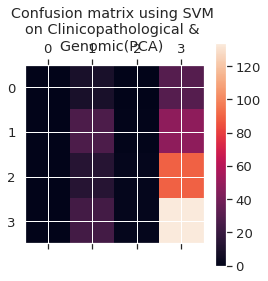

In [ ]:
# SVM Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "SVM \non Clinicopathological & \nGenomic(PCA) ")

SVM K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(classifier, X, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**SVM  K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))

accuracyresults.append(("**SVM  K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**SVM Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.46194226 0.49606299 0.46456693 0.46456693 0.47894737]
0.4732172952065203


In [ ]:
accuracyresults


[('**** ENSEMBLE ON CLINICOPATHOLOGICAL', '-', '-'),
 ('Accuracy Score', 'Score X_train', 'Score X_test'),
 ('**SVM', '-', '-'),
 ('49.370%', '55.556%', '49.370%'),
 ('**SVM  K-fold cross validation', '-', '-'),
 ('48.111%', '47.980%', '44.697%', '46.212%', '46.717%'),
 ('**SVM  K-fold Mean Accuracy of all 5 folds', '-', '-', '-', '-'),
 ('46.743%', '-', '-', '-', '-'),
 ('**SVM Confusion Matrix', '-', '-'),
 (array([[  0,   7,   2,  32],
         [  0,  37,   3,  50],
         [  0,  22,   0,  68],
         [  0,  16,   1, 159]]), '-', '-', '-', '-'),
 ('**Naive Bayes', '-', '-'),
 ('48.615%', '47.033%', '48.615%'),
 ('**Naive Bayes K-fold cross validation', '-', '-'),
 ('44.081%', '48.737%', '44.949%', '44.949%', '48.737%'),
 ('**Naive Bayes K-fold Mean Accuracy of all 5 folds', '-', '-'),
 ('46.291%', '-', '-', '-', '-'),
 ('**Naive Bayes Confusion Matrix', '-', '-'),
 (array([[  0,  12,   4,  25],
         [  0,  45,   9,  36],
         [  3,  20,   7,  60],
         [  0,  25,  10

Naive Bayes

In [ ]:
gnb = GaussianNB()
#Train the model using the training
gnb.fit(X_train, y_train)
# prediction on test set
Y_prediction = gnb.predict(X_test)
print("Naive Bayes Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on training set: \t {:.2f}'.format(gnb.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on test set:\t\t {:.2f}'.format(gnb.score(X_test, y_test) *100)+"%" )

# # NB on Clinic only
# Naive Bayes Test Accuracy:					                       48.61%
# Classifier Score of Naive Bayes classifier on training set:47.03%
# Classifier Score of Naive Bayes classifier on test set:		 48.61%

# Clinc, CNA & Express with no scaling (Test data)
# Naive Bayes Test Accuracy:					 33.33%
# Classifier Score of Naive Bayes classifier on training set: 	 100.00%
# Classifier Score of Naive Bayes classifier on test set:		 33.33%

# Clinc, CNA & Express with scaling(Test data)
# Naive Bayes Test Accuracy:					 33.33%
# Classifier Score of Naive Bayes classifier on training set: 	 100.00%
# Classifier Score of Naive Bayes classifier on test set:		 33.33%

#Write out results to list
accuracyresults.append(("**Naive Bayes", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_test, y_test) * 100) ))+"%") ))

Naive Bayes Test Accuracy:					 38.06%
Classifier Score of Naive Bayes classifier on training set: 	 49.84%
Classifier Score of Naive Bayes classifier on test set:		 38.06%


Naive Bayes Confusion Matrix

[[ 3 10  4 22]
 [ 7 38  7 24]
 [ 9 29 10 58]
 [12 46  8 94]]
              precision    recall  f1-score   support

           0       0.10      0.08      0.09        39
           1       0.31      0.50      0.38        76
           2       0.34      0.09      0.15       106
           3       0.47      0.59      0.53       160

    accuracy                           0.38       381
   macro avg       0.31      0.31      0.29       381
weighted avg       0.37      0.38      0.35       381



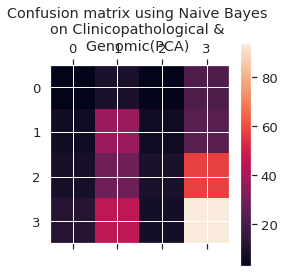

In [ ]:
# Naive Bayes Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Naive Bayes \non Clinicopathological & \nGenomic(PCA) ")

Naive Bayes Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gnb, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Naive Bayes K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Naive Bayes K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Naive Bayes Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.36220472 0.39370079 0.34645669 0.41207349 0.27894737]
0.35867661279182206


Random Forest

In [ ]:
#Create a Random Forest Classifier
randomFor=RandomForestClassifier(n_estimators=10)
# Train/Fit the model  
randomFor.fit(X_train,y_train)
# prediction on test set
Y_prediction=randomFor.predict(X_test)
print("Random Forest Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Random Forest classifier on training set: \t {:.2f}'.format(randomFor.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Random Forest classifier on test set:\t {:.2f}'.format(randomFor.score(X_test, y_test) *100)+"%" )

# # RF on Clinic only
# Random Forest Test Accuracy:					 41.31%
# Classifier Score of Random Forest classifier on training set: 	 98.61%
# Classifier Score of Random Forest classifier on test set:	 41.31%

# Clinc, CNA & Express with no scaling (Test data)
# Random Forest Test Accuracy:					 0.00%
# Classifier Score of Random Forest classifier on training set: 	 100.00%
# Classifier Score of Random Forest classifier on test set:	 0.00%

# Clinc, CNA & Express with scaling(Test data)
# Random Forest Test Accuracy:					 0.00%
# Classifier Score of Random Forest classifier on training set: 	 83.33%
# Classifier Score of Random Forest classifier on test set:	 0.00%

#Write out results to list
accuracyresults.append(("**Random Forest", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_test, y_test) * 100) ))+"%") ))

Random Forest Test Accuracy:					 42.52%
Classifier Score of Random Forest classifier on training set: 	 99.08%
Classifier Score of Random Forest classifier on test set:	 42.52%


Random Forest Confusion Matrix

[[  1  11   5  22]
 [  5  38   7  26]
 [  3  19  16  68]
 [  5  26  22 107]]
              precision    recall  f1-score   support

           0       0.07      0.03      0.04        39
           1       0.40      0.50      0.45        76
           2       0.32      0.15      0.21       106
           3       0.48      0.67      0.56       160

    accuracy                           0.43       381
   macro avg       0.32      0.34      0.31       381
weighted avg       0.38      0.43      0.38       381



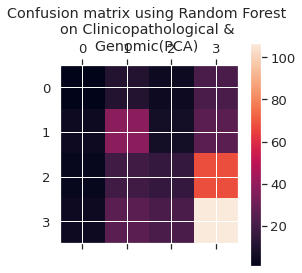

In [ ]:
# Random Forest Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Random Forest \non Clinicopathological & \nGenomic(PCA) ")

Random Forest K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(randomFor, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Random Forest K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Random Forest K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Random Forest Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.3648294  0.35170604 0.35695538 0.39107612 0.41315789]
0.3755449647741401


In [ ]:
accuracyresults

[('**** ENSEMBLE ON CLINICOPATHOLOGICAL', '-', '-'),
 ('Accuracy Score', 'Score X_train', 'Score X_test'),
 ('**SVM', '-', '-'),
 ('49.370%', '55.556%', '49.370%'),
 ('**SVM  K-fold cross validation', '-', '-'),
 ('48.111%', '47.980%', '44.697%', '46.212%', '46.717%'),
 ('**SVM  K-fold Mean Accuracy of all 5 folds', '-', '-', '-', '-'),
 ('46.743%', '-', '-', '-', '-'),
 ('**SVM Confusion Matrix', '-', '-'),
 (array([[  0,   7,   2,  32],
         [  0,  37,   3,  50],
         [  0,  22,   0,  68],
         [  0,  16,   1, 159]]), '-', '-', '-', '-'),
 ('**Naive Bayes', '-', '-'),
 ('48.615%', '47.033%', '48.615%'),
 ('**Naive Bayes K-fold cross validation', '-', '-'),
 ('44.081%', '48.737%', '44.949%', '44.949%', '48.737%'),
 ('**Naive Bayes K-fold Mean Accuracy of all 5 folds', '-', '-'),
 ('46.291%', '-', '-', '-', '-'),
 ('**Naive Bayes Confusion Matrix', '-', '-'),
 (array([[  0,  12,   4,  25],
         [  0,  45,   9,  36],
         [  3,  20,   7,  60],
         [  0,  25,  10

Gradient Boosting

In [ ]:
#Create a Gradient Boosting Classifier
gradBoosting=GradientBoostingClassifier(random_state=20)
# Train/Fit the model 
gradBoosting.fit(X_train,y_train)
# prediction on test set
Y_prediction=gradBoosting.predict(X_test)

print("Gradient Boosting Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on training set: \t {:.2f}'.format(gradBoosting.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on test set:\t\t {:.2f}'.format(gradBoosting.score(X_test, y_test) *100)+"%" )

# # Gradient Boosting on Clinic only
# Gradient Boosting Test Accuracy:					 49.37%
# Classifier Score of Gradient Boosting classifier on training set: 	 67.23%
# Classifier Score of Gradient Boosting classifier on test set:		 49.37%

# Clinc, CNA & Express with no scaling (Test data)
# Gradient Boosting Test Accuracy:					 66.67%
# Classifier Score of Gradient Boosting classifier on training set: 	 100.00%
# Classifier Score of Gradient Boosting classifier on test set:		 66.67%

# Clinc, CNA & Express with scaling(Test data)
# Gradient Boosting Test Accuracy:					 66.67%
# Classifier Score of Gradient Boosting classifier on training set: 	 100.00%
# Classifier Score of Gradient Boosting classifier on test set:		 66.67%

#Write out results to list
accuracyresults.append(("**Gradient Boosting", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_test, y_test) * 100) ))+"%") ))

Gradient Boosting Test Accuracy:					 45.93%
Classifier Score of Gradient Boosting classifier on training set: 	 96.52%
Classifier Score of Gradient Boosting classifier on test set:		 45.93%


Gradient Boosting Confusion Matrix

[[  0   9   4  26]
 [  4  32   6  34]
 [  2  16  15  73]
 [  5  18   9 128]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.43      0.42      0.42        76
           2       0.44      0.14      0.21       106
           3       0.49      0.80      0.61       160

    accuracy                           0.46       381
   macro avg       0.34      0.34      0.31       381
weighted avg       0.41      0.46      0.40       381



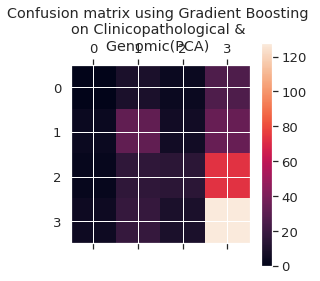

In [ ]:
# Gradient Boosting Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Gradient Boosting \non Clinicopathological & \nGenomic(PCA) ")

 Gradient Boosting K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gradBoosting, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Gradient Boosting K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Gradient Boosting K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Gradient Boosting Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.45669291 0.46456693 0.47506562 0.45144357 0.45789474]
0.46113275314269925


## Kernel PCA on CNA 

In [ ]:
print(cnaDataNewTransposed.shape)
cnaDataNewTransposed.head(5)

(2173, 22544)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22503,22504,22505,22506,22507,22508,22509,22510,22511,22512,22513,22514,22515,22516,22517,22518,22519,22520,22521,22522,22523,22524,22525,22526,22527,22528,22529,22530,22531,22532,22533,22534,22535,22536,22537,22538,22539,22540,22541,22542
MB-0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
MB-0045,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.0,2.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-2.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,0.0
MB-0046,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
## set the X variable 
X_CNA = cnaDataNewTransposed.iloc[:, :]  # array of values

In [ ]:
# Applying Kernel PCA model
transformer = KernelPCA(n_components=200, kernel='rbf')
# Fit the model and apply the dimensionality reduction on X_CNA
X_CNA_transformed = transformer.fit_transform(X_CNA)
X_CNA_transformed.shape

(2173, 200)

In [ ]:
# X_CNA_transformed
# patientIDs
# columnsCNA200
# columnsCNA10

In [ ]:
# Create a DF with the new array and column names
KPCA_cnaDF = pd.DataFrame(data = X_CNA_transformed, columns = columnsCNA200)

print(KPCA_cnaDF.shape)
print(KPCA_cnaDF.head(2))

# Insert the Patient ID as index to the new df
KPCA_cnaDF.insert(loc=0, column='Patient ID', value=patientIDs)
print(KPCA_cnaDF.head(2))

allUsedCols_reduced['Patient ID'].isin(KPCA_cnaDF['Patient ID']).value_counts()
# All 1981 values of Patient ID in the allUsedCols_reduced appear in KPCA_cnaDF
# True    1981

(2173, 200)
        pc1       pc2       pc3  ...     pc198     pc199     pc200
0 -0.330388 -0.139310 -0.061046  ... -0.003146  0.001730 -0.001612
1 -0.229757 -0.160406 -0.016445  ...  0.021662 -0.014022 -0.015824

[2 rows x 200 columns]
  Patient ID       pc1       pc2  ...     pc198     pc199     pc200
0    MB-0000 -0.330388 -0.139310  ... -0.003146  0.001730 -0.001612
1    MB-0039 -0.229757 -0.160406  ...  0.021662 -0.014022 -0.015824

[2 rows x 201 columns]


True    1981
Name: Patient ID, dtype: int64

In [ ]:
print(allUsedCols_reduced.shape)
print(KPCA_cnaDF.shape)

(1981, 22)
(2173, 201)


In [ ]:
# MErge the Clinic data and the CNA data using inner merge on the Pateint ID
# Inner Merge as we want only patients with both Clinic and CNA data
# KPCA_clinicCNAMerge = pd.merge(allUsedCols_reduced, 
#                           KPCA_cnaDF[['Patient ID', 'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10' ]],
#                           on='Patient ID') 

KPCA_clinicCNAMerge = pd.merge(allUsedCols_reduced, 
                          KPCA_cnaDF[['Patient ID', 
                                          'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100',
                'pc101','pc102', 'pc103', 'pc104', 'pc105', 'pc106', 'pc107', 'pc108', 'pc109', 'pc110',
                'pc111', 'pc112',  'pc113', 'pc114', 'pc115', 'pc116', 'pc117', 'pc18', 'pc19', 'pc20',
                'pc121', 'pc122',  'pc123', 'pc124', 'pc125', 'pc126', 'pc127', 'pc128', 'pc129', 'pc130',
                'pc131', 'pc132',  'pc133', 'pc134', 'pc135', 'pc136', 'pc137', 'pc138', 'pc139', 'pc140',
                'pc141', 'pc142',  'pc143', 'pc144', 'pc145', 'pc146', 'pc147', 'pc148', 'pc149', 'pc150',
                'pc151', 'pc152',  'pc153', 'pc154', 'pc155', 'pc156', 'pc157', 'pc158', 'pc159', 'pc160',
                'pc161', 'pc162',  'pc163', 'pc164', 'pc165', 'pc166', 'pc167', 'pc168', 'pc169', 'pc170',
                'pc171', 'pc172',  'pc173', 'pc174', 'pc175', 'pc176', 'pc177', 'pc178', 'pc179', 'pc180',
                'pc181', 'pc182',  'pc183', 'pc184', 'pc185', 'pc186', 'pc187', 'pc188', 'pc189', 'pc190',
                'pc191', 'pc192',  'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198', 'pc199', 'pc200'
                                          ]],
                          on='Patient ID') 

In [ ]:
print(KPCA_clinicCNAMerge.shape)
print(KPCA_clinicCNAMerge.head(5))

print(KPCA_clinicCNAMerge.columns)

# Move N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS to the start of the df
# then easier to do the choosing of features for train/test data split

# KPCA_clinicCNAMerge = KPCA_clinicCNAMerge[['Patient ID', 'N_OS_STATUS_MTHS',
#        'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
#        'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
#        'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
#        'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
#        'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5',
#        'pc6', 'pc7', 'pc8', 'pc9', 'pc10']]



KPCA_clinicCNAMerge = KPCA_clinicCNAMerge[['Patient ID', 'N_OS_STATUS_MTHS',
       'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
       'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
       'N_INTCLUST', 'N_LYMPH_POSITIVE', 'N_MUTATION_COUNT', 'N_NPI',
       'N_ONCOTREE_CODE', 'N_PR_STATUS', 'N_RADIO_THERAPY', 'N_THREEGENE',
       'N_TUMOUR_SIZE', 'N_TUMOUR_STAGE', 'N_MENOPAUSAL', 
        'pc1', 'pc2',  'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                'pc11', 'pc12',  'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
                'pc21', 'pc22',  'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30',
                'pc31', 'pc32',  'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
                'pc41', 'pc42',  'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50',
                'pc51', 'pc52',  'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60',
                'pc61', 'pc62',  'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70',
                'pc71', 'pc72',  'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79', 'pc80',
                'pc81', 'pc82',  'pc83', 'pc84', 'pc85', 'pc86', 'pc87', 'pc88', 'pc89', 'pc90',
                'pc91', 'pc92',  'pc93', 'pc94', 'pc95', 'pc96', 'pc97', 'pc98', 'pc99', 'pc100',
                'pc101','pc102', 'pc103', 'pc104', 'pc105', 'pc106', 'pc107', 'pc108', 'pc109', 'pc110',
                'pc111', 'pc112',  'pc113', 'pc114', 'pc115', 'pc116', 'pc117', 'pc18', 'pc19', 'pc20',
                'pc121', 'pc122',  'pc123', 'pc124', 'pc125', 'pc126', 'pc127', 'pc128', 'pc129', 'pc130',
                'pc131', 'pc132',  'pc133', 'pc134', 'pc135', 'pc136', 'pc137', 'pc138', 'pc139', 'pc140',
                'pc141', 'pc142',  'pc143', 'pc144', 'pc145', 'pc146', 'pc147', 'pc148', 'pc149', 'pc150',
                'pc151', 'pc152',  'pc153', 'pc154', 'pc155', 'pc156', 'pc157', 'pc158', 'pc159', 'pc160',
                'pc161', 'pc162',  'pc163', 'pc164', 'pc165', 'pc166', 'pc167', 'pc168', 'pc169', 'pc170',
                'pc171', 'pc172',  'pc173', 'pc174', 'pc175', 'pc176', 'pc177', 'pc178', 'pc179', 'pc180',
                'pc181', 'pc182',  'pc183', 'pc184', 'pc185', 'pc186', 'pc187', 'pc188', 'pc189', 'pc190',
                'pc191', 'pc192',  'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198', 'pc199', 'pc200'       
       ]]

print(KPCA_clinicCNAMerge.columns)

(1981, 228)
  Patient ID  N_AGE  N_CELLULARITY  ...     pc198     pc199     pc200
0    MB-0000     76              0  ... -0.003146  0.001730 -0.001612
1    MB-0002     43              0  ...  0.007971  0.003932  0.003388
2    MB-0005     49              0  ... -0.005420  0.006150  0.012180
3    MB-0006     48              2  ... -0.007250 -0.002277  0.001239
4    MB-0008     77              0  ...  0.000622  0.008101 -0.003918

[5 rows x 228 columns]
Index(['Patient ID', 'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY',
       'N_CLAUDIN_SUBTYPE', 'N_ER_STATUS', 'N_HISTO_GRADE', 'N_HER2_STATUS',
       'N_INTCLUST', 'N_LYMPH_POSITIVE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=228)
Index(['Patient ID', 'N_OS_STATUS_MTHS', 'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS',
       'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE',
       'N_ER_STATUS', 'N_HISTO_GRADE',
       ...
       'pc

In [ ]:
print(KPCA_clinicCNAMerge.columns)
print(KPCA_clinicCNAMerge.iloc[0:1, 1:4])

Index(['Patient ID', 'N_OS_STATUS_MTHS', 'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS',
       'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE',
       'N_ER_STATUS', 'N_HISTO_GRADE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=240)
   N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS
0               140               11                3


## Kernel PCA on Expresssion

In [ ]:
print(expressDataTransposed.head(3))
print(expresPatientIDs)

            19197     19415     7713   ...     13223     9298      11155
MB-0362  8.676978  6.075331  5.453928  ...  7.304643  5.251843  5.049591
MB-0346  9.653589  6.687887  5.454185  ...  7.933324  5.450611  5.316790
MB-0386  9.033589  5.910885  5.501577  ...  7.580336  5.235394  5.461617

[3 rows x 24368 columns]
Index(['MB-0362', 'MB-0346', 'MB-0386', 'MB-0574', 'MB-0503', 'MB-0641',
       'MB-0201', 'MB-0218', 'MB-0316', 'MB-0189',
       ...
       'MB-6122', 'MB-6192', 'MB-4820', 'MB-5527', 'MB-5167', 'MB-5465',
       'MB-5453', 'MB-5471', 'MB-5127', 'MB-4313'],
      dtype='object', length=1904)


In [ ]:
## set the X variable for KPCA
X_Express = expressDataTransposed.iloc[:, :]  # array of values
# Applying Kernel PCA model
KPCA = KernelPCA(n_components=200, kernel='rbf')
# Fit the model and apply the dimensionality reduction on X_Express
X_EXP_transformed = KPCA.fit_transform(X_Express)
X_EXP_transformed.shape


(1904, 200)

In [ ]:
# print(columnsExpress200)
print(columnsExpress10)

['pcExp1', 'pcExp2', 'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10']


In [ ]:
# Create df from principal components and column names
KPCA_ExpressDF = pd.DataFrame(data = X_EXP_transformed, columns = columnsExpress200)
print(KPCA_ExpressDF.shape)
print(KPCA_ExpressDF.head(2))

(1904, 200)
     pcExp1    pcExp2    pcExp3  ...  pcExp198  pcExp199  pcExp200
0 -0.131871 -0.088630 -0.018898  ...  0.003905  0.000095  0.006568
1  0.059856  0.171259  0.175039  ... -0.025072 -0.048984  0.030820

[2 rows x 200 columns]


In [ ]:
#Insert the patient names into the df with PCA applied
KPCA_ExpressDF.insert(loc=0, column='Patient ID', value=expresPatientIDs)
KPCA_ExpressDF.head(3)

,Patient ID,pcExp1,pcExp2,pcExp3,pcExp4,pcExp5,pcExp6,pcExp7,pcExp8,pcExp9,pcExp10,pcExp11,pcExp12,pcExp13,pcExp14,pcExp15,pcExp16,pcExp17,pcExp18,pcExp19,pcExp20,pcExp21,pcExp22,pcExp23,pcExp24,pcExp25,pcExp26,pcExp27,pcExp28,pcExp29,pcExp30,pcExp31,pcExp32,pcExp33,pcExp34,pcExp35,pcExp36,pcExp37,pcExp38,pcExp39,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,MB-0362,-0.131871,-0.088630,-0.018898,-0.038318,-0.189352,-0.099264,-0.008245,0.089009,-0.010116,0.114958,-0.034516,0.019274,-0.041390,0.020860,-0.023882,-0.033330,-0.001167,-0.028860,-0.038140,-0.006260,0.020245,-0.034031,0.069420,-0.007588,-0.067783,0.026666,-0.045438,0.052812,-0.019989,-0.044806,0.018851,0.009306,-0.011456,0.006401,0.027818,-0.005446,-0.029282,-0.001312,0.026089,...,-0.037854,-0.011447,-0.000485,-0.013422,0.008935,0.006539,-0.000405,0.006116,-0.019427,0.008307,-0.001138,-0.006302,0.014856,-0.024596,-0.011705,-0.012642,-0.005232,-0.011389,0.003296,0.007858,0.001277,-0.001153,0.009469,-0.015540,0.009402,0.000243,-0.010036,0.016554,0.026705,0.015940,-0.005124,-0.027220,0.007292,-0.007731,0.015787,0.013528,-0.004021,0.003905,0.000095,0.006568
1,MB-0346,0.059856,0.171259,0.175039,-0.067288,-0.173289,-0.024670,0.121818,0.050071,0.179132,0.034013,0.082183,0.038647,0.059102,0.022861,0.032375,-0.005489,-0.045662,-0.062883,-0.023197,0.005869,0.013459,-0.037434,0.058946,0.040511,0.008141,-0.000157,-0.015840,0.000867,0.023621,0.006706,-0.039418,0.006272,0.016561,-0.011012,0.013975,-0.002944,-0.034047,0.025869,-0.033674,...,0.009209,-0.018109,-0.036426,0.017424,-0.028346,-0.030785,-0.004976,-0.049413,0.006931,0.032690,-0.001166,-0.019442,-0.001058,0.014144,0.004749,0.000361,0.021328,0.053491,0.050622,0.022710,0.019009,-0.018014,0.014514,-0.039279,0.044221,-0.013800,-0.002893,-0.014023,0.028448,0.002396,-0.012476,-0.018375,-0.009580,0.027262,0.024590,0.005376,0.010203,-0.025072,-0.048984,0.030820
2,MB-0386,0.007341,-0.120002,-0.090531,-0.056638,-0.143730,-0.096810,-0.051714,0.021490,0.054059,0.089962,-0.009229,0.070731,-0.015445,0.059362,-0.084531,0.035867,-0.019076,-0.020627,0.041694,0.024854,0.017436,0.022198,-0.071910,-0.074988,0.005573,0.004224,-0.048483,-0.018543,0.010845,-0.008220,0.002061,-0.023258,0.019016,-0.021304,0.024023,-0.002346,0.043511,-0.013809,-0.030769,...,-0.007104,0.000888,-0.011686,0.003828,0.015219,0.023490,0.019605,-0.011995,-0.004792,-0.015496,-0.005503,0.002071,0.008614,-0.006098,-0.029980,-0.016794,0.001085,0.022801,-0.011974,-0.007537,-0.002936,-0.011858,0.002948,0.003265,0.006926,-0.003234,0.011876,0.017381,0.000959,0.006962,0.001093,0.003226,-0.003198,-0.003832,0.010072,-0.002777,-0.018853,0.025854,0.004966,0.004730


In [ ]:
# Check how many matching patients
KPCA_clinicCNAMerge['Patient ID'].isin(KPCA_ExpressDF['Patient ID']).value_counts()
# There are 1904 values of Patient ID in the clinicCNAMerge(1981) that appear in KPCA_ExpressDF(1904 rows)

print(KPCA_clinicCNAMerge.columns)
print(len(KPCA_clinicCNAMerge.columns))
print(KPCA_clinicCNAMerge.shape)
print(KPCA_ExpressDF.shape)

Index(['Patient ID', 'N_OS_STATUS_MTHS', 'N_SURVIVE_YEARS', 'N_SURVIVE_CLASS',
       'N_AGE', 'N_CELLULARITY', 'N_CHEMOTHERAPY', 'N_CLAUDIN_SUBTYPE',
       'N_ER_STATUS', 'N_HISTO_GRADE',
       ...
       'pc191', 'pc192', 'pc193', 'pc194', 'pc195', 'pc196', 'pc197', 'pc198',
       'pc199', 'pc200'],
      dtype='object', length=240)
240
(1981, 240)
(1904, 201)


In [ ]:
# MErge the Clinic/CNA data and the gene Expression data using inner merge on the Patient ID
# Inner Merge as we want only patients present in both dfs

# KPCA_clinicCNAExpressMerge = pd.merge(KPCA_clinicCNAMerge, 
#                           KPCA_ExpressDF[['Patient ID', 'pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10' ]],
#                           on='Patient ID') 

KPCA_clinicCNAExpressMerge = pd.merge(KPCA_clinicCNAMerge, 
                          KPCA_ExpressDF[['Patient ID', 
                                          'pcExp1', 'pcExp2',  'pcExp3', 'pcExp4', 'pcExp5', 'pcExp6', 'pcExp7', 'pcExp8', 'pcExp9', 'pcExp10',
                    'pcExp11', 'pcExp12',  'pcExp13', 'pcExp14', 'pcExp15', 'pcExp16', 'pcExp17', 'pcExp18', 'pcExp19', 'pcExp20',
                    'pcExp21', 'pcExp22',  'pcExp23', 'pcExp24', 'pcExp25', 'pcExp26', 'pcExp27', 'pcExp28', 'pcExp29', 'pcExp30',
                    'pcExp31', 'pcExp32',  'pcExp33', 'pcExp34', 'pcExp35', 'pcExp36', 'pcExp37', 'pcExp38', 'pcExp39', 'pcExp40',
                    'pcExp41', 'pcExp42',  'pcExp43', 'pcExp44', 'pcExp45', 'pcExp46', 'pcExp47', 'pcExp48', 'pcExp49', 'pcExp50',
                    'pcExp51', 'pcExp52',  'pcExp53', 'pcExp54', 'pcExp55', 'pcExp56', 'pcExp57', 'pcExp58', 'pcExp59', 'pcExp60',
                    'pcExp61', 'pcExp62',  'pcExp63', 'pcExp64', 'pcExp65', 'pcExp66', 'pcExp67', 'pcExp68', 'pcExp69', 'pcExp70',
                    'pcExp71', 'pcExp72',  'pcExp73', 'pcExp74', 'pcExp75', 'pcExp76', 'pcExp77', 'pcExp78', 'pcExp79', 'pcExp80',
                    'pcExp81', 'pcExp82',  'pcExp83', 'pcExp84', 'pcExp85', 'pcExp86', 'pcExp87', 'pcExp88', 'pcExp89', 'pcExp90',
                    'pcExp91', 'pcExp92',  'pcExp93', 'pcExp94', 'pcExp95', 'pcExp96', 'pcExp97', 'pcExp98', 'pcExp99', 'pcExp100',
                    'pcExp101', 'pcExp102', 'pcExp103', 'pcExp104', 'pcExp105', 'pcExp106', 'pcExp107', 'pcExp108', 'pcExp109', 'pcExp110',
                    'pcExp111', 'pcExp112',  'pcExp113', 'pcExp114', 'pcExp115', 'pcExp116', 'pcExp117', 'pcExp118', 'pcExp119', 'pcExp120',
                    'pcExp121', 'pcExp122',  'pcExp123', 'pcExp124', 'pcExp125', 'pcExp126', 'pcExp127', 'pcExp128', 'pcExp129', 'pcExp130',
                    'pcExp131', 'pcExp132',  'pcExp133', 'pcExp134', 'pcExp135', 'pcExp136', 'pcExp137', 'pcExp138', 'pcExp139', 'pcExp140',
                    'pcExp141', 'pcExp142',  'pcExp143', 'pcExp144', 'pcExp145', 'pcExp146', 'pcExp147', 'pcExp148', 'pcExp149', 'pcExp150',
                    'pcExp151', 'pcExp152',  'pcExp153', 'pcExp154', 'pcExp155', 'pcExp156', 'pcExp157', 'pcExp158', 'pcExp159', 'pcExp160',
                    'pcExp161', 'pcExp162',  'pcExp163', 'pcExp164', 'pcExp165', 'pcExp166', 'pcExp167', 'pcExp168', 'pcExp169', 'pcExp170',
                    'pcExp171', 'pcExp172',  'pcExp173', 'pcExp174', 'pcExp175', 'pcExp176', 'pcExp177', 'pcExp178', 'pcExp179', 'pcExp180',
                    'pcExp181', 'pcExp182',  'pcExp183', 'pcExp184', 'pcExp185', 'pcExp186', 'pcExp187', 'pcExp188', 'pcExp189', 'pcExp190',
                    'pcExp191', 'pcExp192',  'pcExp193', 'pcExp194', 'pcExp195', 'pcExp196', 'pcExp197', 'pcExp198', 'pcExp199', 'pcExp200']],
                          on='Patient ID') 

print(KPCA_clinicCNAExpressMerge.shape)
print(KPCA_clinicCNAExpressMerge.head(5))
print(KPCA_clinicCNAExpressMerge.iloc[0:1, 1:4])

(1904, 440)
  Patient ID  N_OS_STATUS_MTHS  N_SURVIVE_YEARS  ...  pcExp198  pcExp199  pcExp200
0    MB-0000               140               11  ...  0.004119  0.013565 -0.013276
1    MB-0002                85                7  ...  0.012753  0.000040  0.019978
2    MB-0005               164               13  ... -0.025067 -0.008430  0.001539
3    MB-0006               165               13  ... -0.009338  0.006401 -0.008169
4    MB-0008                41                3  ...  0.013691  0.024186 -0.002592

[5 rows x 440 columns]
   N_OS_STATUS_MTHS  N_SURVIVE_YEARS  N_SURVIVE_CLASS
0               140               11                3


## Kernel PCA & Ensemble

In [ ]:
accuracyresults.append(("**** KERNEL PCA ON GENOMIC & ENSEMBLE ON BOTH ", "-", "-"))

In [ ]:
X = KPCA_clinicCNAExpressMerge.iloc[:, 4:]
X

,N_AGE,N_CELLULARITY,N_CHEMOTHERAPY,N_CLAUDIN_SUBTYPE,N_ER_STATUS,N_HISTO_GRADE,N_HER2_STATUS,N_INTCLUST,N_LYMPH_POSITIVE,N_MUTATION_COUNT,N_NPI,N_ONCOTREE_CODE,N_PR_STATUS,N_RADIO_THERAPY,N_THREEGENE,N_TUMOUR_SIZE,N_TUMOUR_STAGE,N_MENOPAUSAL,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc18,pc18,pc18,pc19,...,pcExp161,pcExp162,pcExp163,pcExp164,pcExp165,pcExp166,pcExp167,pcExp168,pcExp169,pcExp170,pcExp171,pcExp172,pcExp173,pcExp174,pcExp175,pcExp176,pcExp177,pcExp178,pcExp179,pcExp180,pcExp181,pcExp182,pcExp183,pcExp184,pcExp185,pcExp186,pcExp187,pcExp188,pcExp189,pcExp190,pcExp191,pcExp192,pcExp193,pcExp194,pcExp195,pcExp196,pcExp197,pcExp198,pcExp199,pcExp200
0,76,0,0,6,1,3,0,4,10,2,6.044,2,0,1,2,22,2,0,-0.330388,-0.139310,-0.061046,0.040421,-0.018111,-0.013661,-0.000080,0.002999,-0.038701,0.032262,-0.012928,-0.005821,0.004542,0.001897,-0.018301,0.006842,-0.007435,0.017445,-0.001778,0.017445,-0.001778,0.008095,...,-0.021513,0.002550,0.003142,0.024543,-0.001423,0.011822,0.026825,0.018560,0.006991,0.022592,0.038203,-0.002316,0.004953,0.001435,0.002127,0.001405,0.005724,0.010805,-0.015644,0.009848,-0.011938,-0.002400,0.011289,0.039162,-0.018173,0.008169,0.006223,-0.038829,0.038846,0.017472,0.014325,-0.017528,0.017901,0.004472,0.008854,-0.010585,-0.014436,0.004119,0.013565,-0.013276
1,43,0,0,2,1,3,0,4,0,2,4.020,2,1,1,0,10,1,1,0.014872,-0.203741,-0.129154,-0.131032,0.148261,-0.015278,-0.071210,-0.110203,0.118878,-0.012381,0.014531,-0.036629,0.018667,0.209280,-0.031090,0.100598,0.076165,-0.049763,-0.042939,-0.049763,-0.042939,-0.092774,...,0.010316,0.017545,-0.022325,-0.020025,-0.023820,-0.016679,0.017602,0.029368,-0.003630,-0.000778,-0.007146,0.009041,0.008524,0.009006,0.008139,0.021381,-0.021396,-0.005677,-0.008416,0.000674,0.016842,0.016070,-0.009314,0.007422,-0.011707,-0.008008,0.016866,-0.014646,-0.003053,0.028243,0.003640,0.007703,-0.004580,-0.000191,-0.009660,-0.004602,0.007056,0.012753,0.000040,0.019978
2,49,0,1,3,1,2,0,3,1,2,4.030,2,1,0,4,15,2,1,-0.042558,0.128838,0.059820,0.347821,0.314547,-0.089288,-0.064471,-0.127807,0.155535,0.027811,-0.160450,-0.081170,-0.097593,-0.036958,0.025764,-0.007848,0.049721,-0.064306,-0.020164,-0.064306,-0.020164,-0.022454,...,0.000397,0.027933,-0.035777,0.037080,-0.018712,-0.015300,-0.000616,0.007975,-0.005093,0.000084,0.006336,0.015183,0.018591,-0.030454,-0.004297,-0.016897,0.016590,-0.001769,0.014260,-0.001458,-0.012693,-0.006523,-0.006894,0.012980,-0.013431,-0.008275,0.022011,-0.025066,0.003400,0.007586,0.004199,-0.011149,0.007463,-0.002879,0.008067,0.009044,-0.010074,-0.025067,-0.008430,0.001539
3,48,2,1,3,1,2,0,10,3,1,4.050,6,1,1,4,25,2,1,-0.069904,-0.135947,0.155782,0.197700,0.118771,-0.037904,-0.172566,-0.039416,0.121477,0.058296,-0.012006,0.039387,-0.044673,-0.024336,-0.012041,-0.000644,-0.131152,0.027428,-0.026750,0.027428,-0.026750,-0.095189,...,0.004368,-0.013146,-0.021309,0.031111,-0.004445,-0.004829,0.018564,-0.023167,0.002098,0.017982,-0.005117,0.002490,0.002185,-0.009853,-0.006587,-0.004891,-0.001142,-0.019010,0.015816,-0.011127,-0.026780,0.014623,0.015418,0.002335,-0.021172,-0.008409,-0.004056,-0.015485,-0.007122,-0.011517,-0.008201,-0.035809,-0.003791,0.008841,0.008218,-0.003895,-0.004749,-0.009338,0.006401,-0.008169
4,77,0,1,3,1,3,0,10,8,2,6.080,6,1,1,0,40,2,0,-0.028050,-0.200718,0.103541,0.007932,-0.112214,0.141477,-0.083429,-0.052899,0.002954,0.076670,-0.013692,0.042682,-0.011381,0.037059,-0.008817,0.020240,-0.034178,-0.023804,0.002884,-0.023804,0.002884,-0.008633,...,0.016537,0.002982,0.017573,0.005192,0.000831,0.008872,-0.008120,0.000847,-0.009257,-0.001633,-0.002389,-0.006182,-0.000204,-0.007699,0.004733,-0.027635,0.000295,-0.004648,-0.040003,-0.013981,-0.007305,0.014846,0.009978,0.016381,-0.018256,-0.004926,-0.004903,0.015179,-0.001051,-0.017524,0.003125,0.018283,-0.002809,-0.014968,-0.004393,-0.002234,-0.004225,0.013691,0.024186,-0.002592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
## set the X & y variables
X = KPCA_clinicCNAExpressMerge.iloc[:, 4:]  # array of values
y = KPCA_clinicCNAExpressMerge.iloc[:, 3]     # array of classified survival values

print ("X.shape = ", X.shape)
print ("Y.shape = ", y.shape)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

print ("X_train.shape = ", X_train.shape)
print ("y_train.shape = ", y_train.shape)
print ("X_test.shape  = ", X_test.shape)
print ("y_test.shape  = ", y_test.shape)

# StandardScaler performs the task of Standardization on the feature set of variables 
# they need to be standardised to have a common scale to build a ML model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X.shape =  (1904, 436)
Y.shape =  (1904,)
X_train.shape =  (1523, 436)
y_train.shape =  (1523,)
X_test.shape  =  (381, 436)
y_test.shape  =  (381,)


SVM

In [ ]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
# Make the predictions using the test data to predict test data results
Y_prediction = classifier.predict(X_test)
print("Support Vector Machines Test Accuracy:\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of SVM classifier on training set: \t {:.2f}'.format(classifier.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of SVM classifier on test set:\t\t {:.2f}'.format(classifier.score(X_test, y_test) *100)+"%" )
# SVM on Clinic only
# Support Vector Machines Test Accuracy:			 49.37%
# Classifier Score of SVM classifier on training set: 	 55.56%
# Classifier Score of SVM classifier on test set:		 49.37%

# Clinc, CNA & Express with no scaling(Test data)
# Support Vector Machines Test Accuracy:			 33.33%
# Classifier Score of SVM classifier on training set: 	 41.67%
# Classifier Score of SVM classifier on test set:		 33.33%

# Clinc, CNA & Express with scaling(Test data)
# Support Vector Machines Test Accuracy:			 33.33%
# Classifier Score of SVM classifier on training set: 	 91.67%
# Classifier Score of SVM classifier on test set:		 33.33%

# Clinc, CNA & Express with no scaling(FULL data)
# Support Vector Machines Test Accuracy:			 45.14%
# Classifier Score of SVM classifier on training set: 	 67.76%
# Classifier Score of SVM classifier on test set:		 45.14%

# Clinc, CNA & Express with scaling(FULL data)
# Support Vector Machines Test Accuracy:			 42.78%
# Classifier Score of SVM classifier on training set: 	 81.42%
# Classifier Score of SVM classifier on test set:		 42.78%

#Write out results to list
accuracyresults.append(("**SVM", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((classifier.score(X_test, y_test) * 100) ))+"%") ))

Support Vector Machines Test Accuracy:			 43.57%
Classifier Score of SVM classifier on training set: 	 81.02%
Classifier Score of SVM classifier on test set:		 43.57%


SVM Cofusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   5   1  33]
 [  0  25   0  51]
 [  0  15   2  89]
 [  0  18   3 139]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.40      0.33      0.36        76
           2       0.33      0.02      0.04       106
           3       0.45      0.87      0.59       160

    accuracy                           0.44       381
   macro avg       0.29      0.30      0.25       381
weighted avg       0.36      0.44      0.33       381



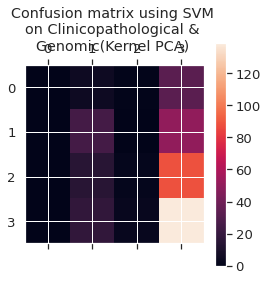

In [ ]:
# SVM Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "SVM \non Clinicopathological & \nGenomic(Kernel PCA) ")

SVM K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(classifier, X, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**SVM  K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))

accuracyresults.append(("**SVM  K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**SVM Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.47244094 0.47244094 0.44094488 0.46456693 0.46052632]
0.46218400331537507


Naive Bayes

In [ ]:
gnb = GaussianNB()
#Train the model using the training
gnb.fit(X_train, y_train)
# prediction on test set
Y_prediction = gnb.predict(X_test)
print("Naive Bayes Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on training set: \t {:.2f}'.format(gnb.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Naive Bayes classifier on test set:\t\t {:.2f}'.format(gnb.score(X_test, y_test) *100)+"%" )

# # NB on Clinic only
# Naive Bayes Test Accuracy:					                       48.61%
# Classifier Score of Naive Bayes classifier on training set:47.03%
# Classifier Score of Naive Bayes classifier on test set:		 48.61%

# Clinc, CNA & Express with no scaling (Test data)
# Naive Bayes Test Accuracy:					 33.33%
# Classifier Score of Naive Bayes classifier on training set: 	 100.00%
# Classifier Score of Naive Bayes classifier on test set:		 33.33%

# Clinc, CNA & Express with scaling(Test data)
# Naive Bayes Test Accuracy:					 33.33%
# Classifier Score of Naive Bayes classifier on training set: 	 100.00%
# Classifier Score of Naive Bayes classifier on test set:		 33.33%

# Clinc, CNA & Express with no scaling(FULL data)
# Naive Bayes Test Accuracy:					 37.27%
# Classifier Score of Naive Bayes classifier on training set: 	 49.44%
# Classifier Score of Naive Bayes classifier on test set:		 37.27%

# Clinc, CNA & Express with scaling(FULL data)
# Naive Bayes Test Accuracy:					 37.27%
# Classifier Score of Naive Bayes classifier on training set: 	 49.44%
# Classifier Score of Naive Bayes classifier on test set:		 37.27%

#Write out results to list
accuracyresults.append(("**Naive Bayes", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gnb.score(X_test, y_test) * 100) ))+"%") ))

Naive Bayes Test Accuracy:					 31.23%
Classifier Score of Naive Bayes classifier on training set: 	 43.40%
Classifier Score of Naive Bayes classifier on test set:		 31.23%


Naive Bayes Confusion Matrix

[[19 10  2  8]
 [17 39  3 17]
 [39 30  8 29]
 [52 47  8 53]]
              precision    recall  f1-score   support

           0       0.15      0.49      0.23        39
           1       0.31      0.51      0.39        76
           2       0.38      0.08      0.13       106
           3       0.50      0.33      0.40       160

    accuracy                           0.31       381
   macro avg       0.33      0.35      0.28       381
weighted avg       0.39      0.31      0.30       381



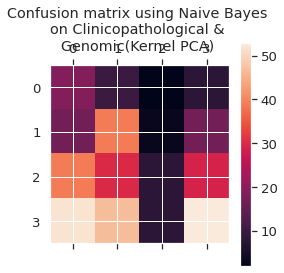

In [ ]:
# Naive Bayes Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Naive Bayes \non Clinicopathological & \nGenomic(Kernel PCA) ")

Naive Bayes K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gnb, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Naive Bayes K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Naive Bayes K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Naive Bayes Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.30183727 0.38582677 0.27296588 0.39895013 0.26578947]
0.32507390523552976


Random Forest

In [ ]:
#Create a Random Forest Classifier
randomFor=RandomForestClassifier(n_estimators=10)
# Train/Fit the model  
randomFor.fit(X_train,y_train)
# prediction on test set
Y_prediction=randomFor.predict(X_test)
print("Random Forest Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Random Forest classifier on training set: \t {:.2f}'.format(randomFor.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Random Forest classifier on test set:\t {:.2f}'.format(randomFor.score(X_test, y_test) *100)+"%" )

# # RF on Clinic only
# Random Forest Test Accuracy:					 41.31%
# Classifier Score of Random Forest classifier on training set: 	 98.61%
# Classifier Score of Random Forest classifier on test set:	 41.31%

# Clinc, CNA & Express with no scaling (Test data)
# Random Forest Test Accuracy:					 0.00%
# Classifier Score of Random Forest classifier on training set: 	 100.00%
# Classifier Score of Random Forest classifier on test set:	 0.00%

# Clinc, CNA & Express with scaling(Test data)
# Random Forest Test Accuracy:					 0.00%
# Classifier Score of Random Forest classifier on training set: 	 83.33%
# Classifier Score of Random Forest classifier on test set:	 0.00%

# Clinc, CNA & Express with no scaling(FULL data)
# Random Forest Test Accuracy:					 36.22%
# Classifier Score of Random Forest classifier on training set: 	 99.08%
# Classifier Score of Random Forest classifier on test set:	 36.22%

# Clinc, CNA & Express with scaling(FULL data)
# Random Forest Test Accuracy:					 41.99%
# Classifier Score of Random Forest classifier on training set: 	 99.47%
# Classifier Score of Random Forest classifier on test set:	 41.99%

#Write out results to list
accuracyresults.append(("**Random Forest", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((randomFor.score(X_test, y_test) * 100) ))+"%") ))

Random Forest Test Accuracy:					 37.01%
Classifier Score of Random Forest classifier on training set: 	 99.21%
Classifier Score of Random Forest classifier on test set:	 37.01%


Random Forest COnfusion Matrix

[[  4   9   2  24]
 [  1  27  17  31]
 [  7  25  10  64]
 [  7  38  15 100]]
              precision    recall  f1-score   support

           0       0.21      0.10      0.14        39
           1       0.27      0.36      0.31        76
           2       0.23      0.09      0.13       106
           3       0.46      0.62      0.53       160

    accuracy                           0.37       381
   macro avg       0.29      0.29      0.28       381
weighted avg       0.33      0.37      0.33       381



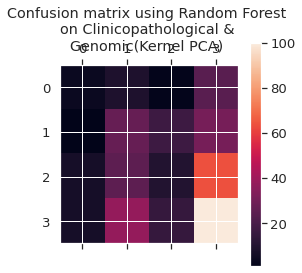

In [ ]:
# Random Forest Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Random Forest \non Clinicopathological & \nGenomic(Kernel PCA) ")

Random Forest K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(randomFor, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Random Forest K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Random Forest K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Random Forest Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.37795276 0.37007874 0.38582677 0.36745407 0.39736842]
0.37973615140212735


Gradient Boosting

In [ ]:
#Create a Gradient Boosting Classifier
gradBoosting=GradientBoostingClassifier(random_state=20)
# Train/Fit the model 
gradBoosting.fit(X_train,y_train)
# prediction on test set
Y_prediction=gradBoosting.predict(X_test)

print("Gradient Boosting Test Accuracy:\t\t\t\t\t %.2f" % (accuracy_score(y_test, Y_prediction) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on training set: \t {:.2f}'.format(gradBoosting.score(X_train, y_train) * 100)+"%" )
print('Classifier Score of Gradient Boosting classifier on test set:\t\t {:.2f}'.format(gradBoosting.score(X_test, y_test) *100)+"%" )

# # Gradient Boosting on Clinic only
# Gradient Boosting Test Accuracy:					 49.37%
# Classifier Score of Gradient Boosting classifier on training set: 	 67.23%
# Classifier Score of Gradient Boosting classifier on test set:		 49.37%

# Clinc, CNA & Express with no scaling (Test data)
# Gradient Boosting Test Accuracy:					 66.67%
# Classifier Score of Gradient Boosting classifier on training set: 	 100.00%
# Classifier Score of Gradient Boosting classifier on test set:		 66.67%

# Clinc, CNA & Express with scaling(Test data)
# Gradient Boosting Test Accuracy:					 66.67%
# Classifier Score of Gradient Boosting classifier on training set: 	 100.00%
# Classifier Score of Gradient Boosting classifier on test set:		 66.67%

# Clinc, CNA & Express with scaling(FULL data)
# Gradient Boosting Test Accuracy:					 44.88%
# Classifier Score of Gradient Boosting classifier on training set: 	 97.11%
# Classifier Score of Gradient Boosting classifier on test set:		 44.88%

# Clinc, CNA & Express with scaling(FULL data)
# Gradient Boosting Test Accuracy:					 44.88%
# Classifier Score of Gradient Boosting classifier on training set: 	 97.11%
# Classifier Score of Gradient Boosting classifier on test set:		 44.88%

#Write out results to list
accuracyresults.append(("**Gradient Boosting", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((accuracy_score(y_test, Y_prediction) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_train, y_train) * 100) ))+"%"), \
                        (str("{:.3f}".format((gradBoosting.score(X_test, y_test) * 100) ))+"%") ))

Gradient Boosting Test Accuracy:					 43.83%
Classifier Score of Gradient Boosting classifier on training set: 	 96.06%
Classifier Score of Gradient Boosting classifier on test set:		 43.83%


Gradient Boosting Confusion Matrix

[[  0  12   1  26]
 [  2  34  10  30]
 [  2  21   9  74]
 [  2  25   9 124]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.37      0.45      0.40        76
           2       0.31      0.08      0.13       106
           3       0.49      0.78      0.60       160

    accuracy                           0.44       381
   macro avg       0.29      0.33      0.28       381
weighted avg       0.37      0.44      0.37       381



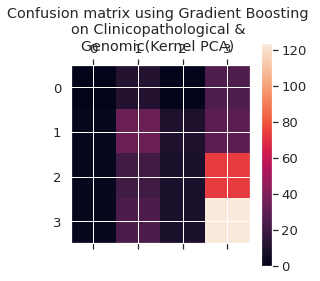

In [ ]:
# Gradient Boosting Confusion Matrix
confusionMatrix = (confusion_matrix(y_test, Y_prediction))
classificationReport = classification_report(y_test, Y_prediction)
print(confusionMatrix)
print(classificationReport)
showCofusionMatrix(confusionMatrix, "Gradient Boosting \non Clinicopathological & \nGenomic(Kernel PCA) ")

Gradient Boosting K Fold Cross Validation

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(gradBoosting, X, y, cv=5)
# Print the accuracy for each fold:
print(scores)
# And the mean accuracy of all 5 folds:
print(scores.mean())
accuracyresults.append(("**Gradient Boosting K-fold cross validation", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores[0] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[1] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[2] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[3] * 100) ))+"%"), \
                        (str("{:.3f}".format((scores[4] * 100) ))+"%") ))
accuracyresults.append(("**Gradient Boosting K-fold Mean Accuracy of all 5 folds", "-", "-"))
accuracyresults.append(( (str("{:.3f}".format((scores.mean()) * 100) ))+"%", "-", "-", "-", "-" ) )

accuracyresults.append(("**Gradient Boosting Confusion Matrix", "-", "-"))
# confusionMatrix
accuracyresults.append(( confusionMatrix, "-", "-", "-", "-" ) )
# accuracyresults.append(( confusionMatrix[0], confusionMatrix[1], confusionMatrix[2], confusionMatrix[3], "-" ) )

[0.44094488 0.48818898 0.4488189  0.44619423 0.45263158]
0.45535571211493303


In [ ]:
accuracyresults

[('**** ENSEMBLE ON CLINICOPATHOLOGICAL', '-', '-'),
 ('Accuracy Score', 'Score X_train', 'Score X_test'),
 ('**SVM', '-', '-'),
 ('49.370%', '55.556%', '49.370%'),
 ('**SVM  K-fold cross validation', '-', '-'),
 ('48.111%', '47.980%', '44.697%', '46.212%', '46.717%'),
 ('**SVM  K-fold Mean Accuracy of all 5 folds', '-', '-', '-', '-'),
 ('46.743%', '-', '-', '-', '-'),
 ('**SVM Confusion Matrix', '-', '-'),
 (array([[  0,   7,   2,  32],
         [  0,  37,   3,  50],
         [  0,  22,   0,  68],
         [  0,  16,   1, 159]]), '-', '-', '-', '-'),
 ('**Naive Bayes', '-', '-'),
 ('48.615%', '47.033%', '48.615%'),
 ('**Naive Bayes K-fold cross validation', '-', '-'),
 ('44.081%', '48.737%', '44.949%', '44.949%', '48.737%'),
 ('**Naive Bayes K-fold Mean Accuracy of all 5 folds', '-', '-'),
 ('46.291%', '-', '-', '-', '-'),
 ('**Naive Bayes Confusion Matrix', '-', '-'),
 (array([[  0,  12,   4,  25],
         [  0,  45,   9,  36],
         [  3,  20,   7,  60],
         [  0,  25,  10

In [ ]:
# Send all the accuracy results to a csv file
with open('/content/gdrive/My Drive/a_Dissertation/metabric/dissertation_accuracy_results_Large.csv', "w+") as csvFile:
  csvWriter = csv.writer(csvFile, delimiter=',')  
  csvWriter.writerows(accuracyresults)